## Load dataset

In [ ]:
# Import Libraries
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

# Import Scripts
sys.path.append(os.path.join(os.getcwd(), '..', 'scripts'))
from eda_pipeline import EDA_Pipeline
from data_loader import load_data, get_dataset_info
from utils import cast_data_types

In [2]:
pwd = os.getcwd()

In [3]:
# Set data path
data_path = os.path.join(pwd, '..', 'data', 'raw')

In [4]:
# Load data
data = load_data(data_path, verbose=True)

[ 11.1%] Loaded customers (1/9) - 99,441 rows
[ 22.2%] Loaded geolocation (2/9) - 1,000,163 rows
[ 33.3%] Loaded order_items (3/9) - 112,650 rows
[ 44.4%] Loaded orders (4/9) - 99,441 rows
[ 55.6%] Loaded order_payments (5/9) - 103,886 rows
[ 66.7%] Loaded order_reviews (6/9) - 99,224 rows
[ 77.8%] Loaded products (7/9) - 32,951 rows
[ 88.9%] Loaded sellers (8/9) - 3,095 rows
[100.0%] Loaded product_category_name_translation (9/9) - 71 rows

Loading complete: 9/9 datasets loaded successfully


In [5]:
# Get dataset information
get_dataset_info(data)


Dataset Information:
Dataset                                          Rows    Columns          Memory
--------------------------------------------------------------------------------
customers                                      99,441          5        29.62 MB
geolocation                                 1,000,163          5       145.20 MB
order_items                                   112,650          7        39.43 MB
orders                                         99,441          8        58.97 MB
order_payments                                103,886          5        17.81 MB
order_reviews                                  99,224          7        42.75 MB
products                                       32,951          9         6.79 MB
sellers                                         3,095          4         0.66 MB
product_category_name_translation                  71          2         0.01 MB
--------------------------------------------------------------------------------
TOTAL 

## EDA
#### At this stage, Exploratory Data Analysis (EDA) is performed to understand the initial characteristics of the dataset before cleaning and further analysis. The main objective of this stage is to identify the condition of the raw data, including data structure, data quality, and potential issues that may affect the analysis results.

#### No changes are made to the data at this stage, so all observations represent the raw data as it is. The results of this EDA are used as the basis for decision-making in the subsequent data cleaning and preparation stages.

## Customers

In [6]:
# Customer Table Overview
data['customers'].head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [7]:
# Check data types
data['customers'].dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [8]:
# Change Data Types to Appropriate Types

## Define type mappings for customers table
customers_type_mapping = {
    'customer_id': 'string',
    'customer_unique_id': 'string',
    'customer_city': 'string',
    'customer_state': 'category'
}

## Apply type mappings
cast_data_types(data['customers'], customers_type_mapping)

Data Types Before:
customer_id: object
customer_unique_id: object
customer_zip_code_prefix: int64
customer_city: object
customer_state: object

Data Types After:
customer_id: string
customer_unique_id: string
customer_zip_code_prefix: int64
customer_city: string
customer_state: category


⚠️  'customer_id' is high cardinality (unique values: 99441) - will show top 5 only
⚠️  'customer_unique_id' is high cardinality (unique values: 96096) - will show top 5 only
⚠️  'customer_city' is high cardinality (unique values: 4119) - will show top 5 only
✓ 'customer_state' added to categorical (unique values: 27)

✓ Detected 1 numerical columns
✓ Detected 1 categorical columns (≤100 unique)
✓ Detected 0 datetime columns
✓ Detected 3 high-cardinality columns (>100 unique)

--- Column Type Breakdown ---
Categorical: ['customer_state']
Numerical: ['customer_zip_code_prefix']
High Cardinality: ['customer_id', 'customer_unique_id', 'customer_city']

     AUTOMATED EDA REPORT

DATA OVERVIEW

Dataset Shape: 99,441 rows × 5 columns
Memory Usage: 24.12 MB

--- Data Types ---
string[python]    3
int64             1
category          1
Name: count, dtype: int64

--- Missing Values ---
No missing values found!

--- Duplicates ---
Total duplicates: 0 (0.00%)

UNIVARIATE ANALYSIS - NUMERICAL FE

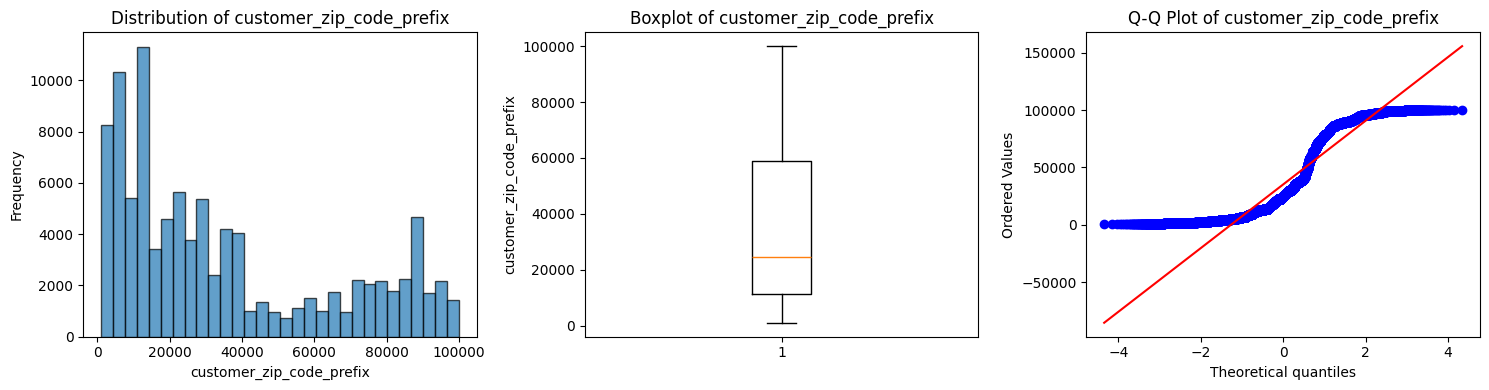


UNIVARIATE ANALYSIS - CATEGORICAL FEATURES (LOW CARDINALITY)

--- CUSTOMER_STATE ---
Data type: category
Unique values: 27

Value counts (all 27 categories):
customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: count, dtype: int64

Percentage distribution:
customer_state
SP    41.98
RJ    12.92
MG    11.70
RS     5.50
PR     5.07
SC     3.66
BA     3.40
DF     2.15
ES     2.04
GO     2.03
PE     1.66
CE     1.34
PA     0.98
MT     0.91
MA     0.75
MS     0.72
PB     0.54
PI     0.50
RN     0.49
AL     0.42
SE     0.35
TO     0.28
RO     0.25
AM     0.15
AC     0.08
AP     0.07
RR     0.05
Name: count, dtype: float64


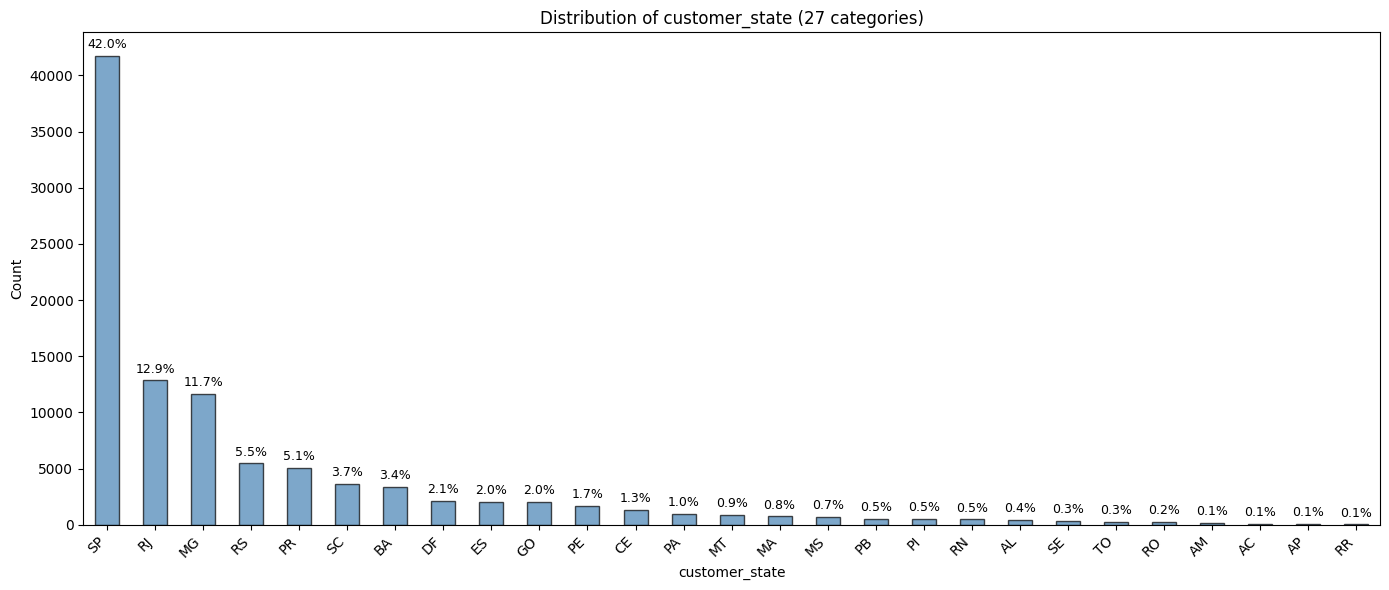


UNIVARIATE ANALYSIS - HIGH CARDINALITY COLUMNS (TOP 5 ONLY)

--- CUSTOMER_ID ---
Data type: string
Unique values: 99,441
Total records: 99,441
Cardinality ratio: 100.00%

📊 Top 5 most frequent values:
  1. 06b8999e2fba1a1fbc88172c00ba8bc7: 1 (0.00%)
  2. c023f30c1147aeb0358474f3b1dbc707: 1 (0.00%)
  3. b5cbf43f42281920a175fc99650c91d6: 1 (0.00%)
  4. 19f4e983f8f05b7de16670f8a0cf0ac7: 1 (0.00%)
  5. 229ac14c6ee6d6a606264ebcc861beb7: 1 (0.00%)


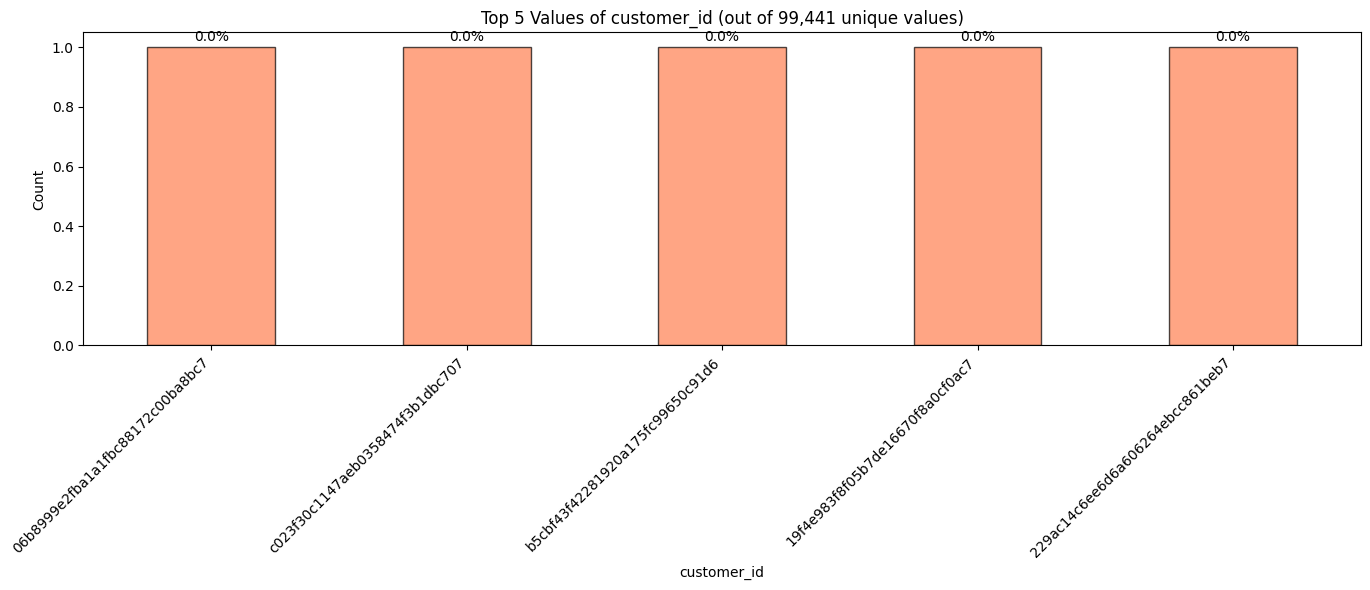


--- CUSTOMER_UNIQUE_ID ---
Data type: string
Unique values: 96,096
Total records: 99,441
Cardinality ratio: 96.64%

📊 Top 5 most frequent values:
  1. 8d50f5eadf50201ccdcedfb9e2ac8455: 17 (0.02%)
  2. 3e43e6105506432c953e165fb2acf44c: 9 (0.01%)
  3. 1b6c7548a2a1f9037c1fd3ddfed95f33: 7 (0.01%)
  4. ca77025e7201e3b30c44b472ff346268: 7 (0.01%)
  5. 6469f99c1f9dfae7733b25662e7f1782: 7 (0.01%)


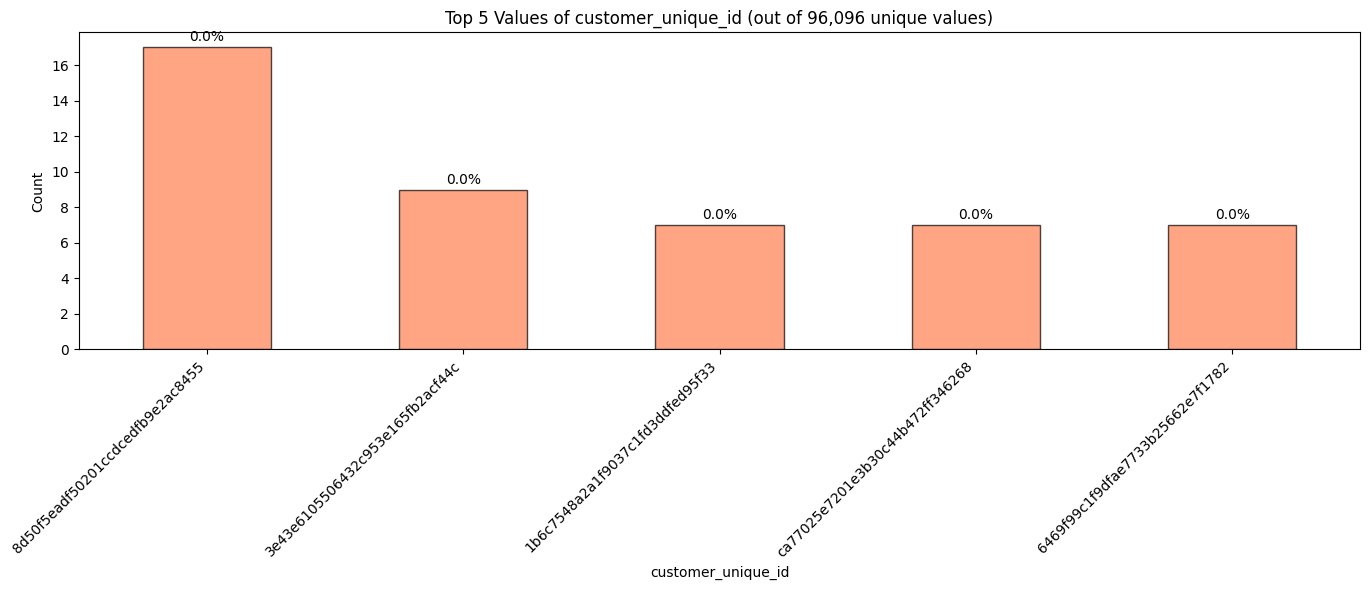


--- CUSTOMER_CITY ---
Data type: string
Unique values: 4,119
Total records: 99,441
Cardinality ratio: 4.14%

📊 Top 5 most frequent values:
  1. sao paulo: 15,540 (15.63%)
  2. rio de janeiro: 6,882 (6.92%)
  3. belo horizonte: 2,773 (2.79%)
  4. brasilia: 2,131 (2.14%)
  5. curitiba: 1,521 (1.53%)


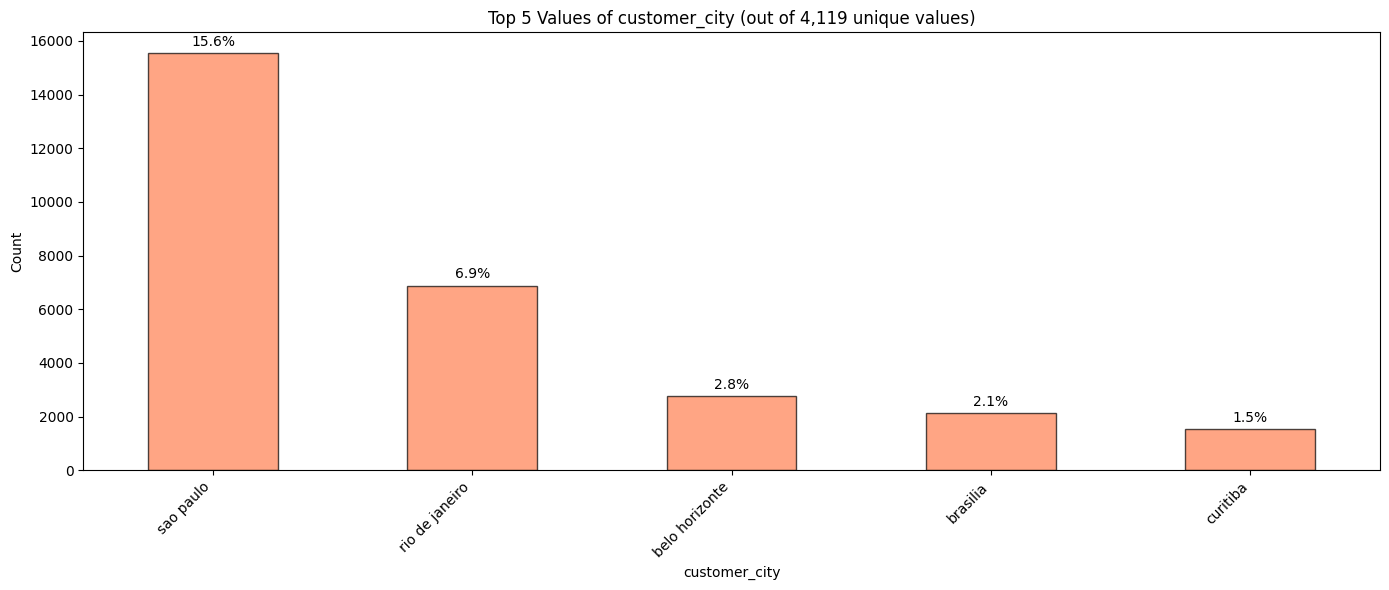


⚠ Not enough numerical columns for correlation matrix

✓ EDA REPORT COMPLETED


In [10]:
# Run EDA Pipeline on Customers Table
customers_eda = EDA_Pipeline(data['customers'])
customers_eda.generate_report()

## Customers Table Summary

### Data Types Need to be Casted
| Column | Cast to Type |
|------|----------|
| customer_id | string |
| customer_unique_id | string |
| customer_city | string |
| customer_state | categorical |


### Key Insights

1. The customer base is highly concentrated in the state of São Paulo (SP), 41.98% of the records.
2. São Paulo city is the most frequent customer city, representing 15.64% of all customers.
3. The dataset provides unique customer IDs and unique customer locations.

## Geolocation

In [14]:
# Geolocation Table Overview
data['geolocation'].head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

In [15]:
# Change Data Types to Appropriate Types

## Define type mappings for geolocation table
geolocation_type_mapping = {
    'geolocation_city': 'string',
    'geolocation_state': 'category'
}

## Apply type mappings
cast_data_types(data['geolocation'], geolocation_type_mapping)

Data Types Before:
geolocation_zip_code_prefix: int64
geolocation_lat: float64
geolocation_lng: float64
geolocation_city: object
geolocation_state: object

Data Types After:
geolocation_zip_code_prefix: int64
geolocation_lat: float64
geolocation_lng: float64
geolocation_city: string
geolocation_state: category


⚠️  'geolocation_city' is high cardinality (unique values: 8011) - will show top 5 only
✓ 'geolocation_state' added to categorical (unique values: 27)

✓ Detected 3 numerical columns
✓ Detected 1 categorical columns (≤100 unique)
✓ Detected 0 datetime columns
✓ Detected 1 high-cardinality columns (>100 unique)

--- Column Type Breakdown ---
Categorical: ['geolocation_state']
Numerical: ['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']
High Cardinality: ['geolocation_city']

     AUTOMATED EDA REPORT

DATA OVERVIEW

Dataset Shape: 1,000,163 rows × 5 columns
Memory Usage: 90.77 MB

--- Data Types ---
float64           2
int64             1
string[python]    1
category          1
Name: count, dtype: int64

--- Missing Values ---
No missing values found!

--- Duplicates ---
Total duplicates: 261831 (26.18%)

UNIVARIATE ANALYSIS - NUMERICAL FEATURES

--- GEOLOCATION_ZIP_CODE_PREFIX ---
count    1.000163e+06
mean     3.657417e+04
std      3.054934e+04
min      1.001000e+0

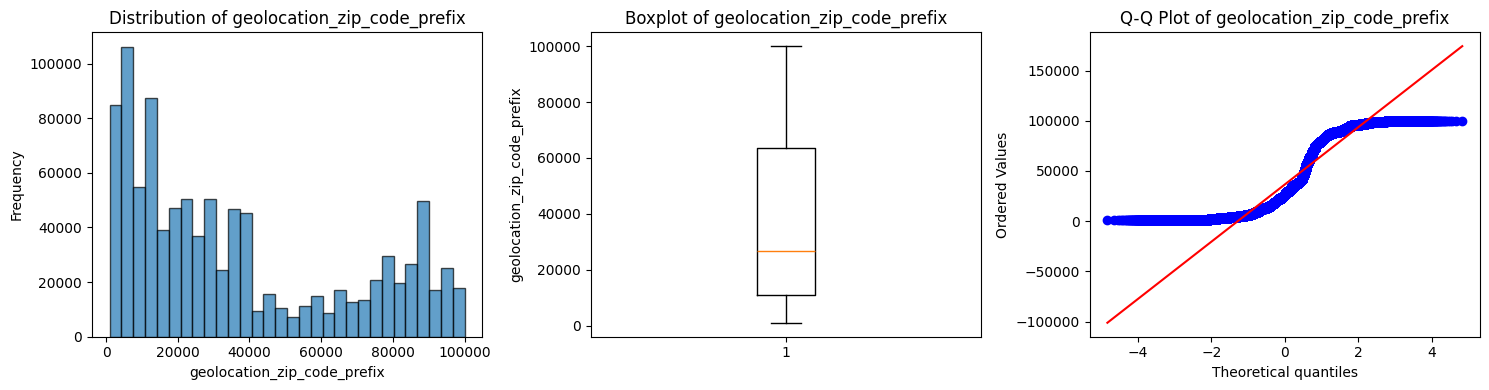


--- GEOLOCATION_LAT ---
count    1.000163e+06
mean    -2.117615e+01
std      5.715866e+00
min     -3.660537e+01
25%     -2.360355e+01
50%     -2.291938e+01
75%     -1.997962e+01
max      4.506593e+01
Name: geolocation_lat, dtype: float64
Skewness: 1.565
Kurtosis: 2.850
Outliers: 168240 (16.82%)


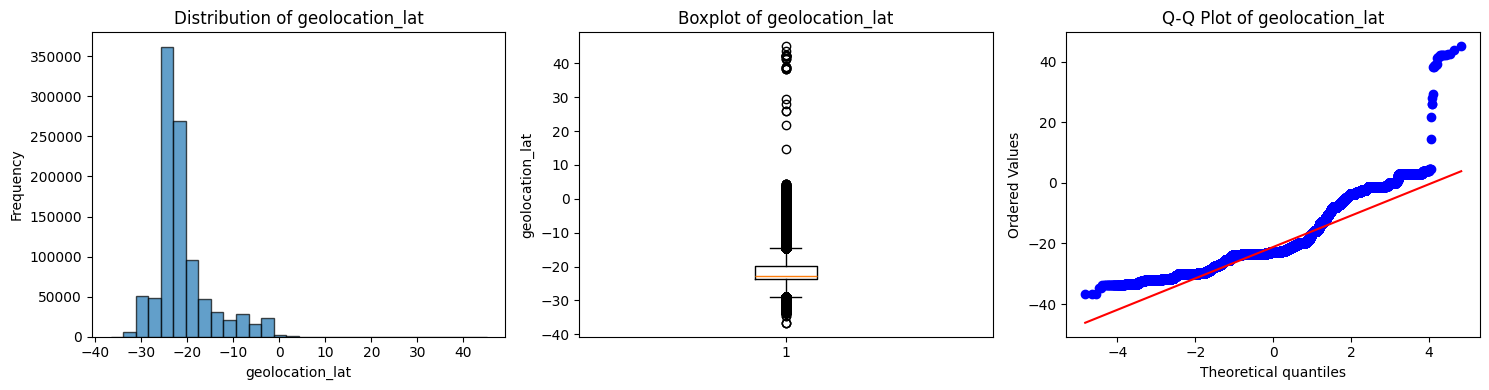


--- GEOLOCATION_LNG ---
count    1.000163e+06
mean    -4.639054e+01
std      4.269748e+00
min     -1.014668e+02
25%     -4.857317e+01
50%     -4.663788e+01
75%     -4.376771e+01
max      1.211054e+02
Name: geolocation_lng, dtype: float64
Skewness: -0.102
Kurtosis: 4.727
Outliers: 42348 (4.23%)


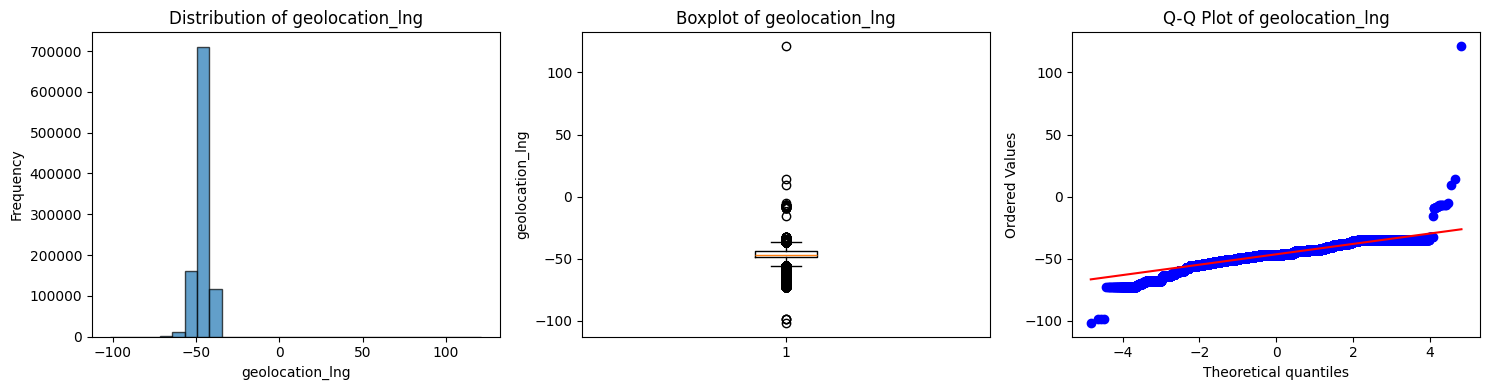


UNIVARIATE ANALYSIS - CATEGORICAL FEATURES (LOW CARDINALITY)

--- GEOLOCATION_STATE ---
Data type: category
Unique values: 27

Value counts (all 27 categories):
geolocation_state
SP    404268
MG    126336
RJ    121169
RS     61851
PR     57859
SC     38328
BA     36045
GO     20139
ES     16748
PE     16432
DF     12986
MT     12031
CE     11674
PA     10853
MS     10431
MA      7853
PB      5538
RN      5041
PI      4549
AL      4183
TO      3576
SE      3563
RO      3478
AM      2432
AC      1301
AP       853
RR       646
Name: count, dtype: int64

Percentage distribution:
geolocation_state
SP    40.42
MG    12.63
RJ    12.11
RS     6.18
PR     5.78
SC     3.83
BA     3.60
GO     2.01
ES     1.67
PE     1.64
DF     1.30
MT     1.20
CE     1.17
PA     1.09
MS     1.04
MA     0.79
PB     0.55
RN     0.50
PI     0.45
AL     0.42
TO     0.36
SE     0.36
RO     0.35
AM     0.24
AC     0.13
AP     0.09
RR     0.06
Name: count, dtype: float64


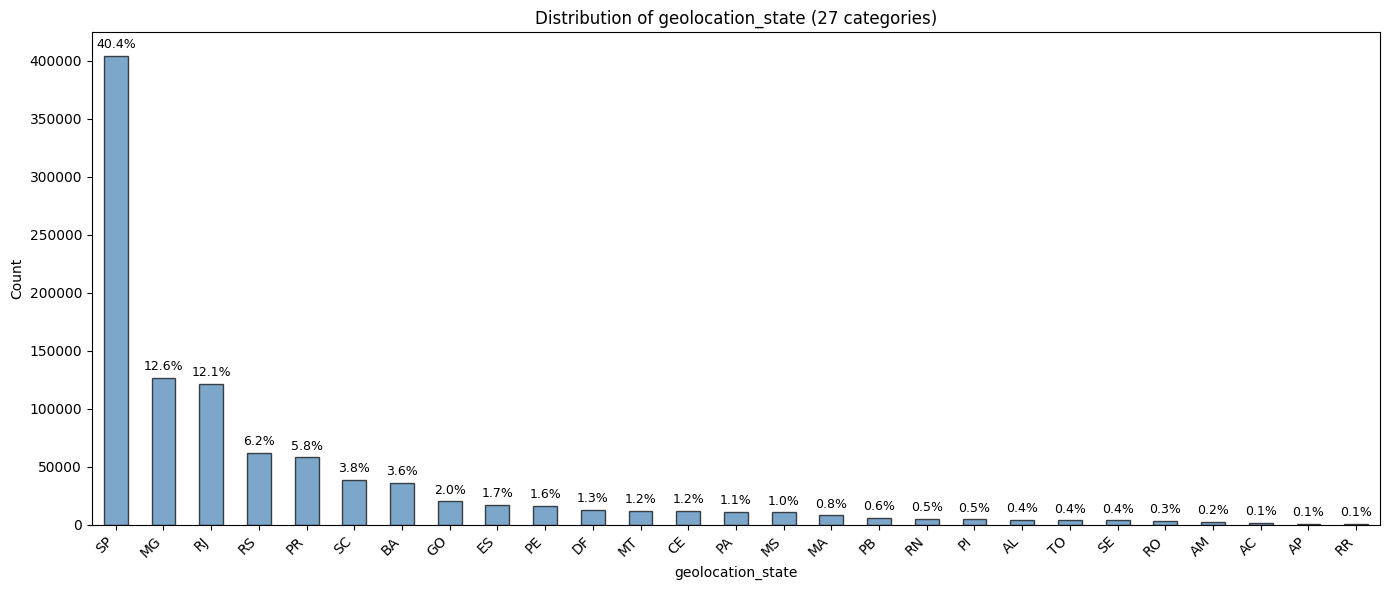


UNIVARIATE ANALYSIS - HIGH CARDINALITY COLUMNS (TOP 5 ONLY)

--- GEOLOCATION_CITY ---
Data type: string
Unique values: 8,011
Total records: 1,000,163
Cardinality ratio: 0.80%

📊 Top 5 most frequent values:
  1. sao paulo: 135,800 (13.58%)
  2. rio de janeiro: 62,151 (6.21%)
  3. belo horizonte: 27,805 (2.78%)
  4. são paulo: 24,918 (2.49%)
  5. curitiba: 16,593 (1.66%)


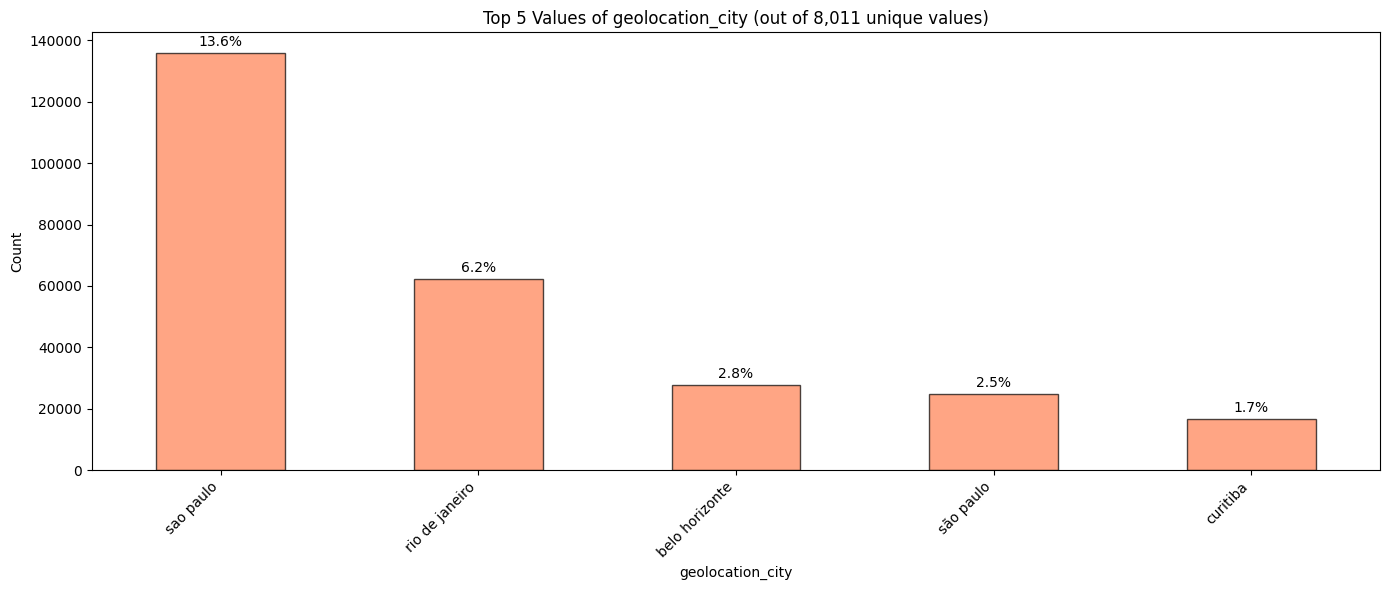


CORRELATION MATRIX


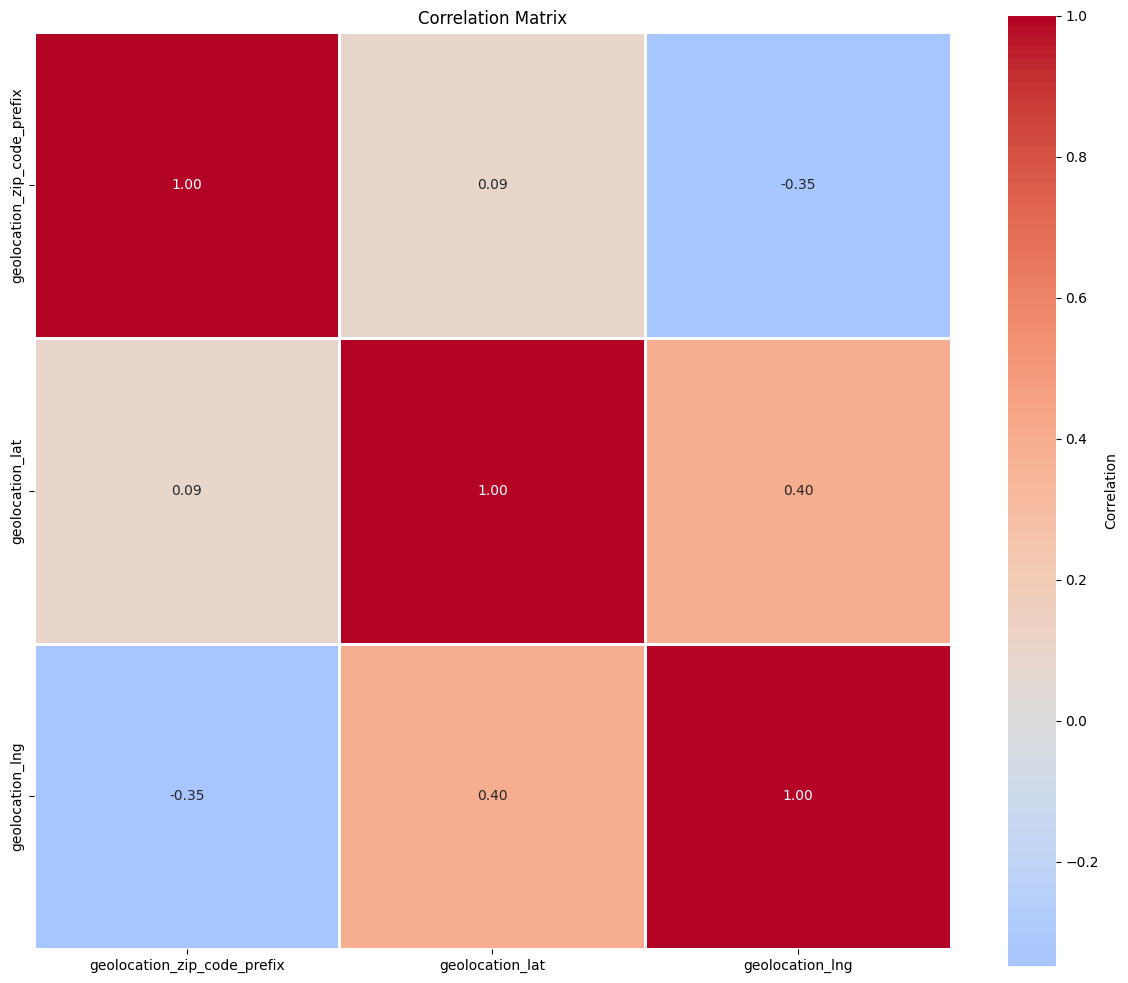


✓ EDA REPORT COMPLETED


In [16]:
# geolocation EDA
geolocation_eda = EDA_Pipeline(data['geolocation'])
geolocation_eda.generate_report()

## Geolocation Table Summary

### Overview
The geolocation table contains detailed geographic information, including zip code prefix, latitude, longitude, city, and state.

### Usage Decision
This table is excluded from the analysis because the customers table already provides equivalent demographic information, such as city and state. Including the geolocation table would introduce redundancy and unnecessary complexity without adding value to the analysis.

## Order Items

In [18]:
# Order Items Table Overview
data['order_items'].head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

In [19]:
data['order_items'].dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [20]:
# Change Data Types to Appropriate Types

# Define type mappings for order_items table
order_items_type_mapping = {
    'order_id': 'string',
    'product_id': 'string',
    'seller_id': 'string',
    'shipping_limit_date': 'datetime'
}

# Apply type mappings
cast_data_types(data['order_items'], order_items_type_mapping)

Data Types Before:
order_id: object
order_item_id: int64
product_id: object
seller_id: object
shipping_limit_date: object
price: float64
freight_value: float64

Data Types After:
order_id: string
order_item_id: int64
product_id: string
seller_id: string
shipping_limit_date: datetime64[ns]
price: float64
freight_value: float64


⚠️  'order_id' is high cardinality (unique values: 98666) - will show top 5 only
⚠️  'product_id' is high cardinality (unique values: 32951) - will show top 5 only
⚠️  'seller_id' is high cardinality (unique values: 3095) - will show top 5 only

✓ Detected 3 numerical columns
✓ Detected 0 categorical columns (≤100 unique)
✓ Detected 1 datetime columns
✓ Detected 3 high-cardinality columns (>100 unique)

--- Column Type Breakdown ---
Numerical: ['order_item_id', 'price', 'freight_value']
Datetime: ['shipping_limit_date']
High Cardinality: ['order_id', 'product_id', 'seller_id']

     AUTOMATED EDA REPORT

DATA OVERVIEW

Dataset Shape: 112,650 rows × 7 columns
Memory Usage: 32.12 MB

--- Data Types ---
string[python]    3
float64           2
int64             1
datetime64[ns]    1
Name: count, dtype: int64

--- Missing Values ---
No missing values found!

--- Duplicates ---
Total duplicates: 0 (0.00%)

UNIVARIATE ANALYSIS - DATETIME FEATURES

--- SHIPPING_LIMIT_DATE ---
Earliest date: 20

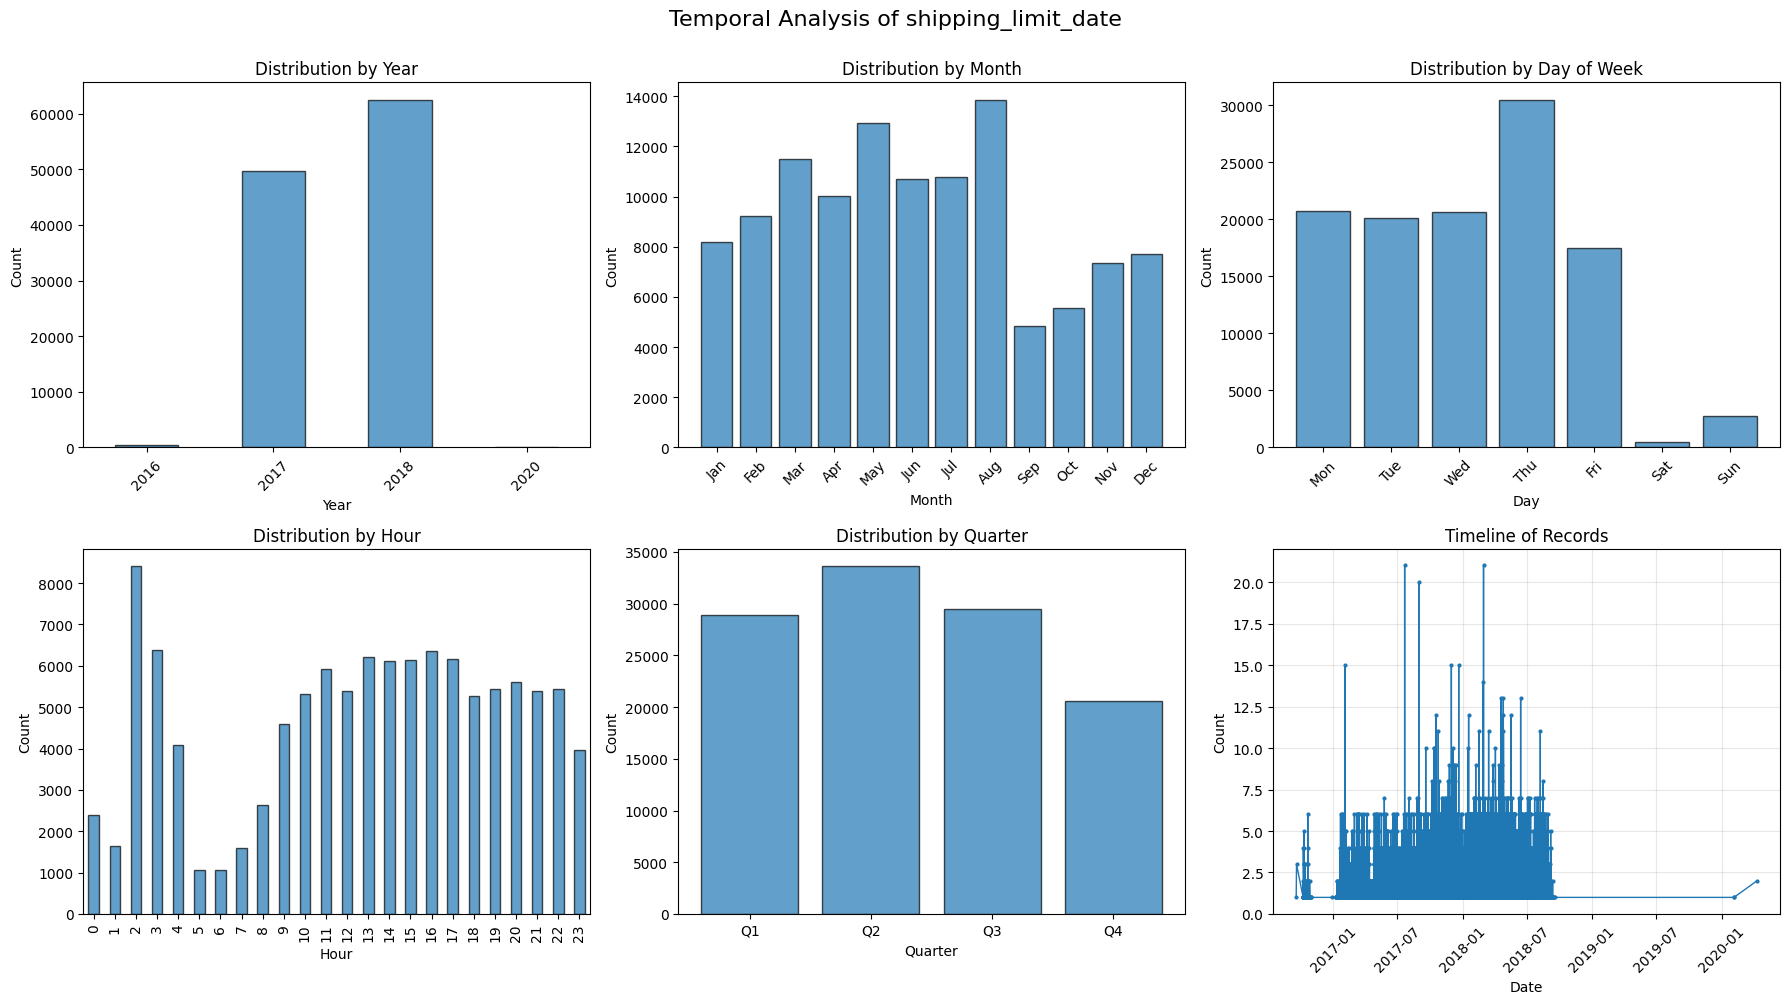


--- Temporal Component Statistics ---
Most common year: 2018
Most common month: 8
Most common day of week: Thu
Most common hour: 2:00

UNIVARIATE ANALYSIS - NUMERICAL FEATURES

--- ORDER_ITEM_ID ---
count    112650.000000
mean          1.197834
std           0.705124
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          21.000000
Name: order_item_id, dtype: float64
Skewness: 7.580
Kurtosis: 103.857
Outliers: 13984 (12.41%)


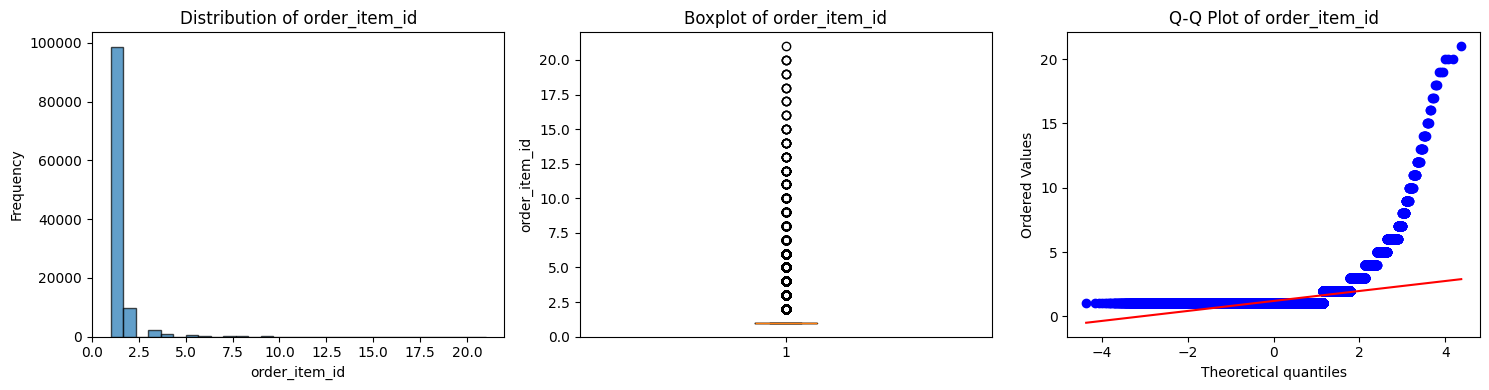


--- PRICE ---
count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64
Skewness: 7.923
Kurtosis: 120.828
Outliers: 8427 (7.48%)


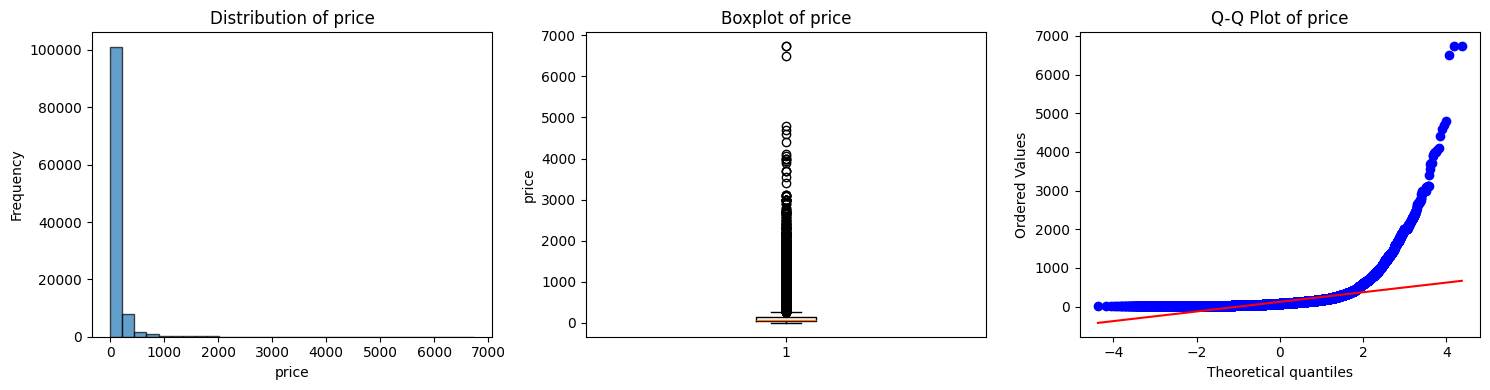


--- FREIGHT_VALUE ---
count    112650.000000
mean         19.990320
std          15.806405
min           0.000000
25%          13.080000
50%          16.260000
75%          21.150000
max         409.680000
Name: freight_value, dtype: float64
Skewness: 5.640
Kurtosis: 59.788
Outliers: 12134 (10.77%)


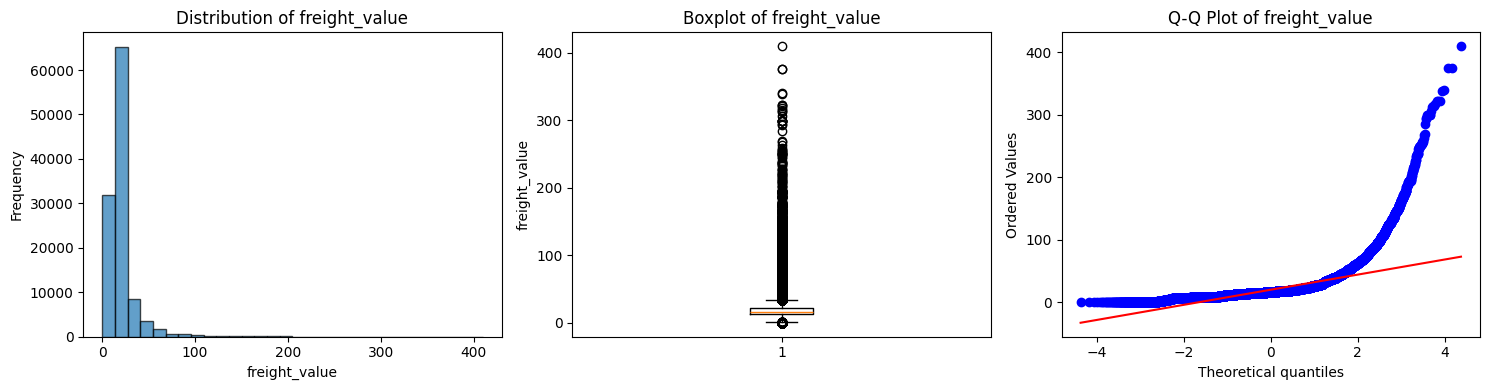


UNIVARIATE ANALYSIS - CATEGORICAL FEATURES (LOW CARDINALITY)

UNIVARIATE ANALYSIS - HIGH CARDINALITY COLUMNS (TOP 5 ONLY)

--- ORDER_ID ---
Data type: string
Unique values: 98,666
Total records: 112,650
Cardinality ratio: 87.59%

📊 Top 5 most frequent values:
  1. 8272b63d03f5f79c56e9e4120aec44ef: 21 (0.02%)
  2. 1b15974a0141d54e36626dca3fdc731a: 20 (0.02%)
  3. ab14fdcfbe524636d65ee38360e22ce8: 20 (0.02%)
  4. 9ef13efd6949e4573a18964dd1bbe7f5: 15 (0.01%)
  5. 428a2f660dc84138d969ccd69a0ab6d5: 15 (0.01%)


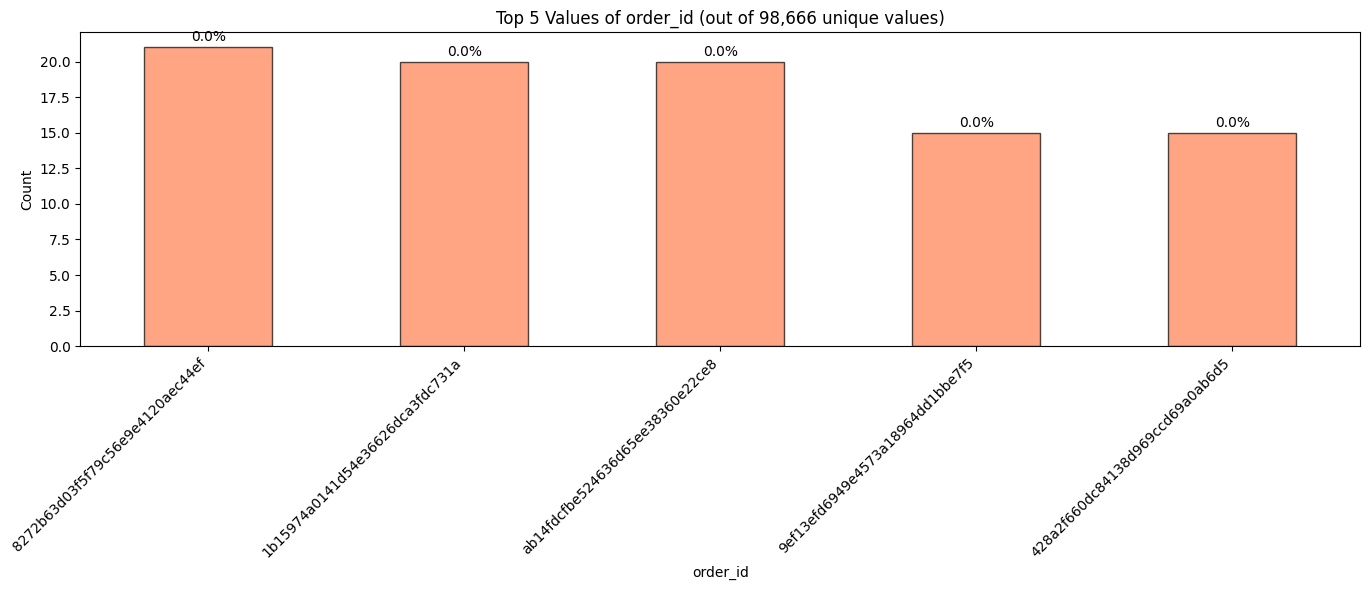


--- PRODUCT_ID ---
Data type: string
Unique values: 32,951
Total records: 112,650
Cardinality ratio: 29.25%

📊 Top 5 most frequent values:
  1. aca2eb7d00ea1a7b8ebd4e68314663af: 527 (0.47%)
  2. 99a4788cb24856965c36a24e339b6058: 488 (0.43%)
  3. 422879e10f46682990de24d770e7f83d: 484 (0.43%)
  4. 389d119b48cf3043d311335e499d9c6b: 392 (0.35%)
  5. 368c6c730842d78016ad823897a372db: 388 (0.34%)


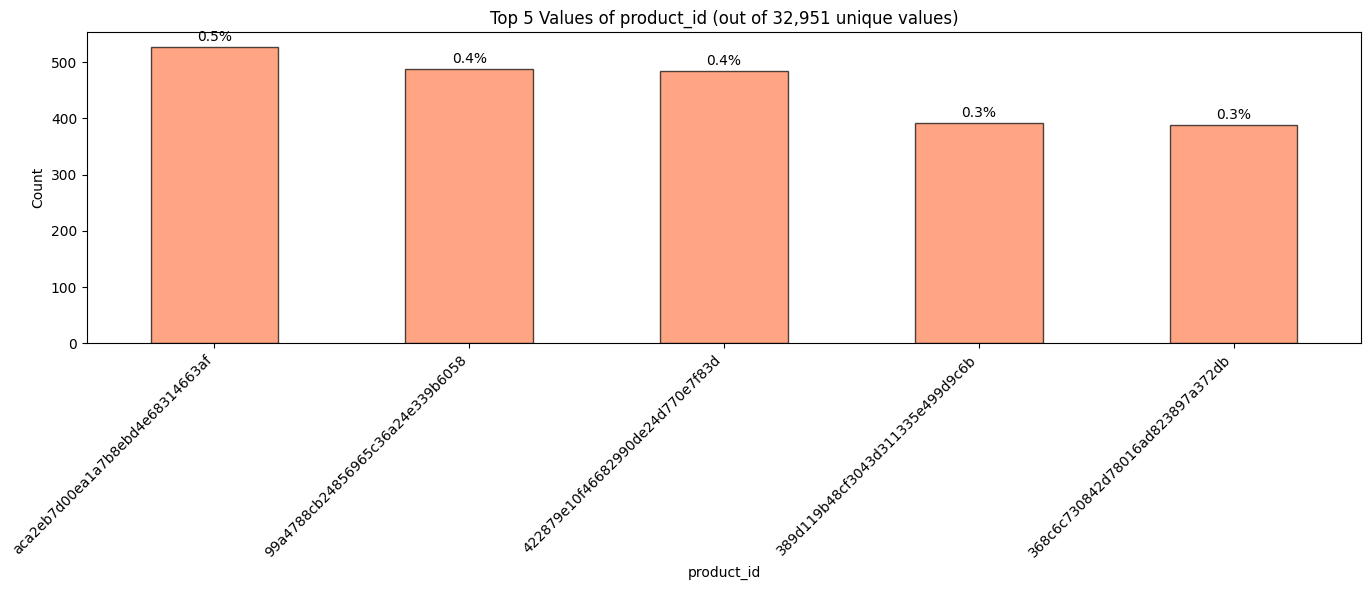


--- SELLER_ID ---
Data type: string
Unique values: 3,095
Total records: 112,650
Cardinality ratio: 2.75%

📊 Top 5 most frequent values:
  1. 6560211a19b47992c3666cc44a7e94c0: 2,033 (1.80%)
  2. 4a3ca9315b744ce9f8e9374361493884: 1,987 (1.76%)
  3. 1f50f920176fa81dab994f9023523100: 1,931 (1.71%)
  4. cc419e0650a3c5ba77189a1882b7556a: 1,775 (1.58%)
  5. da8622b14eb17ae2831f4ac5b9dab84a: 1,551 (1.38%)


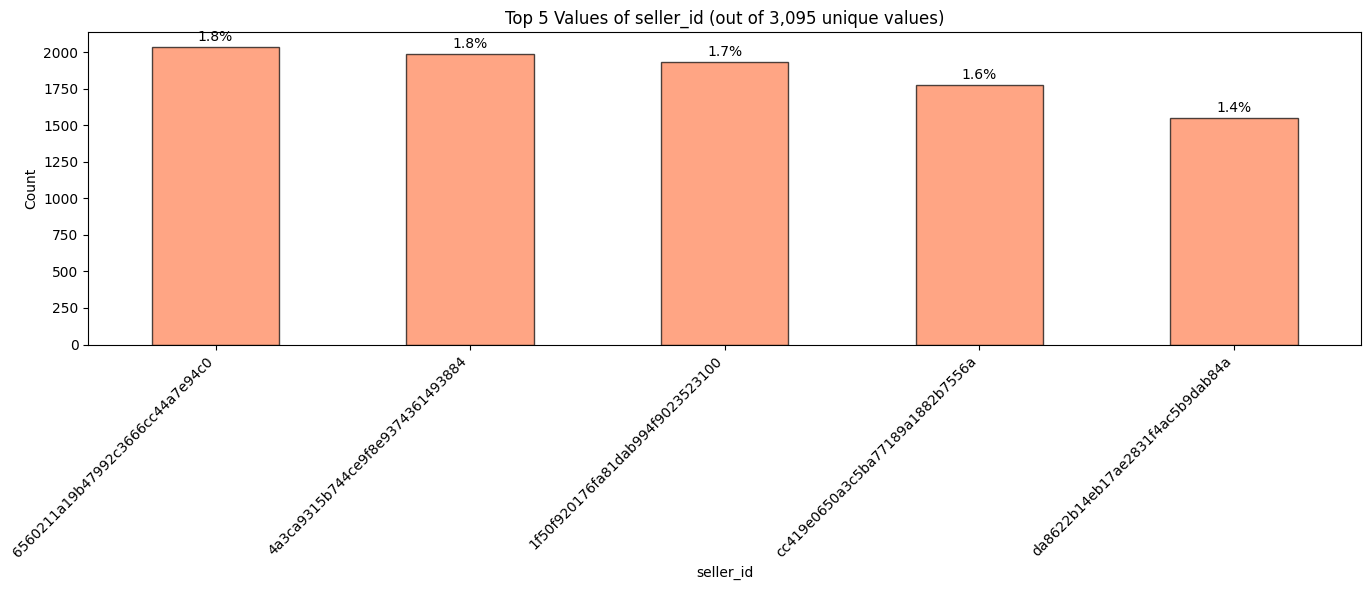


CORRELATION MATRIX


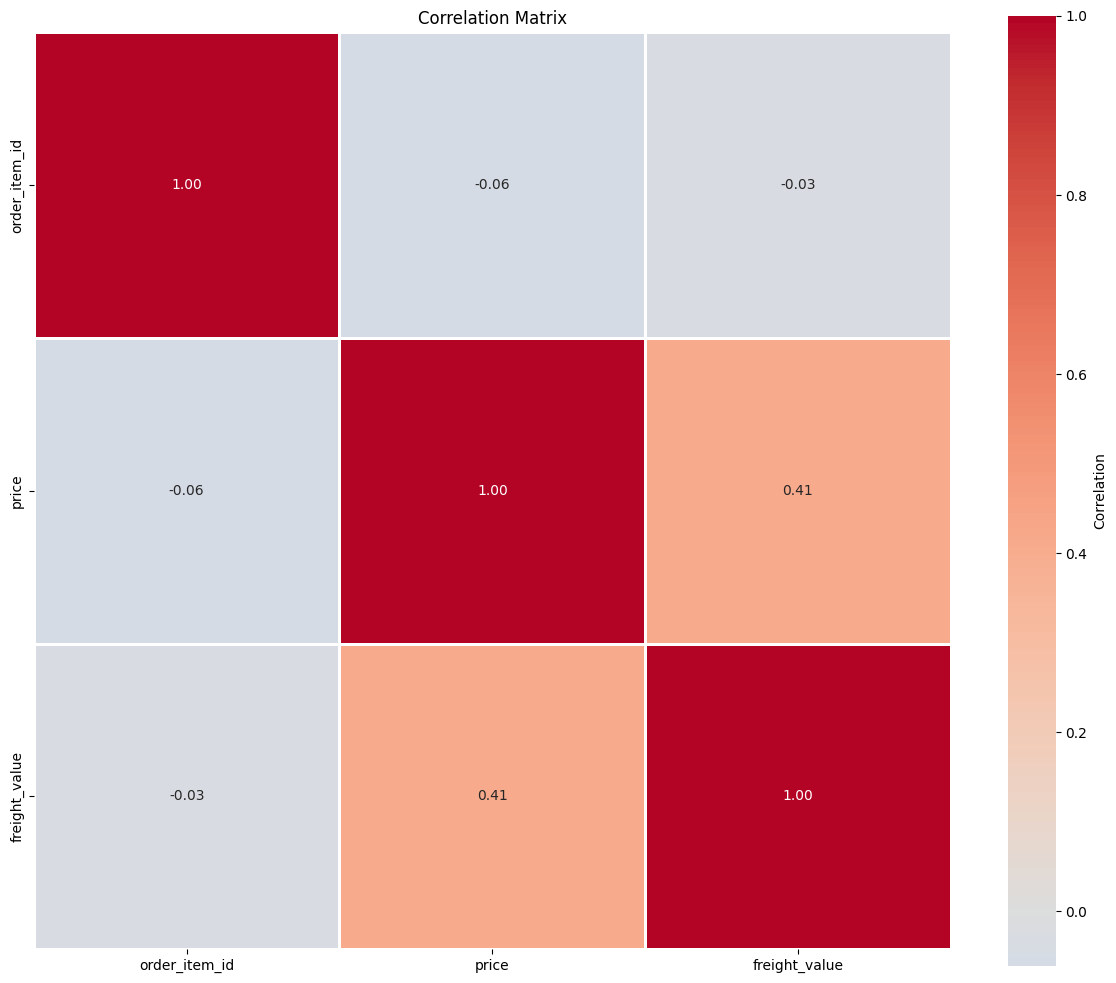


✓ EDA REPORT COMPLETED


In [21]:
# order_items EDA
order_items_eda = EDA_Pipeline(data['order_items'])
order_items_eda.generate_report()

## Order Items Table Summary

### Data Types Need to be Casted
| Column               | Cast to Type |
|----------------------|--------------|
| order_id             | string       |
| product_id           | string       |
| seller_id            | string       |
| shipping_limit_date  | datetime     |

### Key Insights

1. The `order_items` table contains detailed information about each item in an order, including the product, seller, and shipping details.
2. The `shipping_limit_date` column provides the deadline for shipping, which can be used to analyze delivery performance.
3. The table has a total of 112,650 rows, indicating the number of items sold across all orders.
4. The EDA revealed that most items are shipped within the specified shipping limit, but delays in shipping can negatively impact customer satisfaction.
5. The distribution of items per order shows that most orders contain only one item, with a smaller percentage of orders containing multiple items.

## Orders

In [22]:
# Orders Table Overview
data['orders'].head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [23]:
data['orders'].dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [24]:
# Change Data Types to Appropriate Types

# Define type mappings for orders table
orders_type_mapping = {
    'order_id': 'string',
    'customer_id': 'string',
    'order_status': 'category',
    'order_purchase_timestamp': 'datetime',
    'order_approved_at': 'datetime',
    'order_delivered_carrier_date': 'datetime',
    'order_delivered_customer_date': 'datetime',
    'order_estimated_delivery_date': 'datetime'
}

# Apply type mappings
cast_data_types(data['orders'], orders_type_mapping)

Data Types Before:
order_id: object
customer_id: object
order_status: object
order_purchase_timestamp: object
order_approved_at: object
order_delivered_carrier_date: object
order_delivered_customer_date: object
order_estimated_delivery_date: object

Data Types After:
order_id: string
customer_id: string
order_status: category
order_purchase_timestamp: datetime64[ns]
order_approved_at: datetime64[ns]
order_delivered_carrier_date: datetime64[ns]
order_delivered_customer_date: datetime64[ns]
order_estimated_delivery_date: datetime64[ns]


⚠️  'order_id' is high cardinality (unique values: 99441) - will show top 5 only
⚠️  'customer_id' is high cardinality (unique values: 99441) - will show top 5 only
✓ 'order_status' added to categorical (unique values: 8)

✓ Detected 0 numerical columns
✓ Detected 1 categorical columns (≤100 unique)
✓ Detected 5 datetime columns
✓ Detected 2 high-cardinality columns (>100 unique)

--- Column Type Breakdown ---
Categorical: ['order_status']
Datetime: ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
High Cardinality: ['order_id', 'customer_id']

     AUTOMATED EDA REPORT

DATA OVERVIEW

Dataset Shape: 99,441 rows × 8 columns
Memory Usage: 20.77 MB

--- Data Types ---
datetime64[ns]    5
string[python]    2
category          1
Name: count, dtype: int64

--- Missing Values ---
                               Missing  Percentage
order_delivered_customer_date     2965        2.98
order_delivered

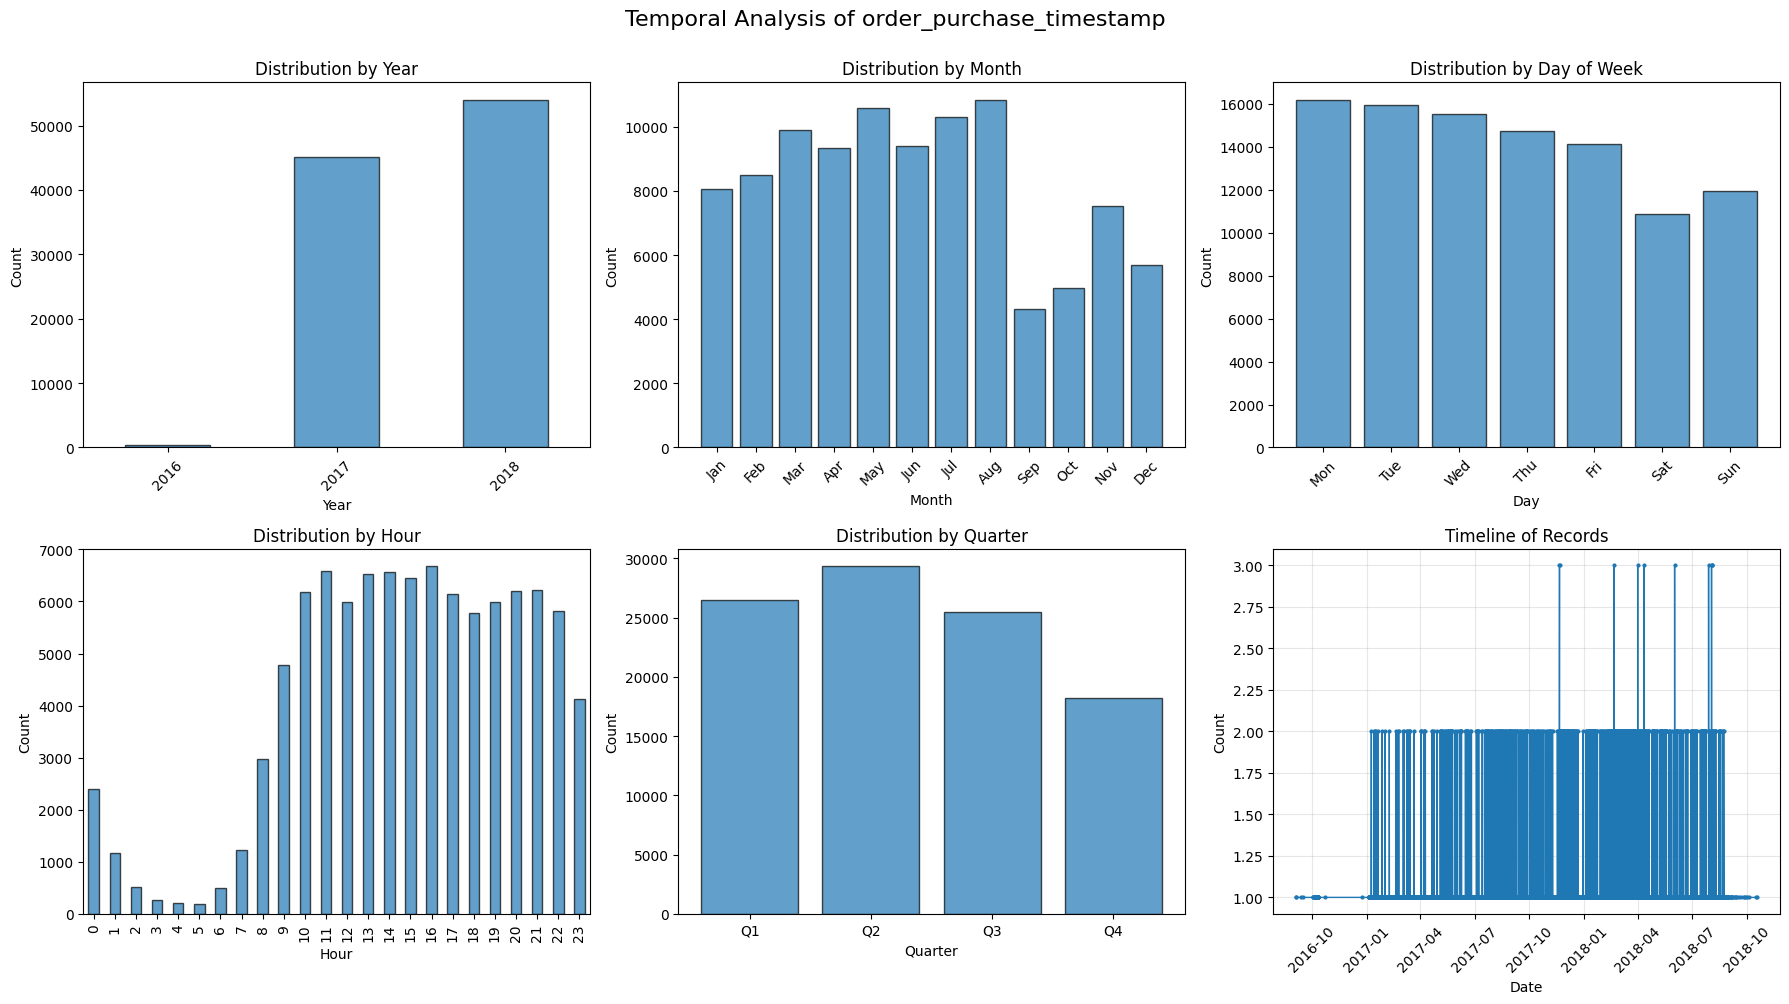


--- Temporal Component Statistics ---
Most common year: 2018
Most common month: 8
Most common day of week: Mon
Most common hour: 16:00

--- ORDER_APPROVED_AT ---
Earliest date: 2016-09-15 12:16:38
Latest date: 2018-09-03 17:40:06
Date range: 718 days
Missing values: 160 (0.16%)


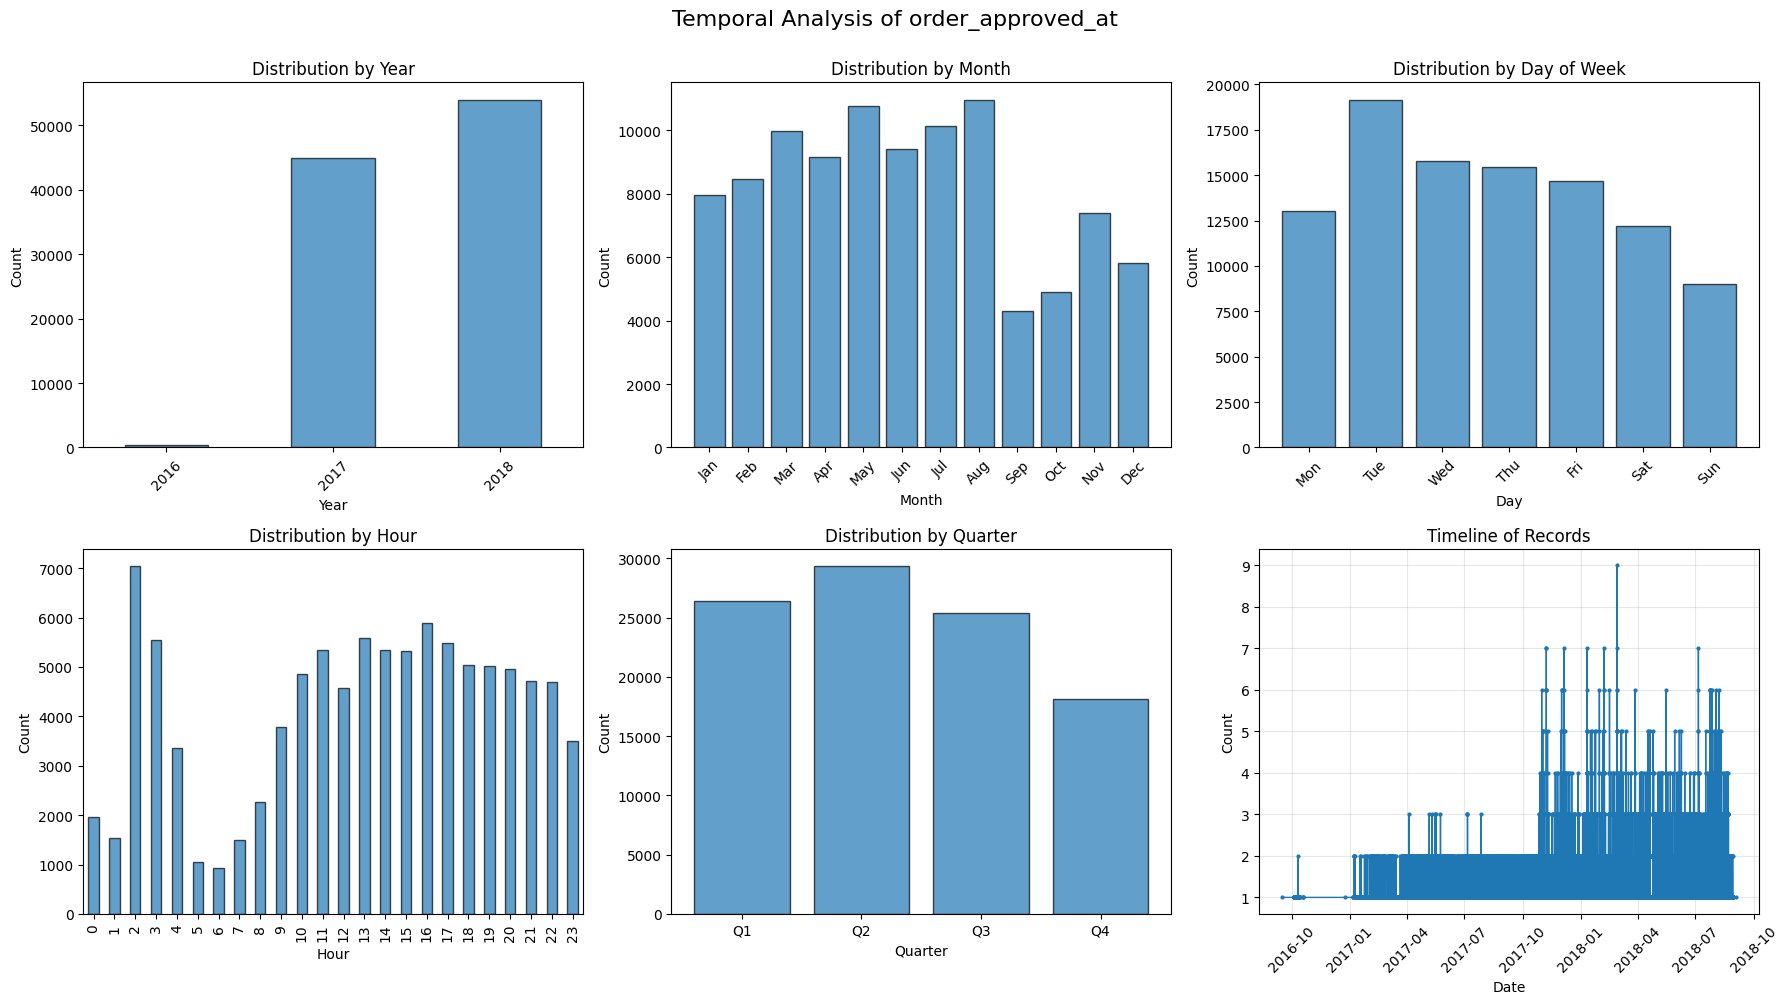


--- Temporal Component Statistics ---
Most common year: 2018
Most common month: 8
Most common day of week: Tue
Most common hour: 2:00

--- ORDER_DELIVERED_CARRIER_DATE ---
Earliest date: 2016-10-08 10:34:01
Latest date: 2018-09-11 19:48:28
Date range: 703 days
Missing values: 1783 (1.79%)


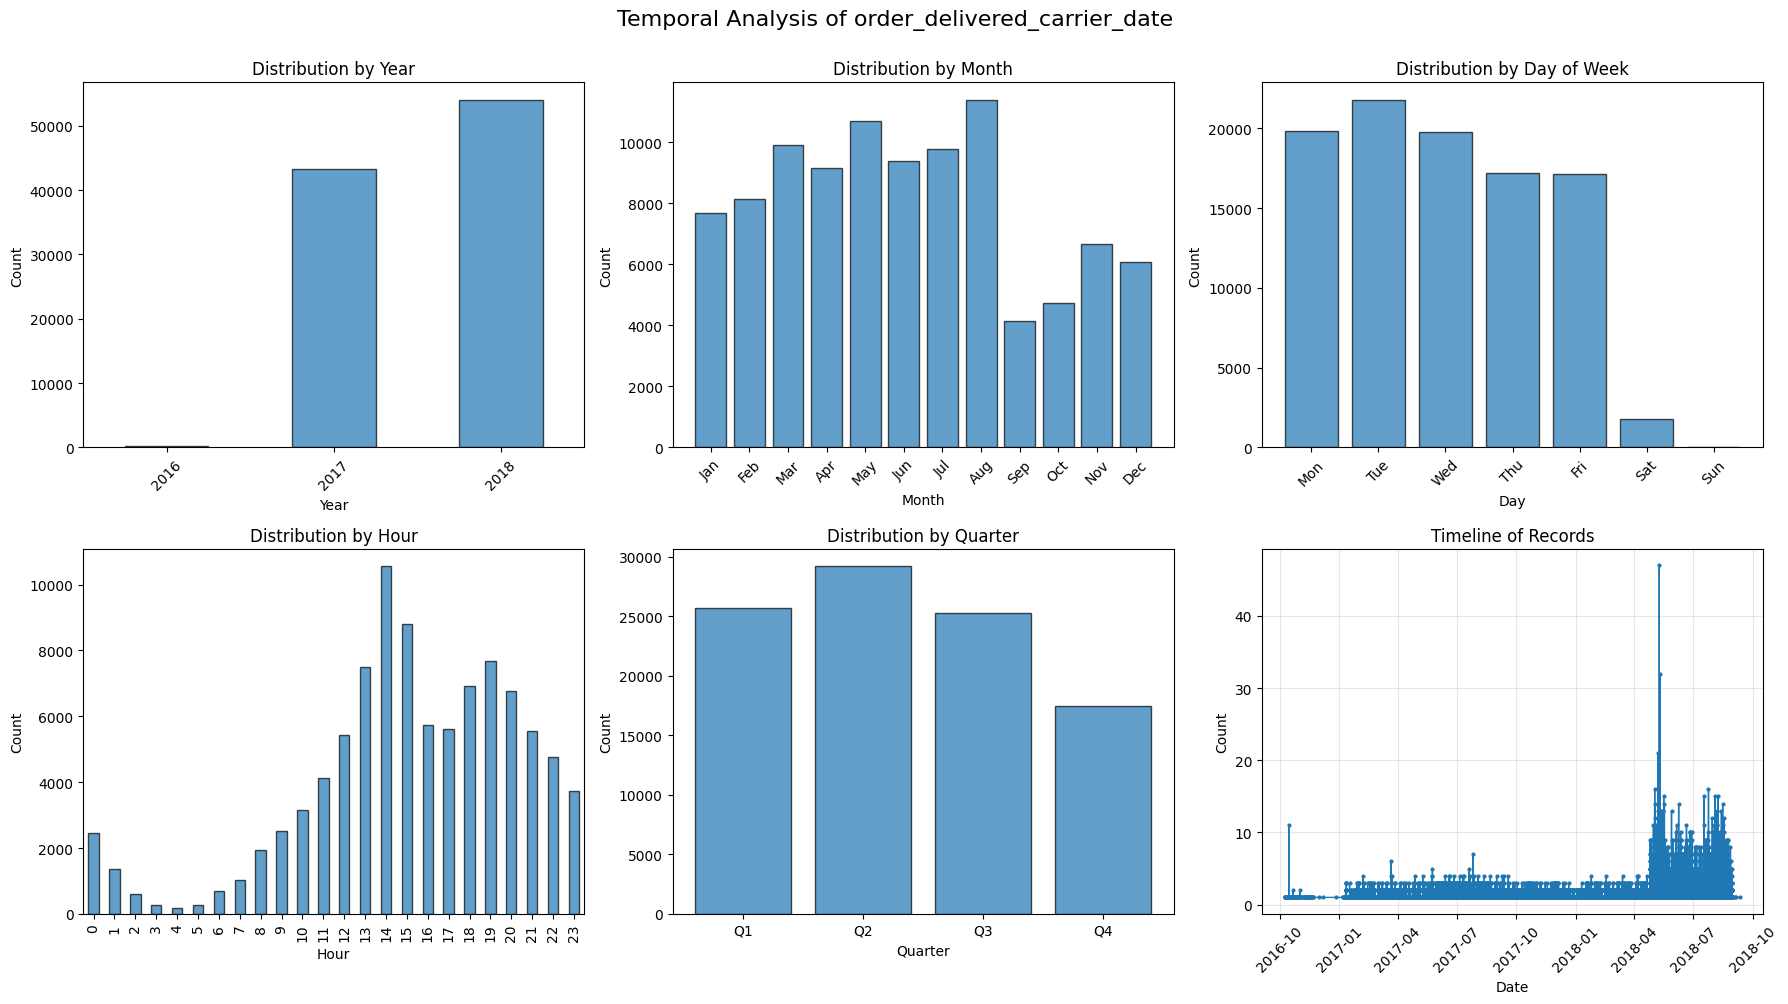


--- Temporal Component Statistics ---
Most common year: 2018
Most common month: 8
Most common day of week: Tue
Most common hour: 14:00

--- ORDER_DELIVERED_CUSTOMER_DATE ---
Earliest date: 2016-10-11 13:46:32
Latest date: 2018-10-17 13:22:46
Date range: 735 days
Missing values: 2965 (2.98%)


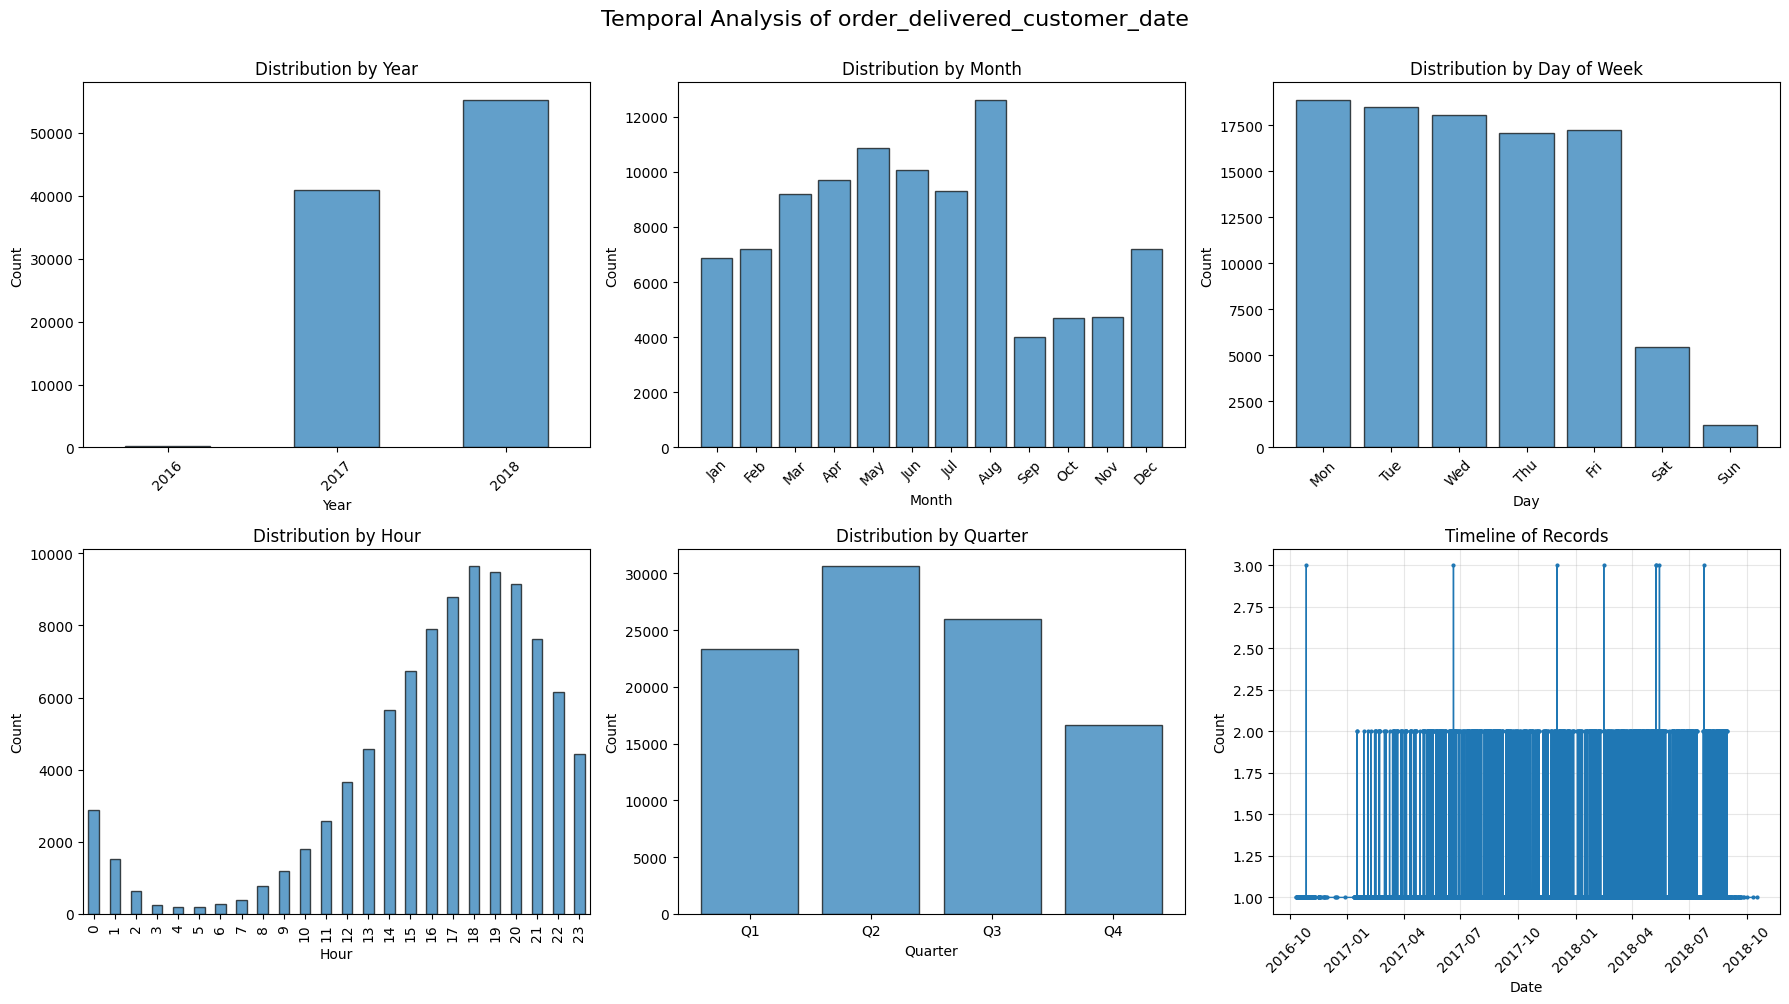


--- Temporal Component Statistics ---
Most common year: 2018
Most common month: 8
Most common day of week: Mon
Most common hour: 18:00

--- ORDER_ESTIMATED_DELIVERY_DATE ---
Earliest date: 2016-09-30 00:00:00
Latest date: 2018-11-12 00:00:00
Date range: 773 days
Missing values: 0 (0.00%)


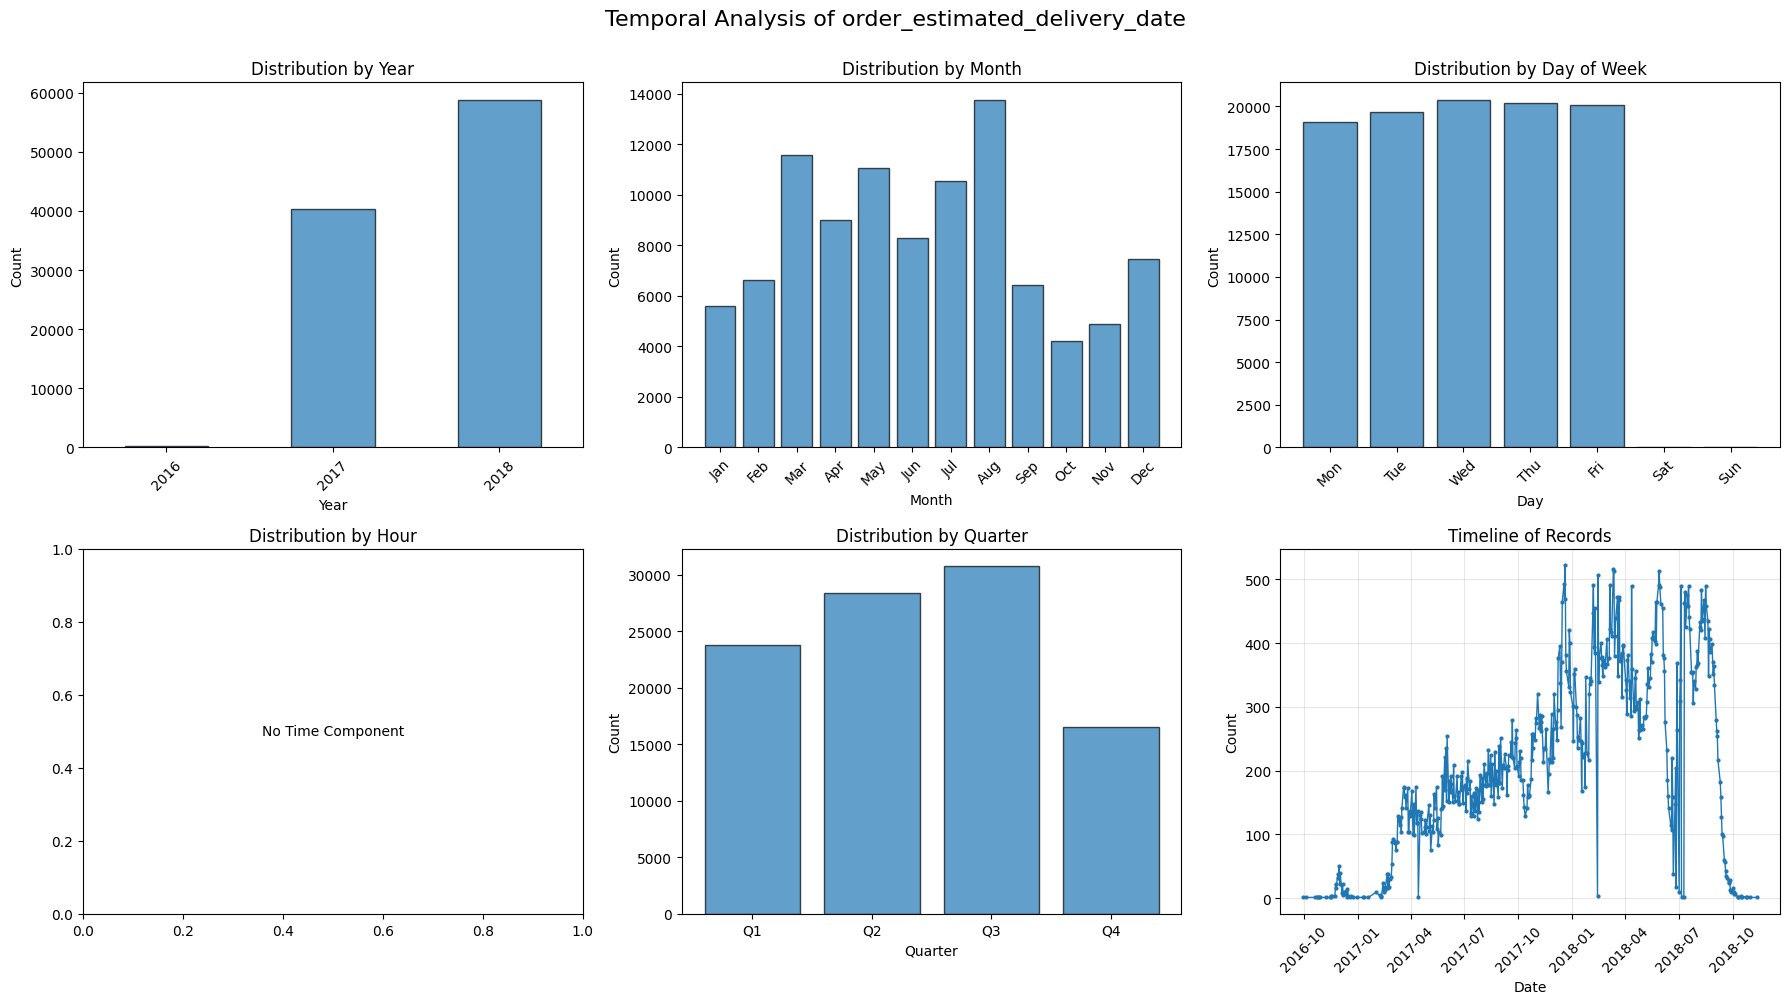


--- Temporal Component Statistics ---
Most common year: 2018
Most common month: 8
Most common day of week: Wed

UNIVARIATE ANALYSIS - CATEGORICAL FEATURES (LOW CARDINALITY)

--- ORDER_STATUS ---
Data type: category
Unique values: 8

Value counts (all 8 categories):
order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

Percentage distribution:
order_status
delivered      97.02
shipped         1.11
canceled        0.63
unavailable     0.61
invoiced        0.32
processing      0.30
created         0.01
approved        0.00
Name: count, dtype: float64


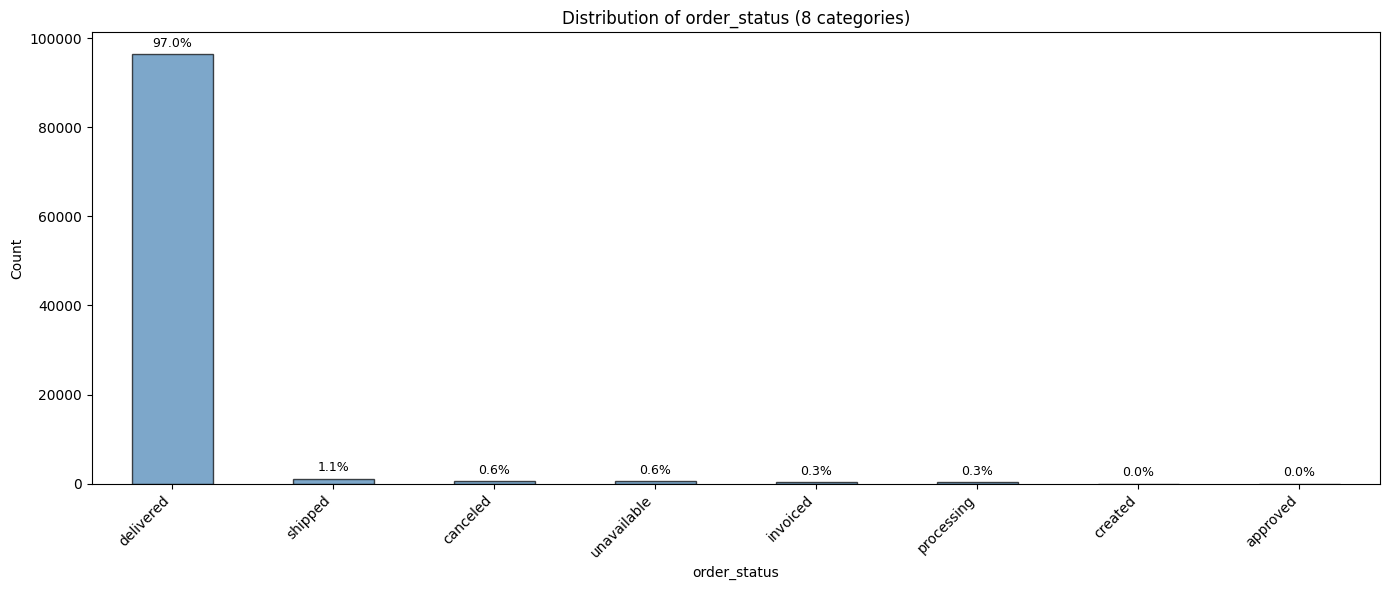


UNIVARIATE ANALYSIS - HIGH CARDINALITY COLUMNS (TOP 5 ONLY)

--- ORDER_ID ---
Data type: string
Unique values: 99,441
Total records: 99,441
Cardinality ratio: 100.00%

📊 Top 5 most frequent values:
  1. e481f51cbdc54678b7cc49136f2d6af7: 1 (0.00%)
  2. f01059d0d674e1282df4e8fbbe015aa2: 1 (0.00%)
  3. fbc17f0f2a2125054d5ac5c22d2d5120: 1 (0.00%)
  4. 9373150545066777b1cd2bc20e93cf8e: 1 (0.00%)
  5. 917399e96f92268dfa2c0351b1b75fba: 1 (0.00%)


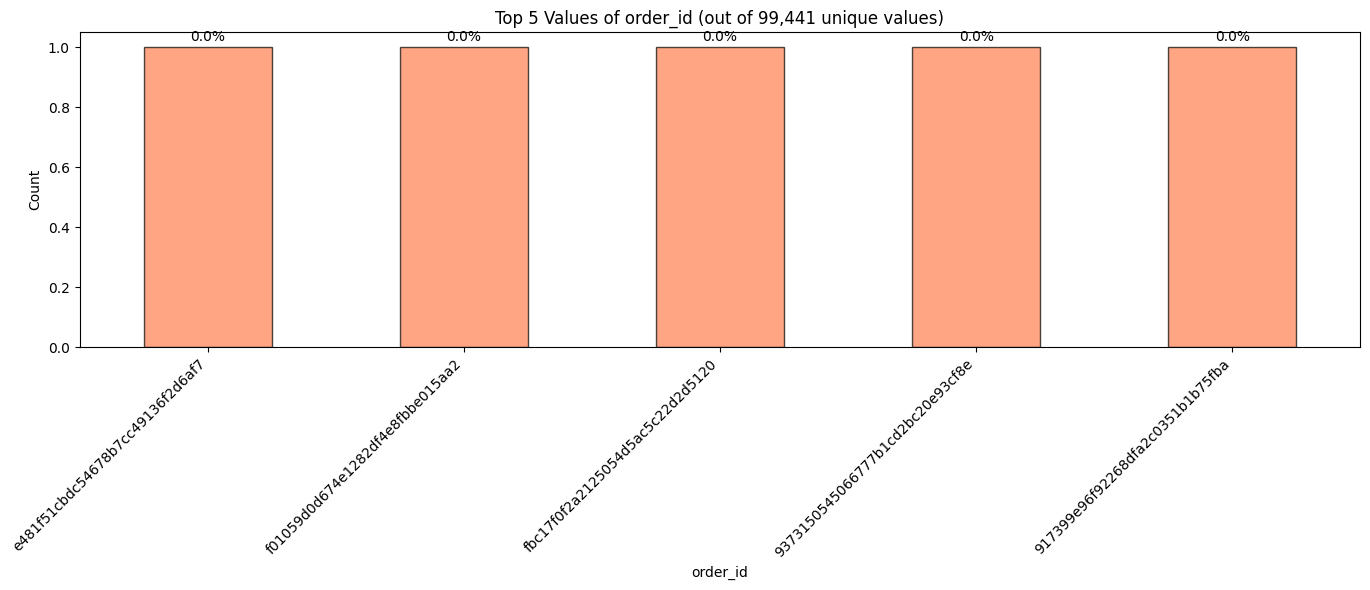


--- CUSTOMER_ID ---
Data type: string
Unique values: 99,441
Total records: 99,441
Cardinality ratio: 100.00%

📊 Top 5 most frequent values:
  1. 9ef432eb6251297304e76186b10a928d: 1 (0.00%)
  2. 413f7e58270a32396af030a075b924be: 1 (0.00%)
  3. eb4350b67a0264c67e5e06a038e4afbb: 1 (0.00%)
  4. 622b07d262d545d16efbd4363a89cb91: 1 (0.00%)
  5. c701fbfa77791abd05eef9eacf7ea7a8: 1 (0.00%)


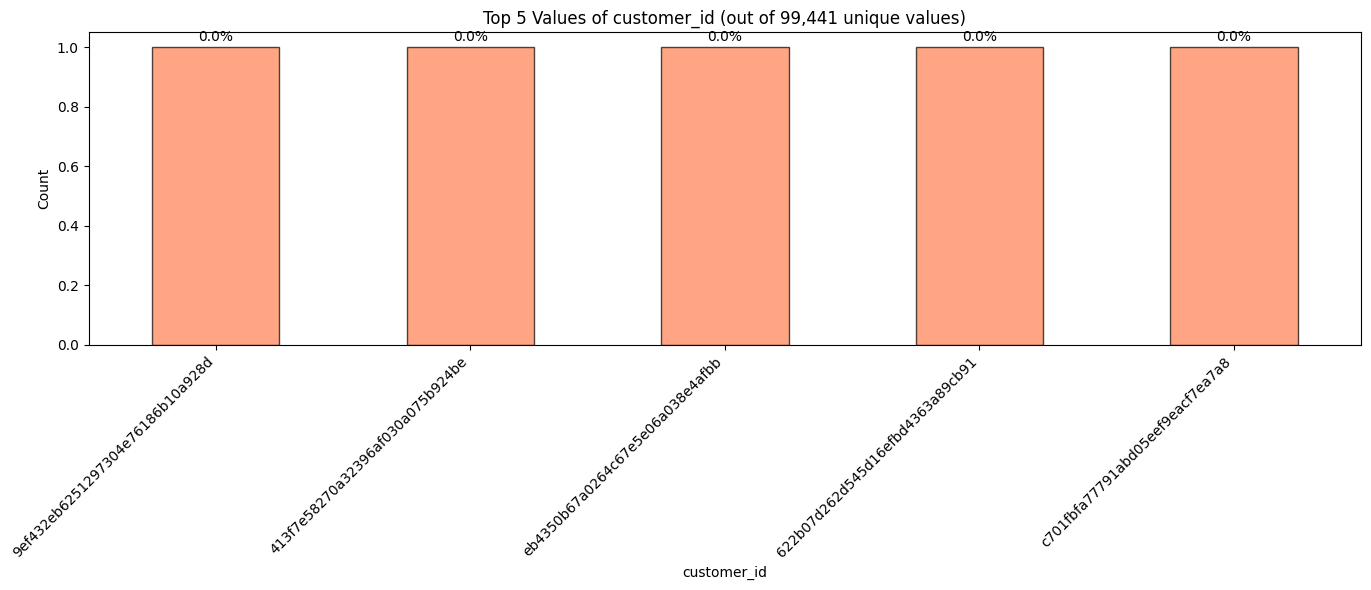


⚠ Not enough numerical columns for correlation matrix

✓ EDA REPORT COMPLETED


In [26]:
# orders EDA
orders_eda = EDA_Pipeline(data['orders'])
orders_eda.generate_report()

## Orders Table Summary

### Data Types Need to be Casted
| Column                       | Cast to Type |
|------------------------------|--------------|
| order_id                     | string       |
| customer_id                  | string       |
| order_status                 | categorical  |
| order_purchase_timestamp     | datetime     |
| order_approved_at            | datetime     |
| order_delivered_carrier_date | datetime     |
| order_delivered_customer_date| datetime     |
| order_estimated_delivery_date| datetime     |

### Key Insights

1. The `orders` table contains information about customer orders, including their status, timestamps for various stages of the order lifecycle, and estimated delivery dates.
2. The `order_status` column provides categorical data about the current state of the order (e.g., delivered, shipped, canceled).
3. The timestamps allow for analysis of order processing times, delivery performance, and customer wait times.
4. The EDA revealed that most orders are delivered within the estimated delivery date, but some delays are observed, which can impact customer satisfaction.
5. The distribution of order status shows that the majority of orders are successfully delivered, with a smaller percentage being canceled or returned.

## Order Payments

In [27]:
data['order_payments'].head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

In [28]:
data['order_payments'].dtypes

order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

In [29]:
# Change Data Types to Appropriate Types

# Define type mappings for order_payments table
order_payments_type_mapping = {
    'order_id': 'string',
    'payment_type': 'category'
}

# Apply type mappings
cast_data_types(data['order_payments'], order_payments_type_mapping)

Data Types Before:
order_id: object
payment_sequential: int64
payment_type: object
payment_installments: int64
payment_value: float64

Data Types After:
order_id: string
payment_sequential: int64
payment_type: category
payment_installments: int64
payment_value: float64


⚠️  'order_id' is high cardinality (unique values: 99440) - will show top 5 only
✓ 'payment_type' added to categorical (unique values: 5)

✓ Detected 3 numerical columns
✓ Detected 1 categorical columns (≤100 unique)
✓ Detected 0 datetime columns
✓ Detected 1 high-cardinality columns (>100 unique)

--- Column Type Breakdown ---
Categorical: ['payment_type']
Numerical: ['payment_sequential', 'payment_installments', 'payment_value']
High Cardinality: ['order_id']

     AUTOMATED EDA REPORT

DATA OVERVIEW

Dataset Shape: 103,886 rows × 5 columns
Memory Usage: 11.29 MB

--- Data Types ---
int64             2
string[python]    1
category          1
float64           1
Name: count, dtype: int64

--- Missing Values ---
No missing values found!

--- Duplicates ---
Total duplicates: 0 (0.00%)

UNIVARIATE ANALYSIS - NUMERICAL FEATURES

--- PAYMENT_SEQUENTIAL ---
count    103886.000000
mean          1.092679
std           0.706584
min           1.000000
25%           1.000000
50%           1.0000

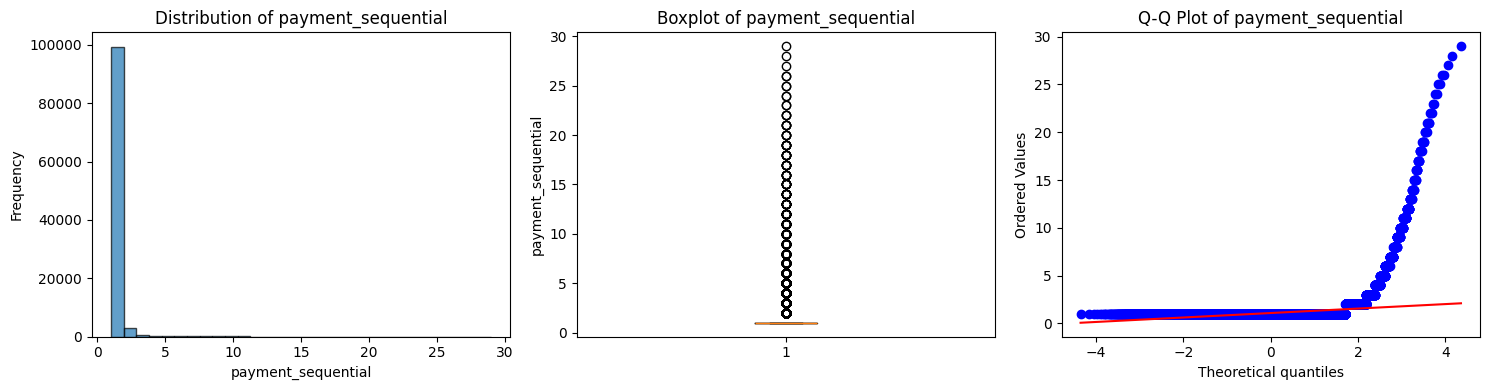


--- PAYMENT_INSTALLMENTS ---
count    103886.000000
mean          2.853349
std           2.687051
min           0.000000
25%           1.000000
50%           1.000000
75%           4.000000
max          24.000000
Name: payment_installments, dtype: float64
Skewness: 1.655
Kurtosis: 2.550
Outliers: 6313 (6.08%)


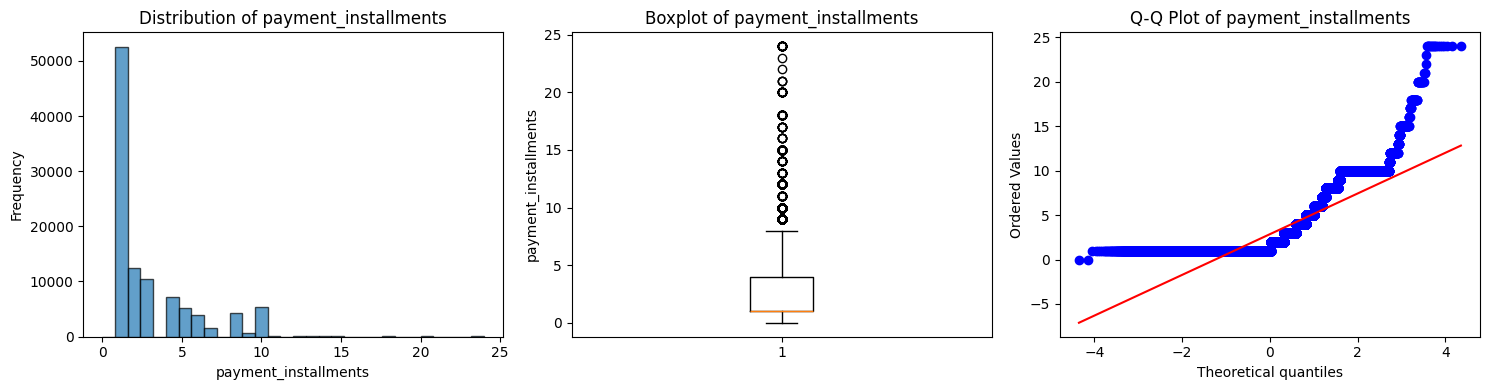


--- PAYMENT_VALUE ---
count    103886.000000
mean        154.100380
std         217.494064
min           0.000000
25%          56.790000
50%         100.000000
75%         171.837500
max       13664.080000
Name: payment_value, dtype: float64
Skewness: 9.254
Kurtosis: 241.828
Outliers: 7981 (7.68%)


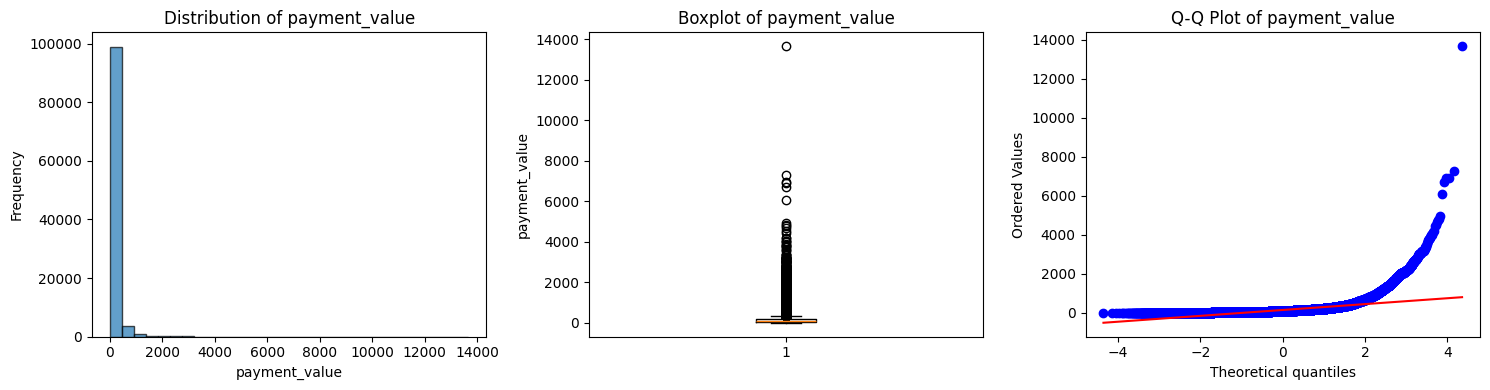


UNIVARIATE ANALYSIS - CATEGORICAL FEATURES (LOW CARDINALITY)

--- PAYMENT_TYPE ---
Data type: category
Unique values: 5

Value counts (all 5 categories):
payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

Percentage distribution:
payment_type
credit_card    73.92
boleto         19.04
voucher         5.56
debit_card      1.47
not_defined     0.00
Name: count, dtype: float64


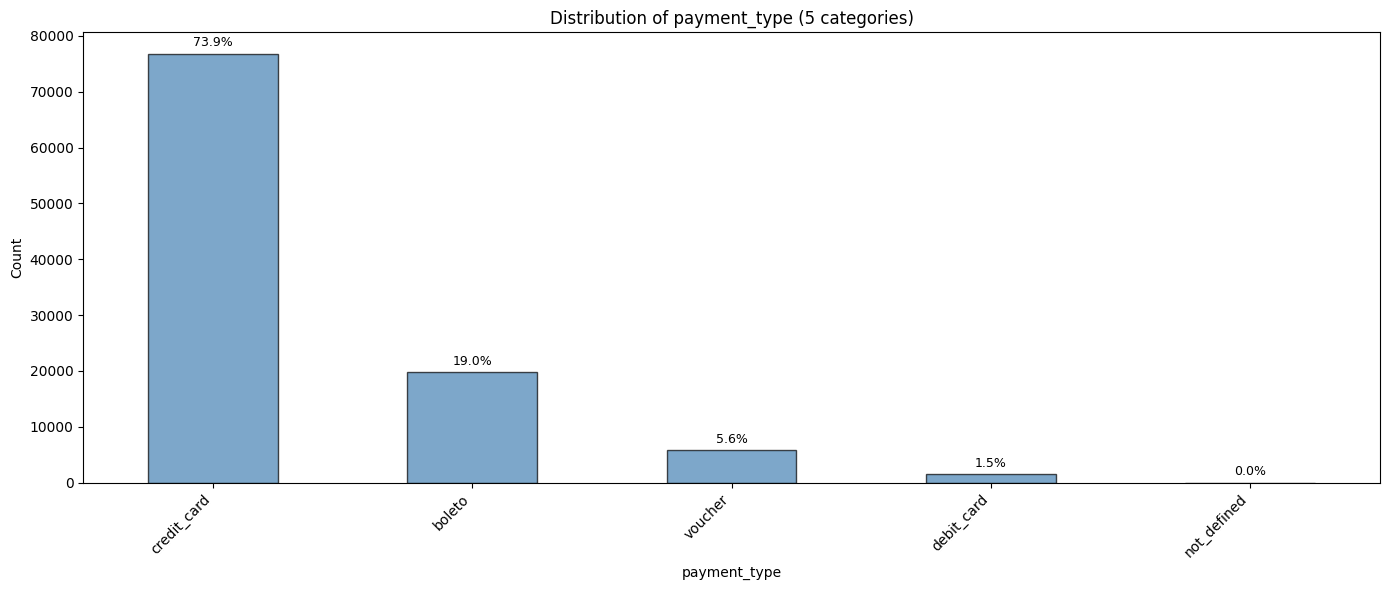


UNIVARIATE ANALYSIS - HIGH CARDINALITY COLUMNS (TOP 5 ONLY)

--- ORDER_ID ---
Data type: string
Unique values: 99,440
Total records: 103,886
Cardinality ratio: 95.72%

📊 Top 5 most frequent values:
  1. fa65dad1b0e818e3ccc5cb0e39231352: 29 (0.03%)
  2. ccf804e764ed5650cd8759557269dc13: 26 (0.03%)
  3. 285c2e15bebd4ac83635ccc563dc71f4: 22 (0.02%)
  4. 895ab968e7bb0d5659d16cd74cd1650c: 21 (0.02%)
  5. fedcd9f7ccdc8cba3a18defedd1a5547: 19 (0.02%)


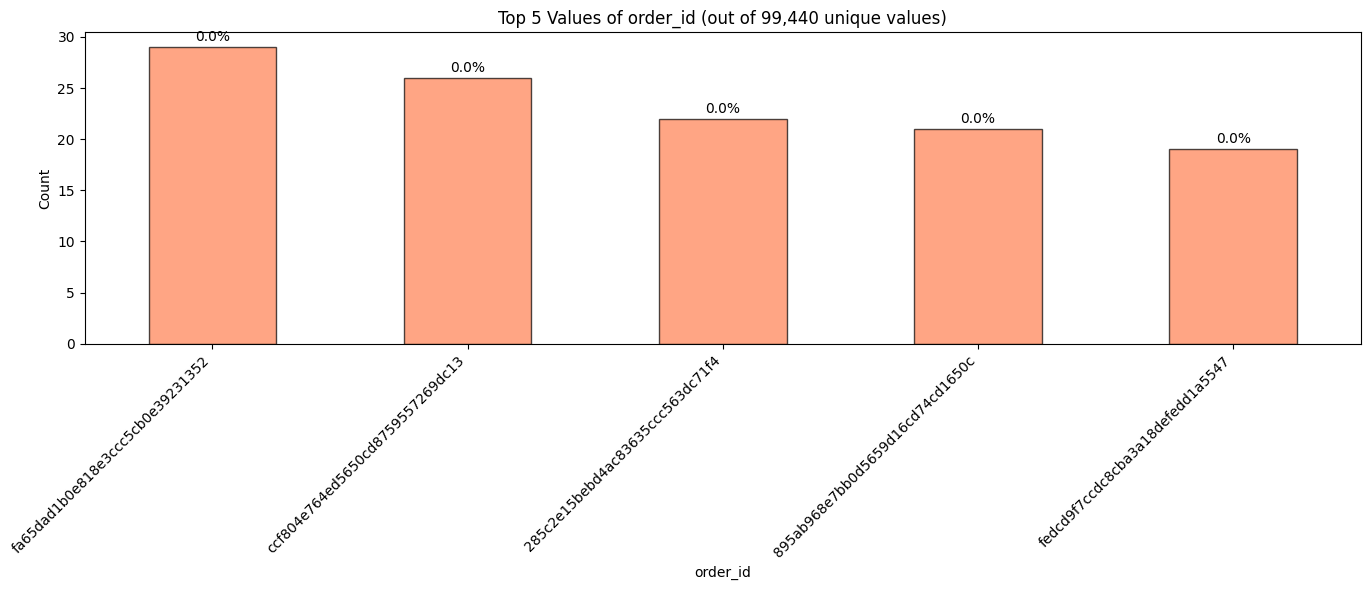


CORRELATION MATRIX


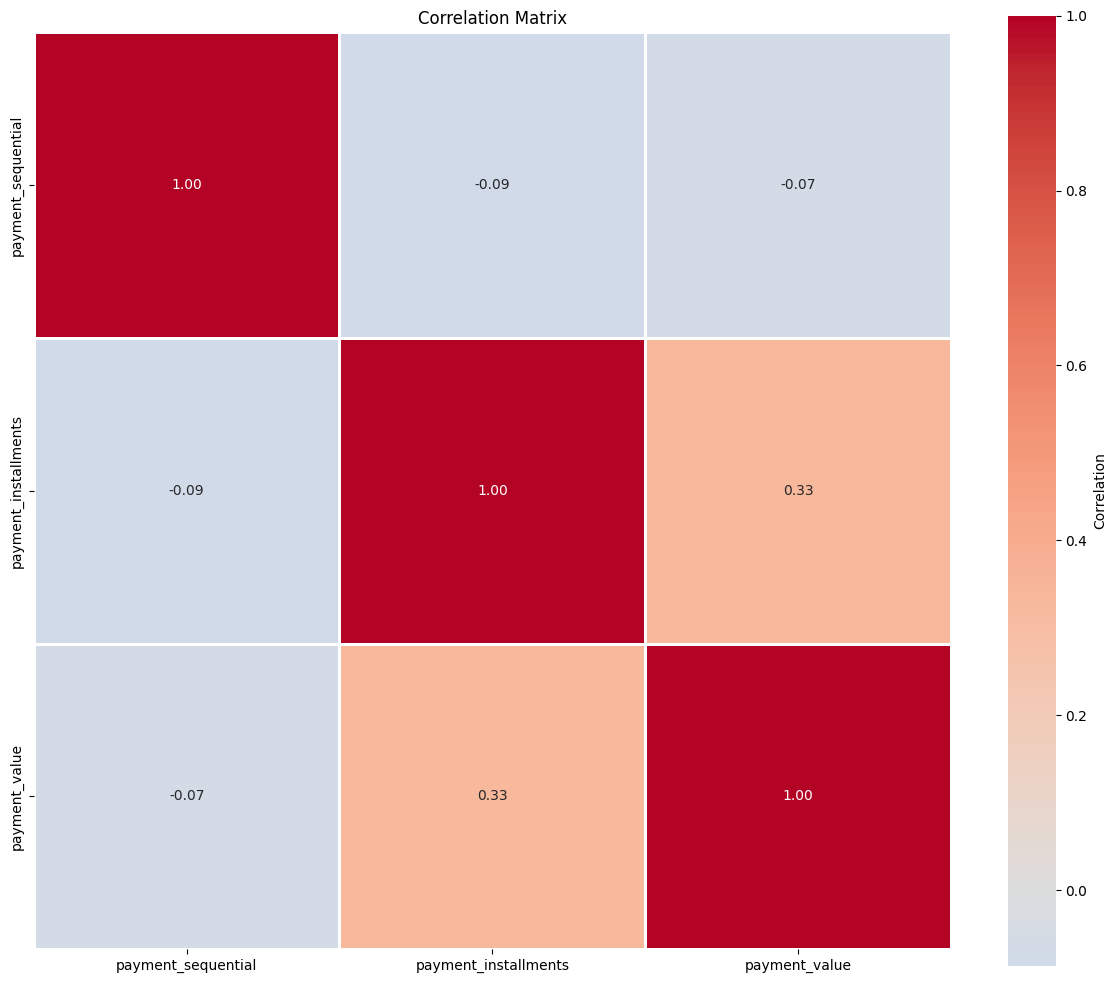


✓ EDA REPORT COMPLETED


In [30]:
# order_payments EDA
order_payments_eda = EDA_Pipeline(data['order_payments'])
order_payments_eda.generate_report()

## Orders Payments Table Summary

### Column Data Types
| Column       | Cast to Type |
|--------------|--------------|
| order_id     | string       |
| payment_type | category     |

### Key Insights
- The `order_payments` table contains information about payment methods used for each order.
- The most common payment method is `credit_card`, followed by `boleto` (bank slip).
- The table includes details about payment installments and payment values, which can be used to analyze customer payment preferences and trends.
- No missing values or duplicates were found in this table.

## Order Reviews

In [32]:
data['order_reviews'].head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

In [33]:
data['order_reviews'].dtypes

review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object

In [34]:
# Change Data Types to Appropriate Types

# Define type mappings for order_reviews table
order_reviews_type_mapping = {
    'review_id': 'string',
    'order_id': 'string',
    'review_score': 'Int64',
    'review_comment_title': 'string',
    'review_comment_message': 'string',
    'review_creation_date': 'datetime',
    'review_answer_timestamp': 'datetime'
}

# Apply type mappings
cast_data_types(data['order_reviews'], order_reviews_type_mapping)

Data Types Before:
review_id: object
order_id: object
review_score: int64
review_comment_title: object
review_comment_message: object
review_creation_date: object
review_answer_timestamp: object

Data Types After:
review_id: string
order_id: string
review_score: Int64
review_comment_title: string
review_comment_message: string
review_creation_date: datetime64[ns]
review_answer_timestamp: datetime64[ns]


⚠️  'review_id' is high cardinality (unique values: 98410) - will show top 5 only
⚠️  'order_id' is high cardinality (unique values: 98673) - will show top 5 only
⚠️  'review_comment_title' is high cardinality (unique values: 4527) - will show top 5 only
⚠️  'review_comment_message' is high cardinality (unique values: 36159) - will show top 5 only

✓ Detected 1 numerical columns
✓ Detected 0 categorical columns (≤100 unique)
✓ Detected 2 datetime columns
✓ Detected 4 high-cardinality columns (>100 unique)

--- Column Type Breakdown ---
Numerical: ['review_score']
Datetime: ['review_creation_date', 'review_answer_timestamp']
High Cardinality: ['review_id', 'order_id', 'review_comment_title', 'review_comment_message']

     AUTOMATED EDA REPORT

DATA OVERVIEW

Dataset Shape: 99,224 rows × 7 columns
Memory Usage: 34.42 MB

--- Data Types ---
string[python]    4
datetime64[ns]    2
Int64             1
Name: count, dtype: int64

--- Missing Values ---
                        Missing  Percen

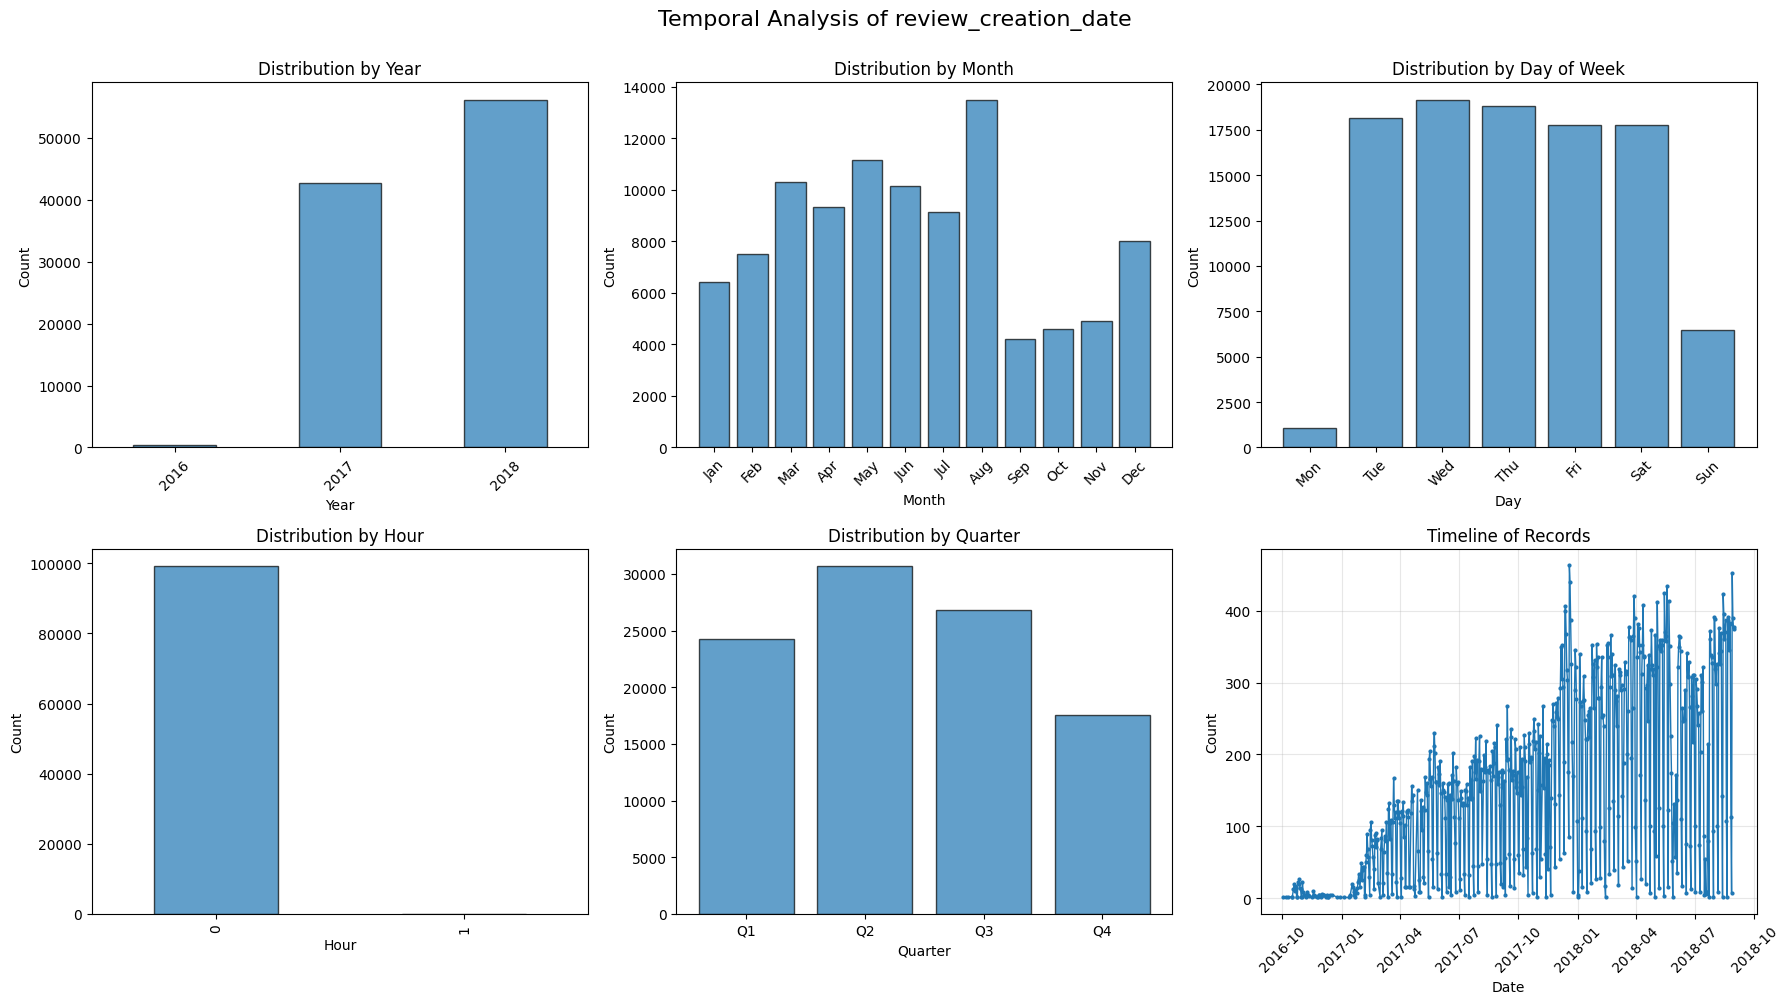


--- Temporal Component Statistics ---
Most common year: 2018
Most common month: 8
Most common day of week: Wed
Most common hour: 0:00

--- REVIEW_ANSWER_TIMESTAMP ---
Earliest date: 2016-10-07 18:32:28
Latest date: 2018-10-29 12:27:35
Date range: 751 days
Missing values: 0 (0.00%)


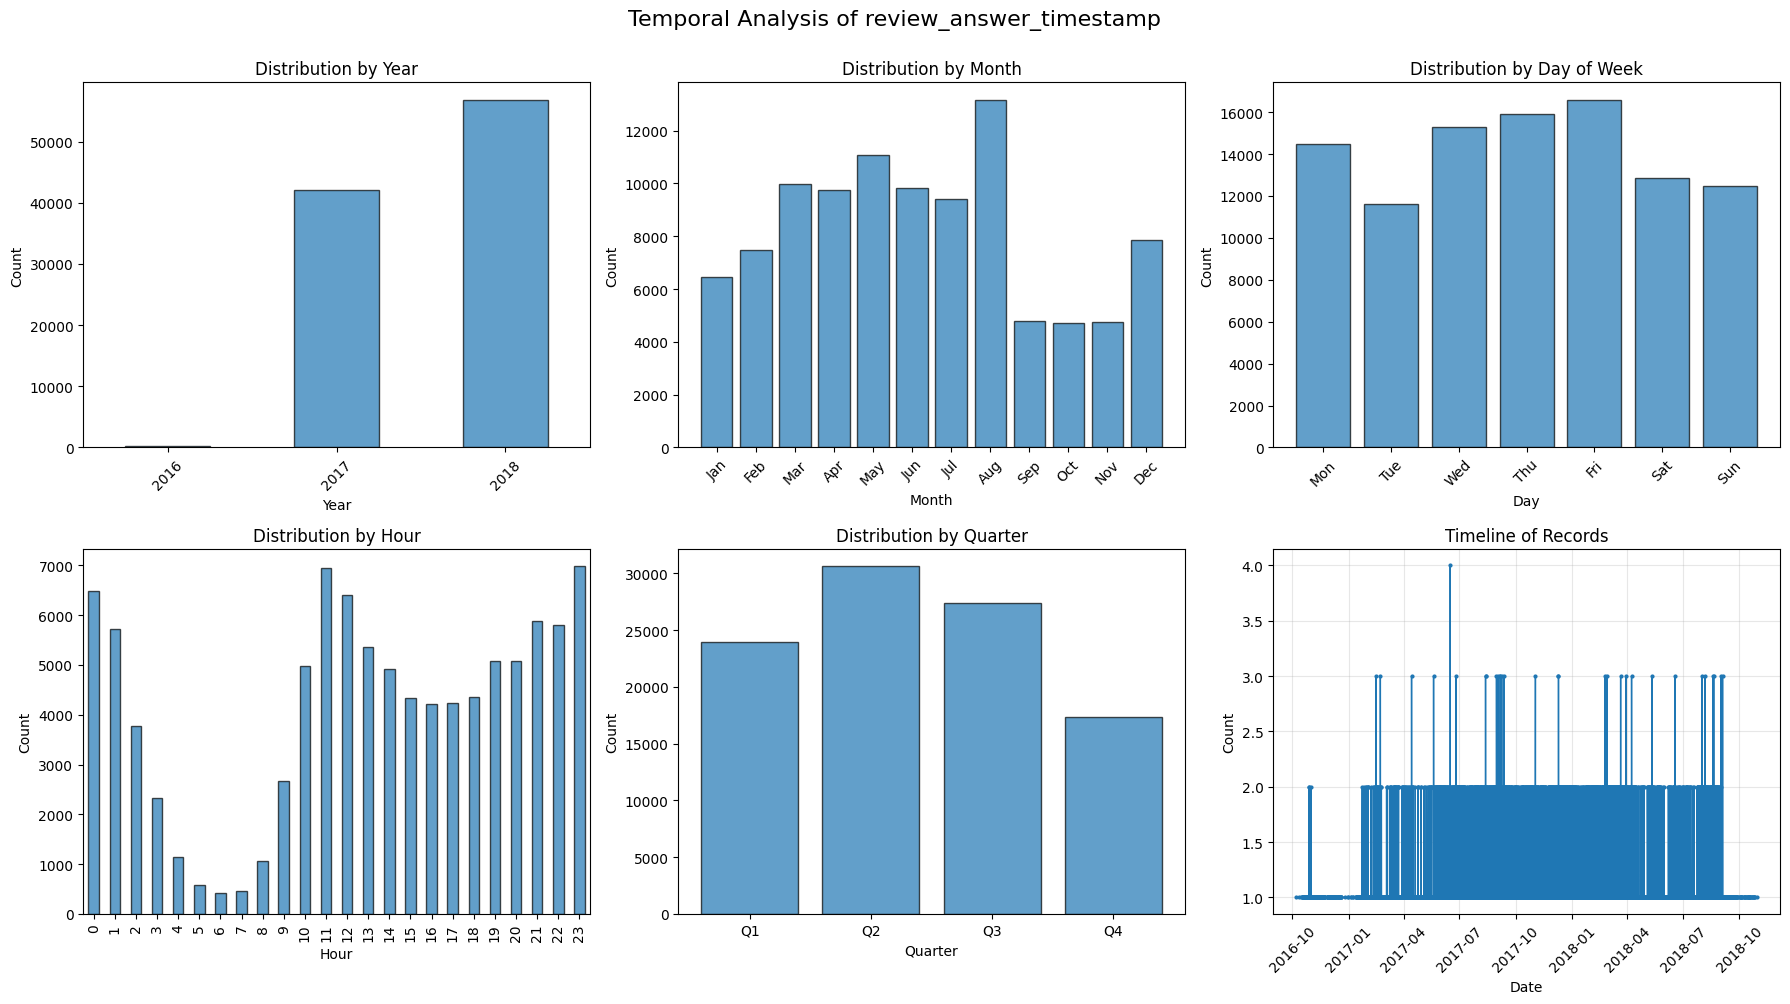


--- Temporal Component Statistics ---
Most common year: 2018
Most common month: 8
Most common day of week: Fri
Most common hour: 23:00

UNIVARIATE ANALYSIS - NUMERICAL FEATURES

--- REVIEW_SCORE ---
count     99224.0
mean     4.086421
std      1.347579
min           1.0
25%           4.0
50%           5.0
75%           5.0
max           5.0
Name: review_score, dtype: Float64
Skewness: -1.364
Kurtosis: 0.508
Outliers: 14575 (14.69%)


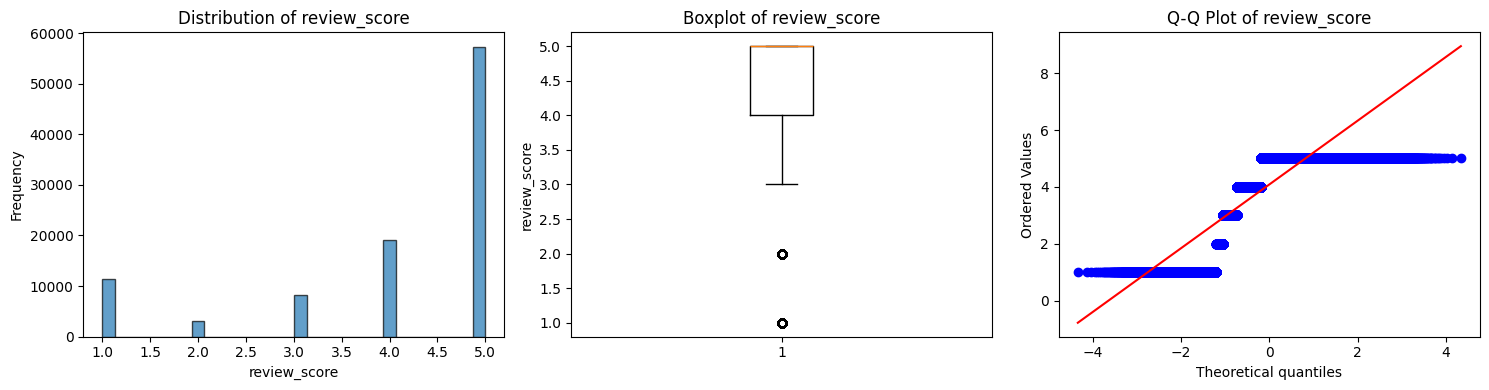


UNIVARIATE ANALYSIS - CATEGORICAL FEATURES (LOW CARDINALITY)

UNIVARIATE ANALYSIS - HIGH CARDINALITY COLUMNS (TOP 5 ONLY)

--- REVIEW_ID ---
Data type: string
Unique values: 98,410
Total records: 99,224
Cardinality ratio: 99.18%

📊 Top 5 most frequent values:
  1. 7b606b0d57b078384f0b58eac1d41d78: 3 (0.00%)
  2. dbdf1ea31790c8ecfcc6750525661a9b: 3 (0.00%)
  3. 32415bbf6e341d5d517080a796f79b5c: 3 (0.00%)
  4. 0c76e7a547a531e7bf9f0b99cba071c1: 3 (0.00%)
  5. 4219a80ab469e3fc9901437b73da3f75: 3 (0.00%)


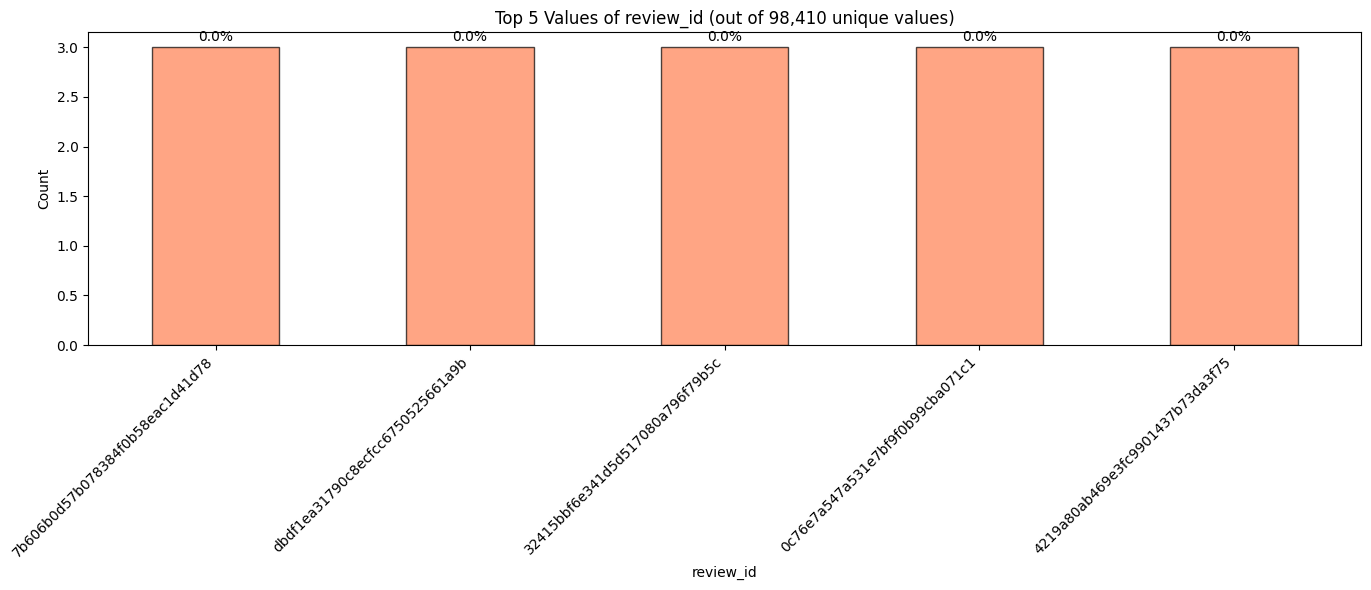


--- ORDER_ID ---
Data type: string
Unique values: 98,673
Total records: 99,224
Cardinality ratio: 99.44%

📊 Top 5 most frequent values:
  1. c88b1d1b157a9999ce368f218a407141: 3 (0.00%)
  2. 8e17072ec97ce29f0e1f111e598b0c85: 3 (0.00%)
  3. df56136b8031ecd28e200bb18e6ddb2e: 3 (0.00%)
  4. 03c939fd7fd3b38f8485a0f95798f1f6: 3 (0.00%)
  5. 5cb890a68b91b6158d69257e4e2bc359: 2 (0.00%)


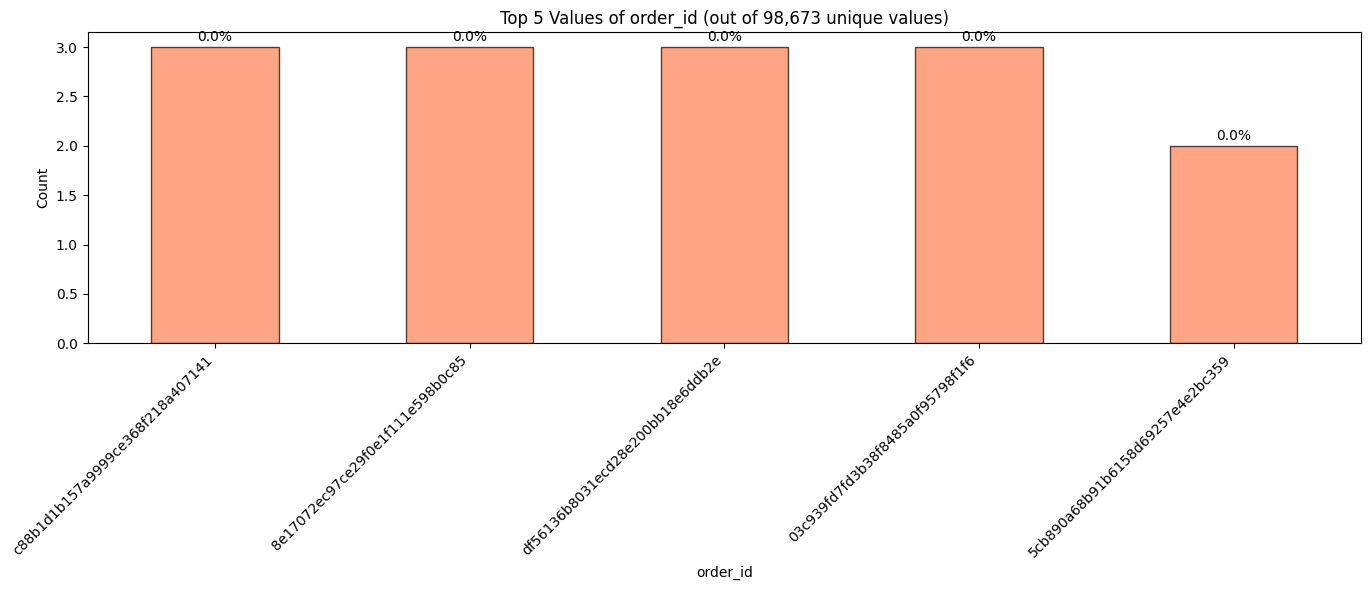


--- REVIEW_COMMENT_TITLE ---
Data type: string
Unique values: 4,527
Total records: 99,224
Cardinality ratio: 4.56%

📊 Top 5 most frequent values:
  1. Recomendo: 423 (0.43%)
  2. recomendo: 345 (0.35%)
  3. Bom: 293 (0.30%)
  4. super recomendo: 270 (0.27%)
  5. Excelente: 248 (0.25%)


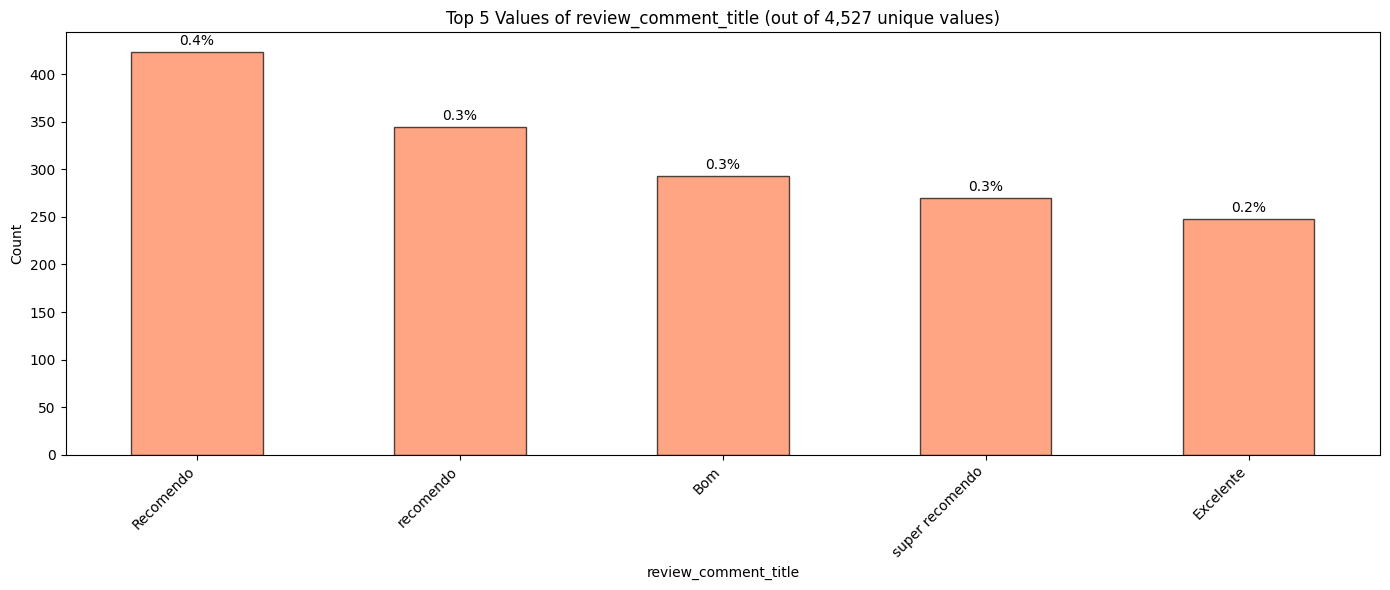


--- REVIEW_COMMENT_MESSAGE ---
Data type: string
Unique values: 36,159
Total records: 99,224
Cardinality ratio: 36.44%

📊 Top 5 most frequent values:
  1. Muito bom: 230 (0.23%)
  2. Bom: 189 (0.19%)
  3. muito bom: 122 (0.12%)
  4. bom: 107 (0.11%)
  5. Recomendo: 100 (0.10%)


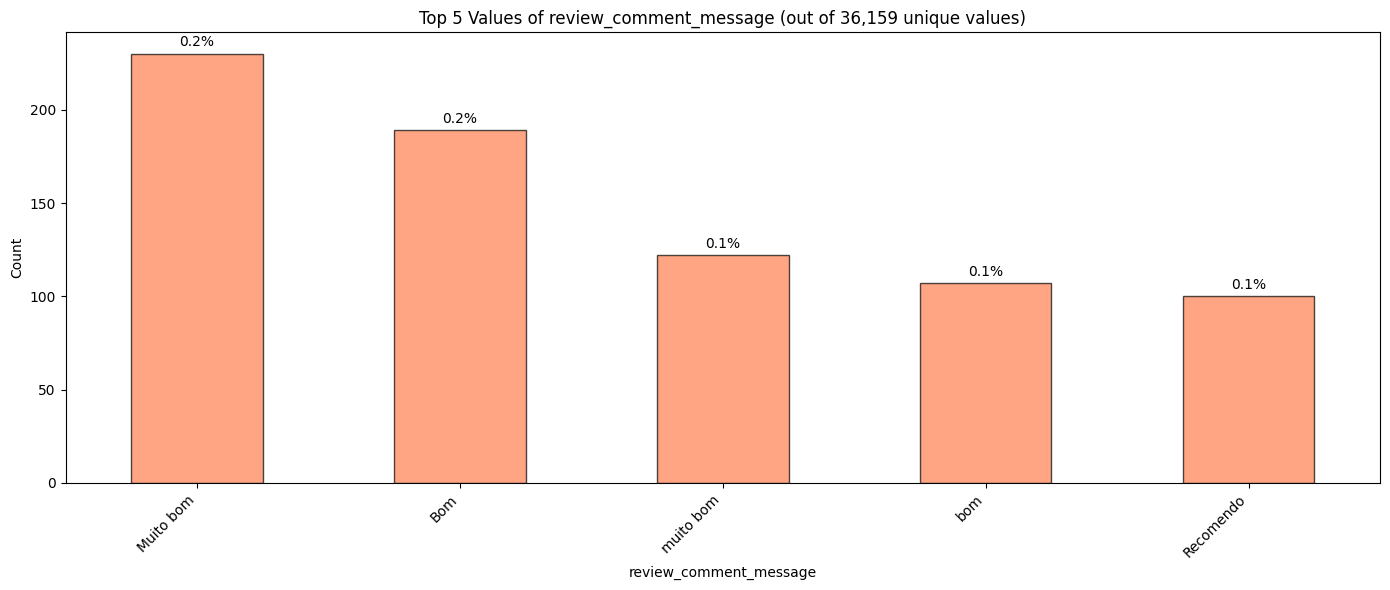


⚠ Not enough numerical columns for correlation matrix

✓ EDA REPORT COMPLETED


In [35]:
# order_reviews EDA
order_reviews_eda = EDA_Pipeline(data['order_reviews'])
order_reviews_eda.generate_report()

In [36]:
data['order_reviews'].head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                 <NA>   
1             5                 <NA>   
2             5                 <NA>   
3             5                 <NA>   
4             5                 <NA>   

                              review_comment_message review_creation_date  \
0                                               <NA>           2018-01-18   
1                                               <NA>           2018-03-10   
2                                               <NA>           2018-02-17   
3              Recebi bem antes do prazo estipulado.           2017-04-21   
4  Parabéns lojas lannister adorei comprar pela I...           2018-03-01   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

In [37]:
# Make new column review_creation_year_month from review_creation_date
data['order_reviews']['review_creation_year_month'] = data['order_reviews']['review_creation_date'].dt.to_period('M')

# Add date to review_creation_year_month column (1st day of the month) for plotting purposes
data['order_reviews']['review_creation_year_month'] = data['order_reviews']['review_creation_year_month'].dt.to_timestamp()
data['order_reviews'].head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                 <NA>   
1             5                 <NA>   
2             5                 <NA>   
3             5                 <NA>   
4             5                 <NA>   

                              review_comment_message review_creation_date  \
0                                               <NA>           2018-01-18   
1                                               <NA>           2018-03-10   
2                                               <NA>           2018-02-17   
3              Recebi bem antes do prazo estipulado.           2017-04-21   
4  Parabéns lojas lannister adorei comprar pela I...           2018-03-01   

  review_answer_timestamp review_creation_year_month  
0     2018-01-18 21:46:59                 2018-01-01  
1     2018-03-11 03:05:13                 2018-03-01  
2     2018-02-18 14:36:24                 2018-02-01  
3     2017-04-21 22:02:06                 2017-04-01  
4     2018-03-02 10:26:53                 2018-03-01

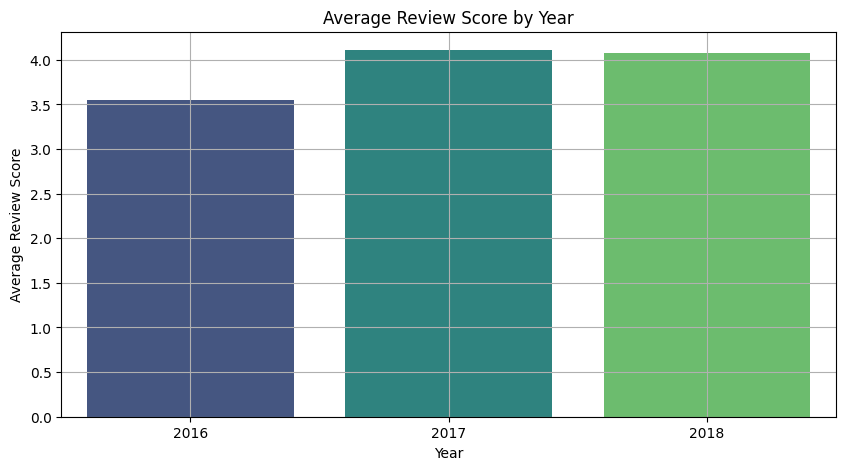

In [40]:
# Annual rating trend visualization
data['order_reviews']['review_year'] = data['order_reviews']['review_creation_year_month'].dt.year
annual_rating_trend = data['order_reviews'].groupby('review_year')['review_score'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(data=annual_rating_trend, x='review_year', y='review_score', palette='viridis')
plt.title('Average Review Score by Year')
plt.xlabel('Year')
plt.ylabel('Average Review Score')
plt.grid()
plt.show()

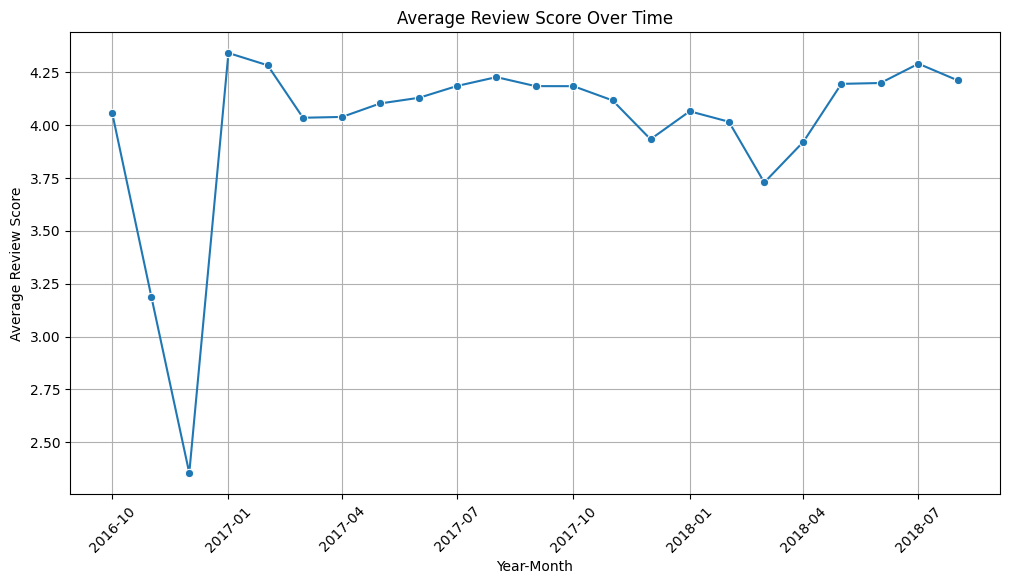

In [39]:
# Make visualization for detailed overall review score trend over time
order_reviews = data['order_reviews']
rating_trend = order_reviews.groupby('review_creation_year_month')['review_score'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=rating_trend, x='review_creation_year_month', y='review_score', marker='o')
plt.title('Average Review Score Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Average Review Score')
plt.xticks(rotation=45)
plt.grid()
plt.show()

Text(0, 0.5, 'Average Review Score')

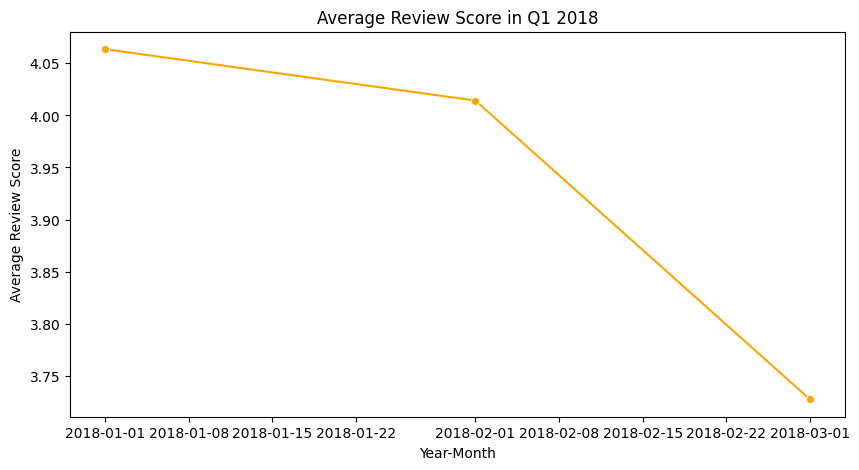

In [41]:
# Make visualization for review score trend on q1 2018 to confirm that it's been declining overtime
order_reviews_q1_2018 = order_reviews[
    (order_reviews['review_creation_year_month'] >= '2018-01-01') & 
    (order_reviews['review_creation_year_month'] <= '2018-03-01')
]
rating_trend_q1_2018 = order_reviews_q1_2018.groupby('review_creation_year_month')['review_score'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data=rating_trend_q1_2018, x='review_creation_year_month', y='review_score', marker='o', color='orange')
plt.title('Average Review Score in Q1 2018')
plt.xlabel('Year-Month')
plt.ylabel('Average Review Score')

## Order Reviews Table Summary 

### Column Data Types
| Column | Cast to Type |
|------|----------|
| review_id | string |
| order_id | string|
| review_comment_title | string |
| review_comment_message | string|
| review_creation_date | datetime |
| review_answer_timestamp | datetime |

### Key Insight:
- The overall average review score is approximately 4.08.
- There is a noticeable decline in review scores during Q1 2018, with scores dropping from 4.1 in January to under 3.75 in March.

## Products

In [42]:
data['products'].head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

In [43]:
data['products'].dtypes

product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

I see an integer value in product_name_lenght, product_description_lenght, product_photos_qty so i will check if there's a decimal number, if there isn't i will change it to integer type

In [44]:
# Check if there's a decimal number in float column
data['products'][data['products']["product_photos_qty"] % 1 != 0].any()

product_id                     True
product_category_name         False
product_name_lenght           False
product_description_lenght    False
product_photos_qty            False
product_weight_g               True
product_length_cm              True
product_height_cm              True
product_width_cm               True
dtype: bool

Above we see that there's no decimal number in product_name_lenght, product_description_lenght, product_photos_qty columns, so i will cast it to Int64 rather than int cause there's a null values within those columns

In [45]:
# Change Data Types to Appropriate Types

# Define type mappings for products table
products_type_mapping = {
    'product_id': 'string',
    'product_category_name': 'category',
    'product_name_lenght': 'Int64',
    'product_description_lenght': 'Int64',
    'product_photos_qty': 'Int64'
}

# Apply type mappings
cast_data_types(data['products'], products_type_mapping)

Data Types Before:
product_id: object
product_category_name: object
product_name_lenght: float64
product_description_lenght: float64
product_photos_qty: float64
product_weight_g: float64
product_length_cm: float64
product_height_cm: float64
product_width_cm: float64

Data Types After:
product_id: string
product_category_name: category
product_name_lenght: Int64
product_description_lenght: Int64
product_photos_qty: Int64
product_weight_g: float64
product_length_cm: float64
product_height_cm: float64
product_width_cm: float64


⚠️  'product_id' is high cardinality (unique values: 32951) - will show top 5 only
✓ 'product_category_name' added to categorical (unique values: 73)

✓ Detected 7 numerical columns
✓ Detected 1 categorical columns (≤100 unique)
✓ Detected 0 datetime columns
✓ Detected 1 high-cardinality columns (>100 unique)

--- Column Type Breakdown ---
Categorical: ['product_category_name']
Numerical: ['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
High Cardinality: ['product_id']

     AUTOMATED EDA REPORT

DATA OVERVIEW

Dataset Shape: 32,951 rows × 9 columns
Memory Usage: 4.69 MB

--- Data Types ---
float64           4
Int64             3
string[python]    1
category          1
Name: count, dtype: int64

--- Missing Values ---
                            Missing  Percentage
product_category_name           610        1.85
product_name_lenght             610        1.85
product_description

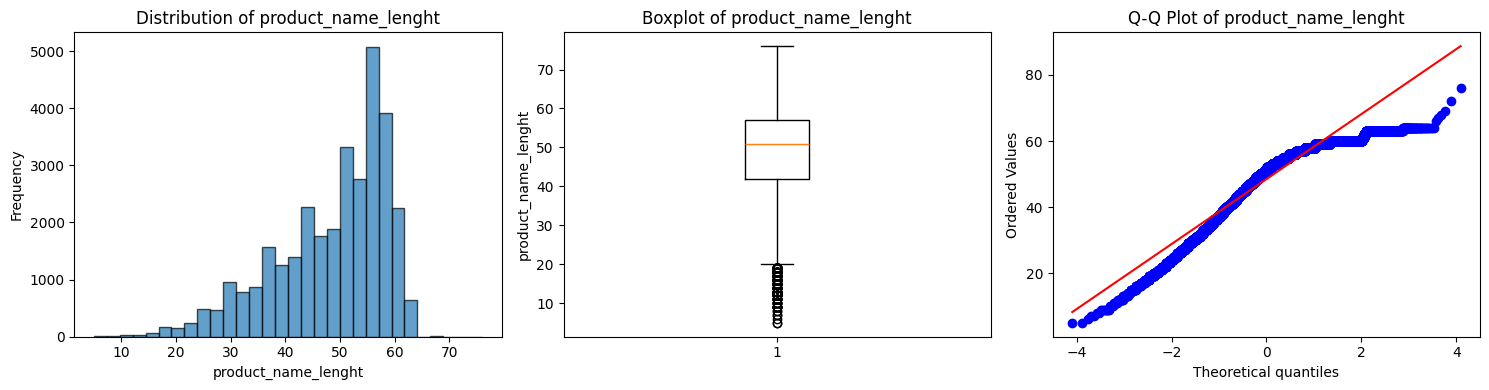


--- PRODUCT_DESCRIPTION_LENGHT ---
count       32341.0
mean     771.495285
std      635.115225
min             4.0
25%           339.0
50%           595.0
75%           972.0
max          3992.0
Name: product_description_lenght, dtype: Float64
Skewness: 1.962
Kurtosis: 4.829
Outliers: 2078 (6.31%)


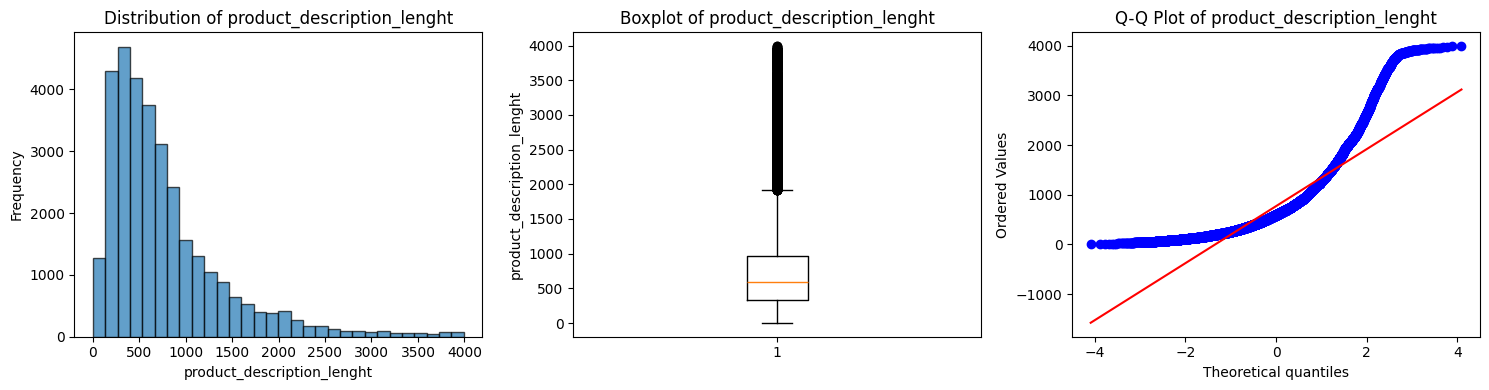


--- PRODUCT_PHOTOS_QTY ---
count     32341.0
mean     2.188986
std      1.736766
min           1.0
25%           1.0
50%           1.0
75%           3.0
max          20.0
Name: product_photos_qty, dtype: Float64
Skewness: 2.193
Kurtosis: 7.264
Outliers: 849 (2.58%)


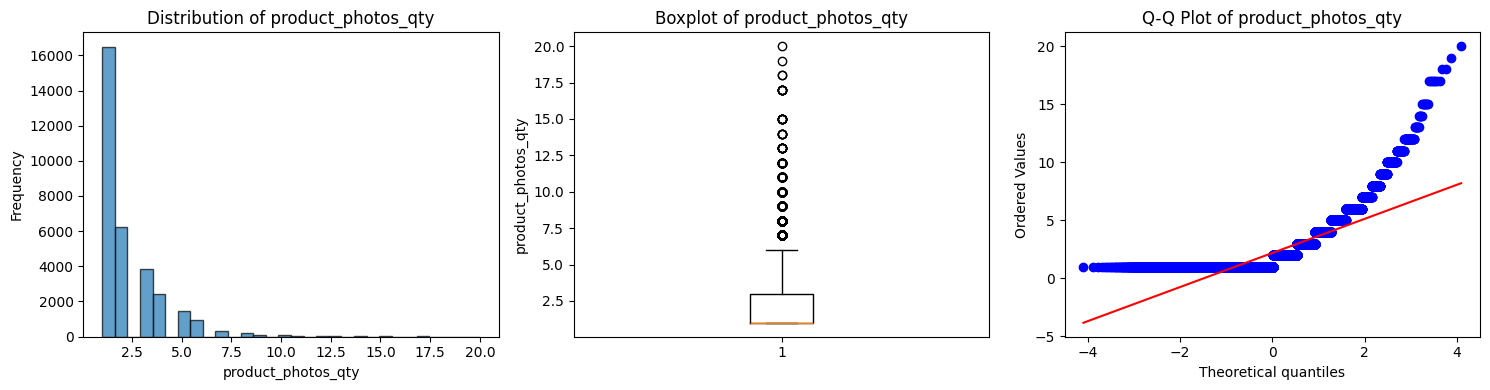


--- PRODUCT_WEIGHT_G ---
count    32949.000000
mean      2276.472488
std       4282.038731
min          0.000000
25%        300.000000
50%        700.000000
75%       1900.000000
max      40425.000000
Name: product_weight_g, dtype: float64
Skewness: 3.605
Kurtosis: 15.134
Outliers: 4551 (13.81%)


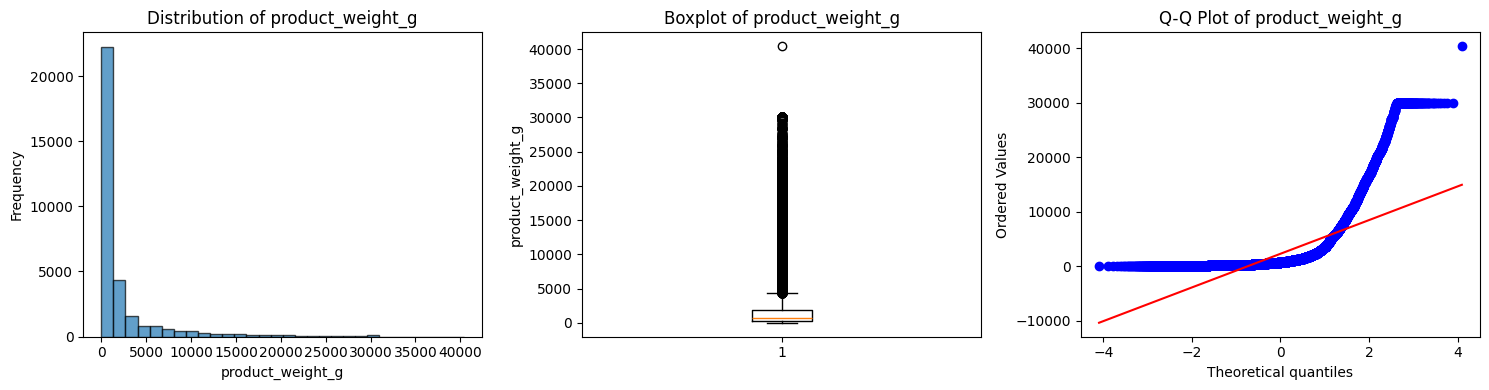


--- PRODUCT_LENGTH_CM ---
count    32949.000000
mean        30.815078
std         16.914458
min          7.000000
25%         18.000000
50%         25.000000
75%         38.000000
max        105.000000
Name: product_length_cm, dtype: float64
Skewness: 1.750
Kurtosis: 3.514
Outliers: 1380 (4.19%)


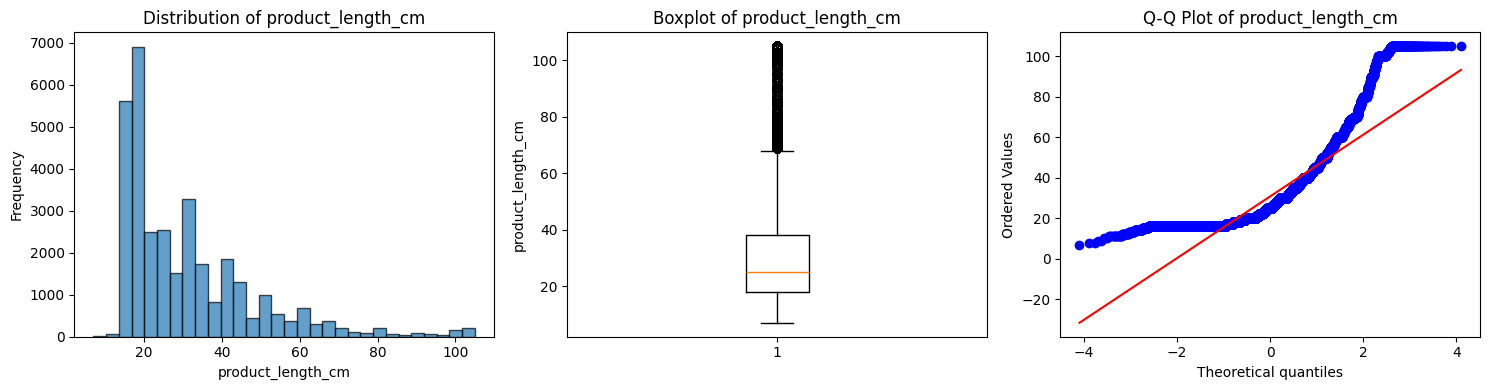


--- PRODUCT_HEIGHT_CM ---
count    32949.000000
mean        16.937661
std         13.637554
min          2.000000
25%          8.000000
50%         13.000000
75%         21.000000
max        105.000000
Name: product_height_cm, dtype: float64
Skewness: 2.140
Kurtosis: 6.679
Outliers: 1892 (5.74%)


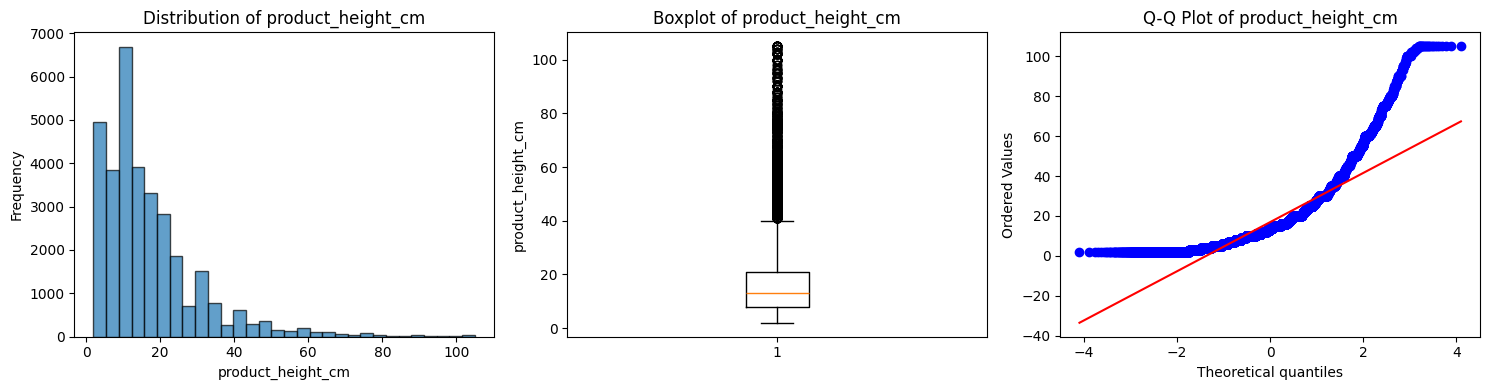


--- PRODUCT_WIDTH_CM ---
count    32949.000000
mean        23.196728
std         12.079047
min          6.000000
25%         15.000000
50%         20.000000
75%         30.000000
max        118.000000
Name: product_width_cm, dtype: float64
Skewness: 1.671
Kurtosis: 4.073
Outliers: 912 (2.77%)


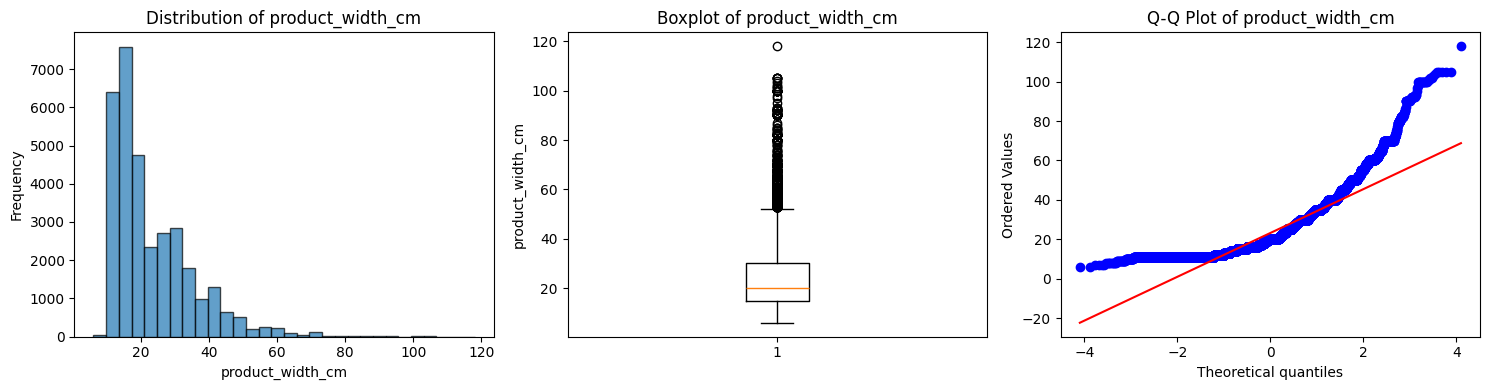


UNIVARIATE ANALYSIS - CATEGORICAL FEATURES (LOW CARDINALITY)

--- PRODUCT_CATEGORY_NAME ---
Data type: category
Unique values: 73

Value counts (all 73 categories):
product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
casa_conforto_2                     5
fashion_roupa_infanto_juvenil       5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: count, Length: 73, dtype: int64

Percentage distribution:
product_category_name
cama_mesa_banho                  9.19
esporte_lazer                    8.70
moveis_decoracao                 8.06
beleza_saude                     7.42
utilidades_domesticas            7.09
                                 ... 
casa_conforto_2                  0.02
fashion_roupa_infanto_juvenil    0.02
pc_g

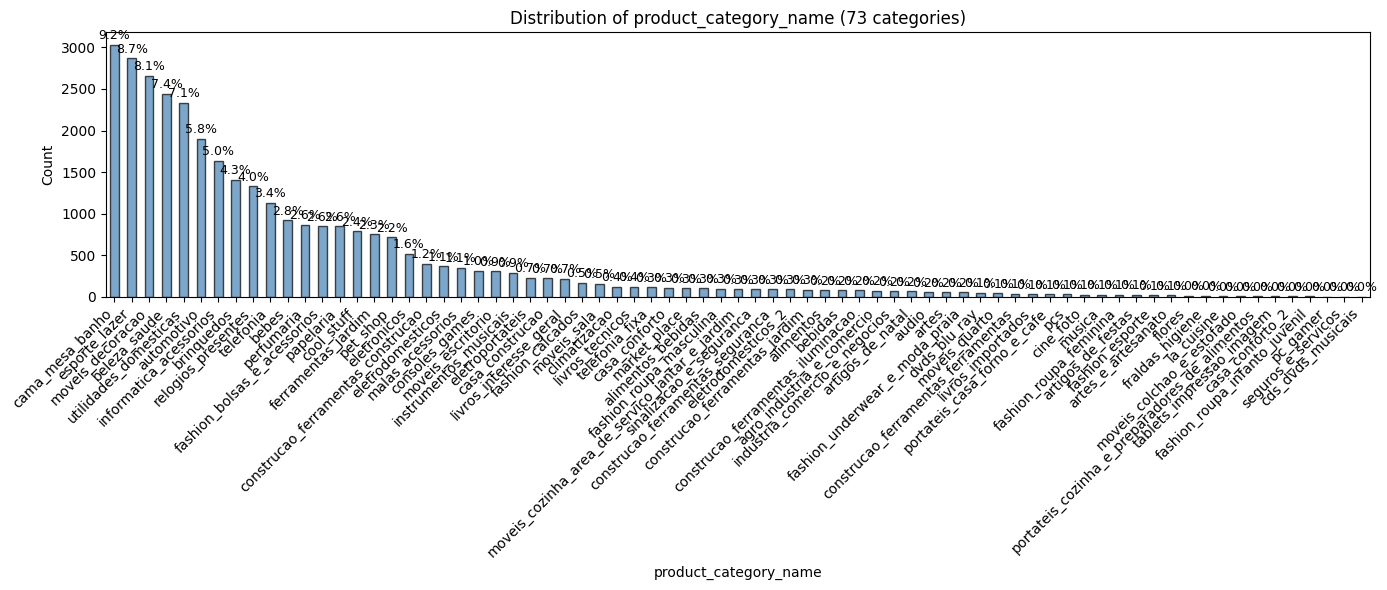


UNIVARIATE ANALYSIS - HIGH CARDINALITY COLUMNS (TOP 5 ONLY)

--- PRODUCT_ID ---
Data type: string
Unique values: 32,951
Total records: 32,951
Cardinality ratio: 100.00%

📊 Top 5 most frequent values:
  1. 1e9e8ef04dbcff4541ed26657ea517e5: 1 (0.00%)
  2. d05cc9afc85771f597cf4bc9d8f12546: 1 (0.00%)
  3. 71b7afd92c42feab780d5ea512fc7348: 1 (0.00%)
  4. 5c5f3e091101bea69642eb3dd145b17d: 1 (0.00%)
  5. 16d47089f9bc7f16de16cc4bd3b9dd49: 1 (0.00%)


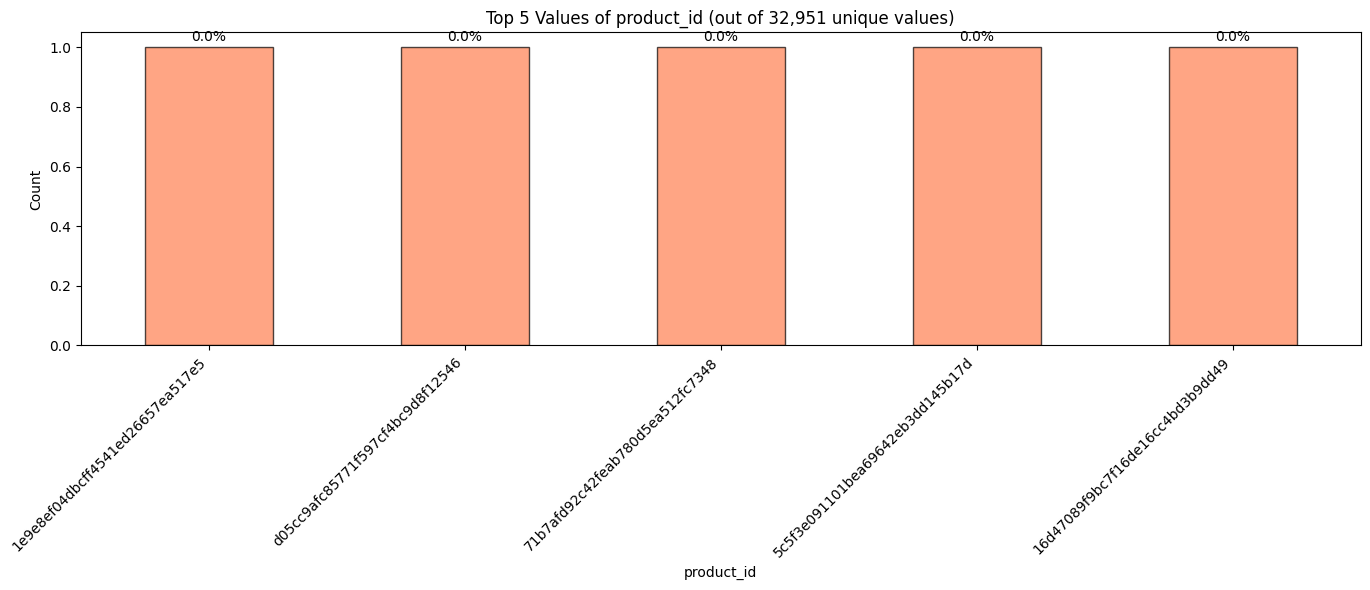


CORRELATION MATRIX


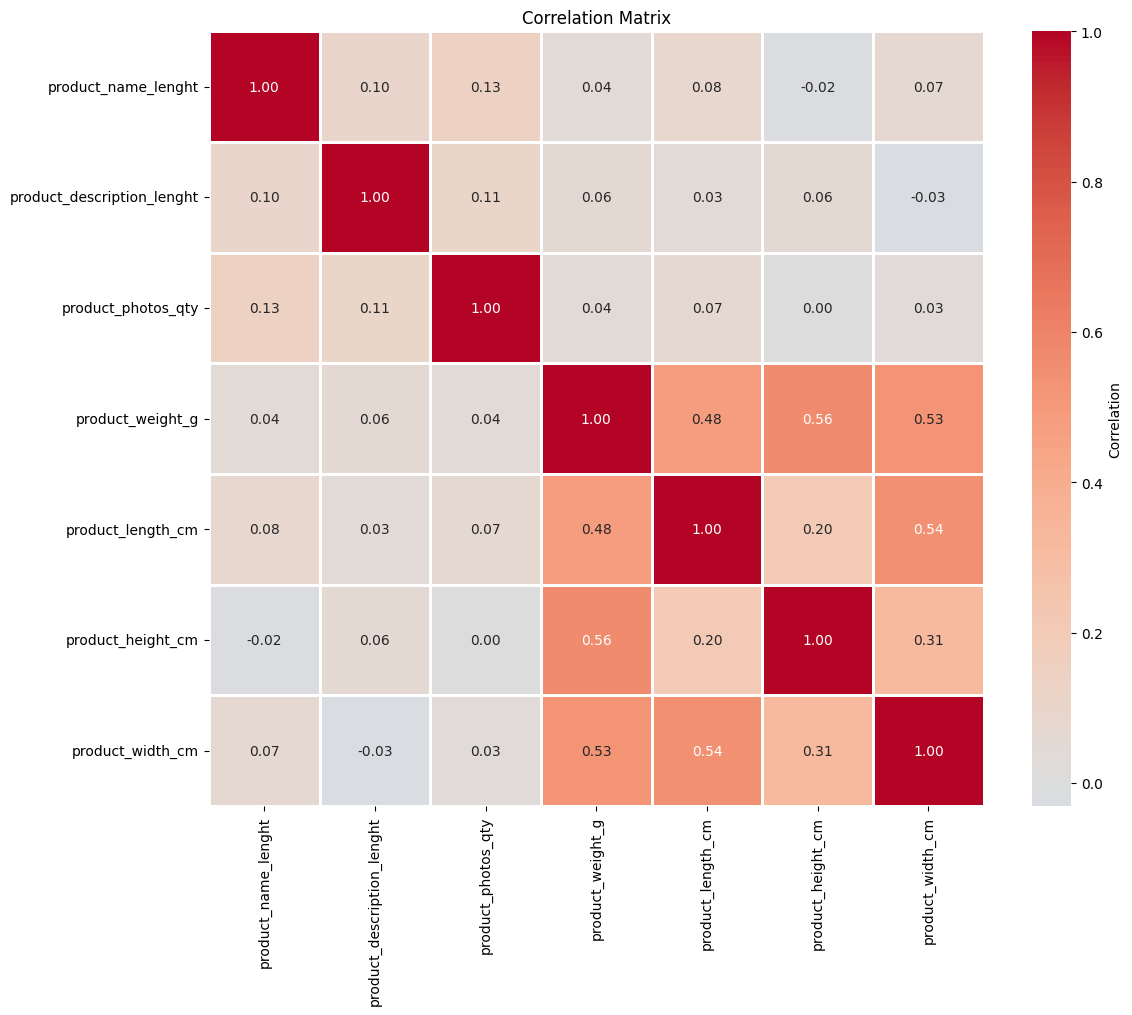


✓ EDA REPORT COMPLETED


In [46]:
# products EDA
products_eda = EDA_Pipeline(data['products'])
products_eda.generate_report()

## Products Table Summary

### Column Data Types
| Column | Cast to Type |
|------|----------|
| product_id | string |
| product_category_name | categorical |
| product_name_lenght | Int64 |
| product_description_lenght | Int64 |
| product_photos_qty | Int64 |

### Key Insights
1. The distribution of product categories shows that certain categories are more popular among customers.
2. Products with missing or incomplete information (e.g., null values in `product_name_lenght` or `product_description_lenght`) may indicate data quality issues.


## Sellers

In [48]:
data['sellers'].head()

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

In [49]:
data['sellers'].dtypes

seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object

In [50]:
# Fix Data Types to Appropriate Types

# Define type mappings for sellers table
sellers_type_mapping = {
    'seller_id': 'string',
    'seller_city': 'string',
    'seller_state': 'category'
}

# Apply type mappings
cast_data_types(data['sellers'], sellers_type_mapping)

Data Types Before:
seller_id: object
seller_zip_code_prefix: int64
seller_city: object
seller_state: object

Data Types After:
seller_id: string
seller_zip_code_prefix: int64
seller_city: string
seller_state: category


In [51]:
data['sellers'].dtypes

seller_id                 string[python]
seller_zip_code_prefix             int64
seller_city               string[python]
seller_state                    category
dtype: object

⚠️  'seller_id' is high cardinality (unique values: 3095) - will show top 5 only
⚠️  'seller_city' is high cardinality (unique values: 611) - will show top 5 only
✓ 'seller_state' added to categorical (unique values: 23)

✓ Detected 1 numerical columns
✓ Detected 1 categorical columns (≤100 unique)
✓ Detected 0 datetime columns
✓ Detected 2 high-cardinality columns (>100 unique)

--- Column Type Breakdown ---
Categorical: ['seller_state']
Numerical: ['seller_zip_code_prefix']
High Cardinality: ['seller_id', 'seller_city']

     AUTOMATED EDA REPORT

DATA OVERVIEW

Dataset Shape: 3,095 rows × 4 columns
Memory Usage: 0.49 MB

--- Data Types ---
string[python]    2
int64             1
category          1
Name: count, dtype: int64

--- Missing Values ---
No missing values found!

--- Duplicates ---
Total duplicates: 0 (0.00%)

UNIVARIATE ANALYSIS - NUMERICAL FEATURES

--- SELLER_ZIP_CODE_PREFIX ---
count     3095.000000
mean     32291.059451
std      32713.453830
min       1001.000000
25% 

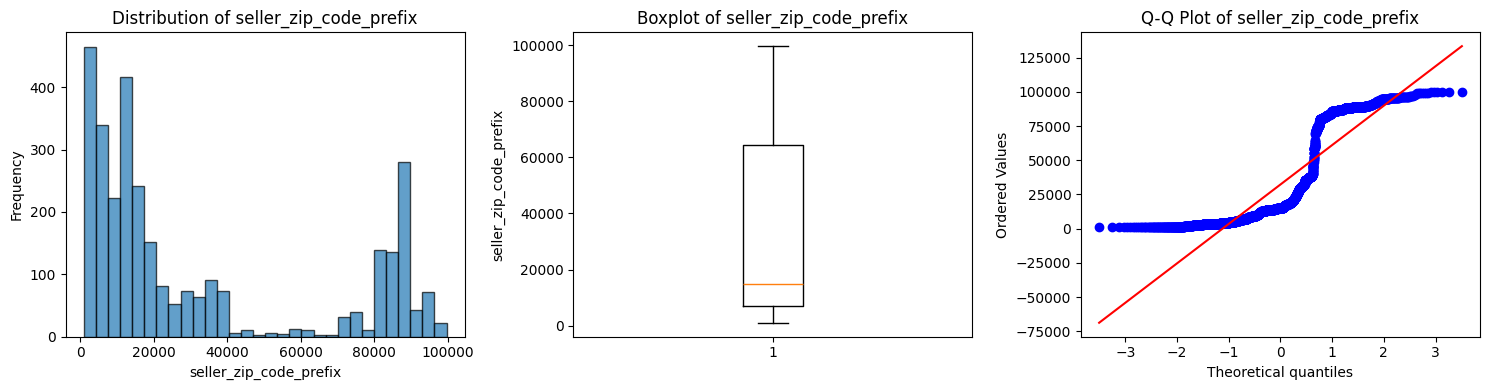


UNIVARIATE ANALYSIS - CATEGORICAL FEATURES (LOW CARDINALITY)

--- SELLER_STATE ---
Data type: category
Unique values: 23

Value counts (all 23 categories):
seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
AC       1
PI       1
AM       1
MA       1
PA       1
Name: count, dtype: int64

Percentage distribution:
seller_state
SP    59.74
PR    11.28
MG     7.88
SC     6.14
RJ     5.53
RS     4.17
GO     1.29
DF     0.97
ES     0.74
BA     0.61
CE     0.42
PE     0.29
PB     0.19
MS     0.16
RN     0.16
MT     0.13
RO     0.06
SE     0.06
AC     0.03
PI     0.03
AM     0.03
MA     0.03
PA     0.03
Name: count, dtype: float64


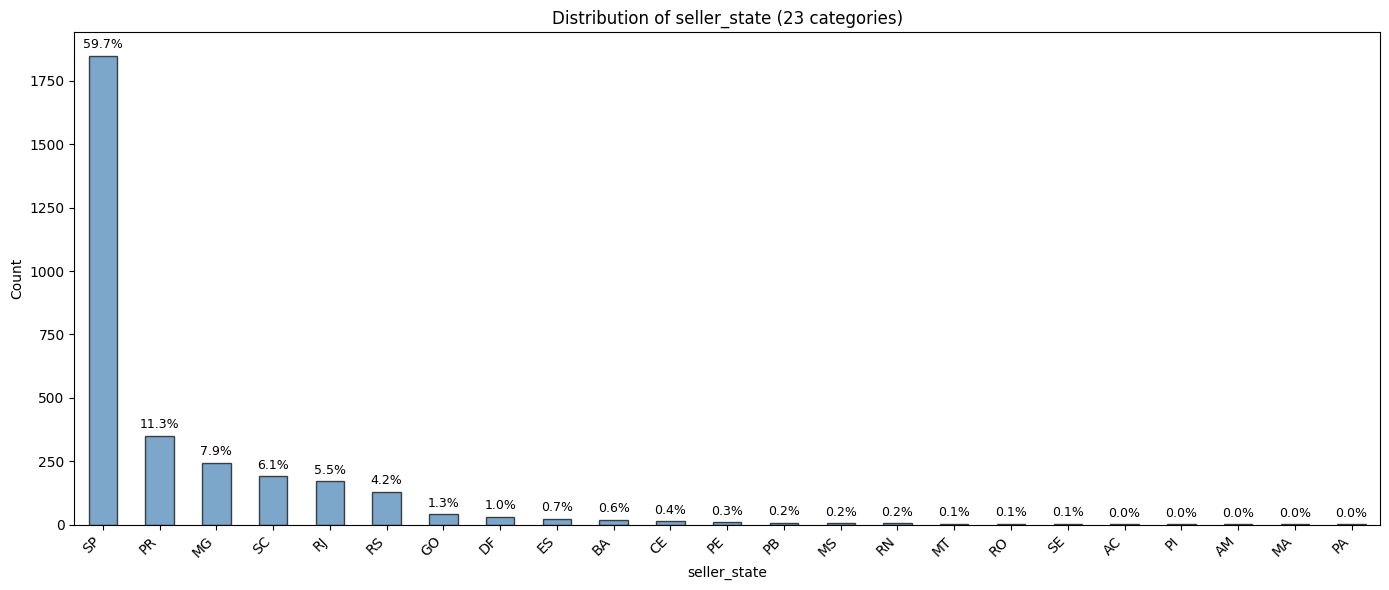


UNIVARIATE ANALYSIS - HIGH CARDINALITY COLUMNS (TOP 5 ONLY)

--- SELLER_ID ---
Data type: string
Unique values: 3,095
Total records: 3,095
Cardinality ratio: 100.00%

📊 Top 5 most frequent values:
  1. 3442f8959a84dea7ee197c632cb2df15: 1 (0.03%)
  2. e26901d5ab434ce92fd9b5c256820a4e: 1 (0.03%)
  3. 7e3f87d16fb353f408d467e74fbd8014: 1 (0.03%)
  4. 9140bd1d9de28b197dce077bdd687438: 1 (0.03%)
  5. a2b911e9ad40dc7d61c142a4683e2d85: 1 (0.03%)


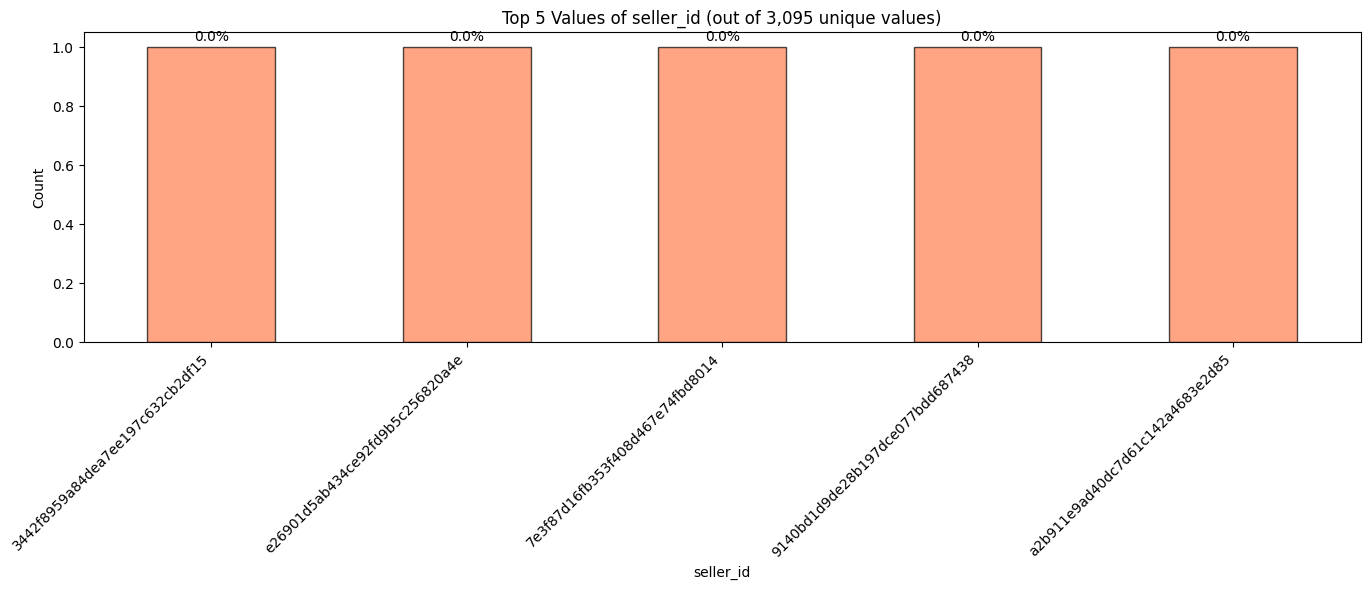


--- SELLER_CITY ---
Data type: string
Unique values: 611
Total records: 3,095
Cardinality ratio: 19.74%

📊 Top 5 most frequent values:
  1. sao paulo: 694 (22.42%)
  2. curitiba: 127 (4.10%)
  3. rio de janeiro: 96 (3.10%)
  4. belo horizonte: 68 (2.20%)
  5. ribeirao preto: 52 (1.68%)


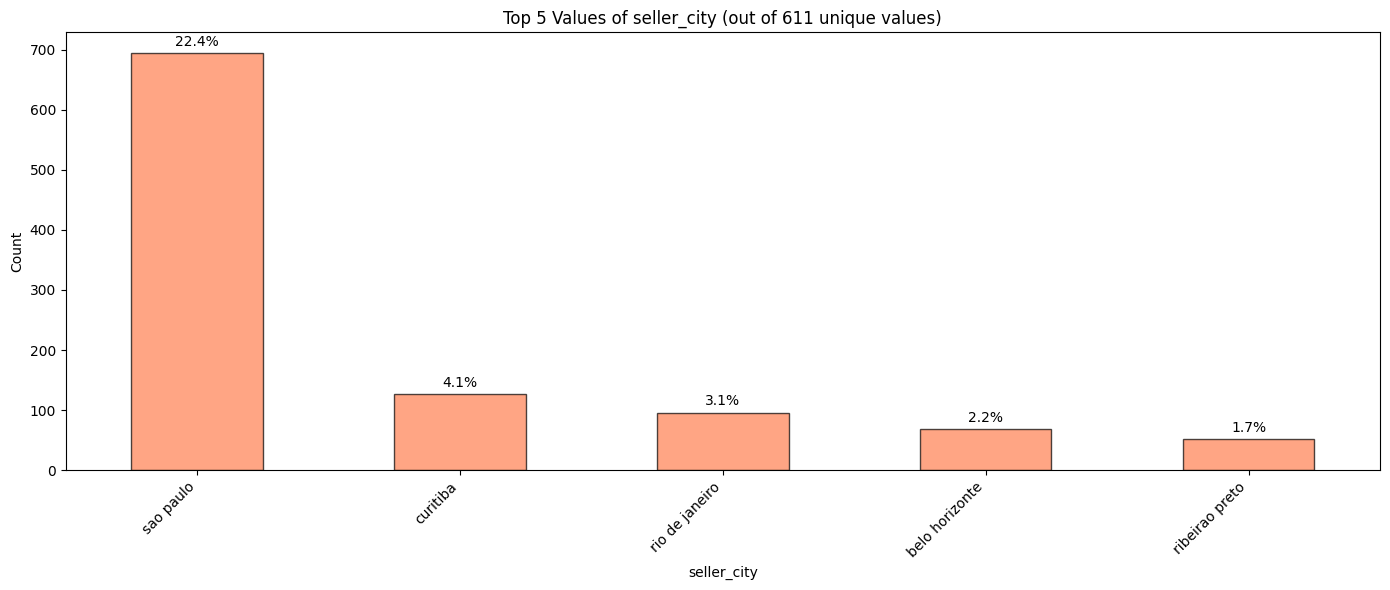


⚠ Not enough numerical columns for correlation matrix

✓ EDA REPORT COMPLETED


In [52]:
# sellers EDA
sellers_eda = EDA_Pipeline(data['sellers'])
sellers_eda.generate_report()

## Sellers Table Summary

### Column Data Types
| Column | Cast to Type |
|------|----------|
| seller_id| string |
| seller_city | string |
| seller_state | categorical |

### Key Insights

**Geographic Concentration:**
- **State Level:** São Paulo (SP) dominates with 1,849 sellers (59.74%), followed by Paraná (PR) with 349 sellers (11.28%) and Minas Gerais (MG) with 244 sellers (7.88%). This shows significant geographic concentration in Southeast Brazil, with just 3 states accounting for ~79% of all sellers.
- **City Level:** Among 611 unique seller cities, São Paulo city leads with 694 sellers (22.42%), followed distantly by Curitiba (4.10%), Rio de Janeiro (3.10%), Belo Horizonte (2.20%), and Ribeirão Preto (1.68%). The top 5 cities account for ~33.5% of total sellers.

**Seller Diversity:**
- The dataset contains **3,095 unique sellers** with **100% cardinality**, indicating each seller appears only once in the table. This suggests sellers are well-distributed without duplicates.
- With 611 unique cities across 23 states, sellers show moderate geographic diversity, though heavily concentrated in major metropolitan areas and Southeast region.

**Data Quality:**
- No missing values detected across all seller columns, indicating complete and reliable data for geographic analysis.

## Product Category Name Translation

In [53]:
data['product_category_name_translation'].head()

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

## Product Category Name Translation Table Summary

### Overview
Since the table only contain name translation, i will not use this table for this analysis

## Root cause analysis

After a short EDA, I will test my hypothesis that deliveries may have huge contribution to the decline in customer satisfaction in Q1 2018.

I will now check the correlation between review and deliveries. For this analysis i will use order reviews, orders table

In [55]:
# CSAT (Customer Satisfaction Score) Calculation  

## Review Score 4 and 5 consider as Satisfied
csat_data = data['order_reviews'].copy()
csat_data['satisfied'] = csat_data['review_score'].apply(lambda x: 1 if x >= 4 else 0)
csat_score = csat_data['satisfied'].mean() * 100
print(f"Customer Satisfaction Score (CSAT): {csat_score:.2f}%")

Customer Satisfaction Score (CSAT): 77.07%


In [56]:
# Join orders and order_reviews to see the relationship between order status and review score
orders_reviews = pd.merge(
    data['orders'],
    data['order_reviews'],
    on='order_id',
    how='inner'
)

In [57]:
# Filter to only delivered orders with review scores
orders_reviews = orders_reviews[
    (orders_reviews['order_status'] == 'delivered') &
    (orders_reviews['review_score'].notna())
]

In [58]:
# Calculate delivery delay in days
orders_reviews['delivery_delay_days'] = (
    orders_reviews['order_delivered_customer_date'] -
    orders_reviews['order_estimated_delivery_date']
).dt.days

In [59]:
# Create is_late column indicating whether the order was delivered late
orders_reviews['is_late'] = orders_reviews['delivery_delay_days'] > 0

In [61]:
orders_reviews.head(1)

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   

  order_estimated_delivery_date                         review_id  \
0                    2017-10-18  a54f0611adc9ed256b57ede6b6eb5114   

   review_score review_comment_title  \
0             4                 <NA>   

                              review_comment_message review_creation_date  \
0  Não testei o produto ainda, mas ele veio corre...           2017-10-11   

  review_answer_timestamp review_creation_year_month  review_year  \
0     2017-10-12 03:43:48                 2017-10-01         2017   

   delivery_delay_days  is_late  
0                 -8.0    False

In [62]:
# Make review_month column 
orders_reviews['review_month'] = (
    orders_reviews['review_creation_date']
    .dt.to_period('M')
    .astype(str)
)

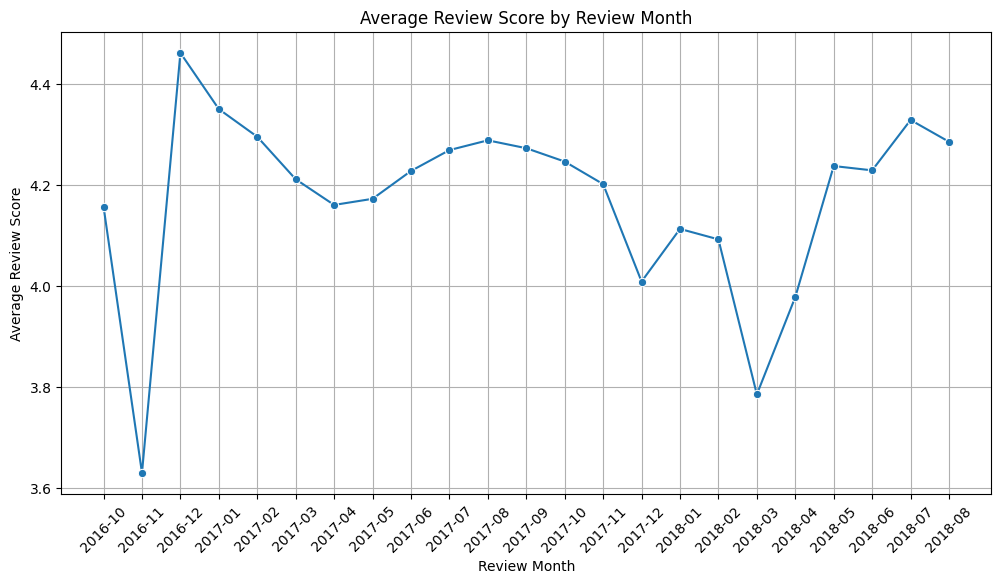

In [64]:
# Plot average review score by review_month
avg_review_score_by_month = orders_reviews.groupby('review_month')['review_score'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_review_score_by_month, x='review_month', y='review_score', marker='o')
plt.title('Average Review Score by Review Month')
plt.xlabel('Review Month')
plt.ylabel('Average Review Score')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [66]:
# Filter for review_month in 2018
avg_review_score_2018 = avg_review_score_by_month[
    avg_review_score_by_month['review_month'].str.startswith('2018')
]

# Calculate the average review score by review_month in 2018
avg_review_score_2018

review_month  review_score
15      2018-01       4.11289
16      2018-02       4.09217
17      2018-03      3.785074
18      2018-04      3.977918
19      2018-05       4.23745
20      2018-06      4.228877
21      2018-07      4.328646
22      2018-08      4.285518

Base on average review score numbers we see that Q1 2018 score start with 4.11289 then start decreasing to 3.785074 at the end of Q1

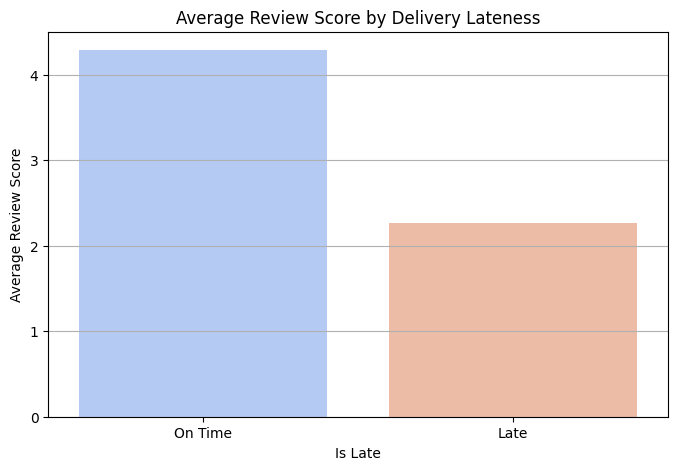

In [69]:
# Calculate average review score by is_late
avg_review_score_by_lateness = orders_reviews.groupby('is_late')['review_score'].mean().reset_index()

# Plot the results
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_review_score_by_lateness, x='is_late', y='review_score', palette='coolwarm')
plt.title('Average Review Score by Delivery Lateness')
plt.xlabel('Is Late')
plt.ylabel('Average Review Score')
plt.xticks([0, 1], ['On Time', 'Late'])
plt.grid(axis='y')
plt.show()

There's a 2 point review score gap between On time and Late deliveries. This indicates strong factor that affect customer satisfaction

In [70]:
# Create delay_bucket column to categorize delivery delays
orders_reviews['delay_bucket'] = pd.cut(
    orders_reviews['delivery_delay_days'],
    bins=[-999, 0, 3, 7, 999],
    labels=['On Time', '1–3 Days Late', '4–7 Days Late', '>7 Days Late']
)

orders_reviews.groupby('delay_bucket')['review_score'].mean()

delay_bucket
On Time           4.28998
1–3 Days Late    3.289871
4–7 Days Late    2.104214
>7 Days Late     1.699678
Name: review_score, dtype: Float64

Orders with late deliveries tend to receive lower review scores.

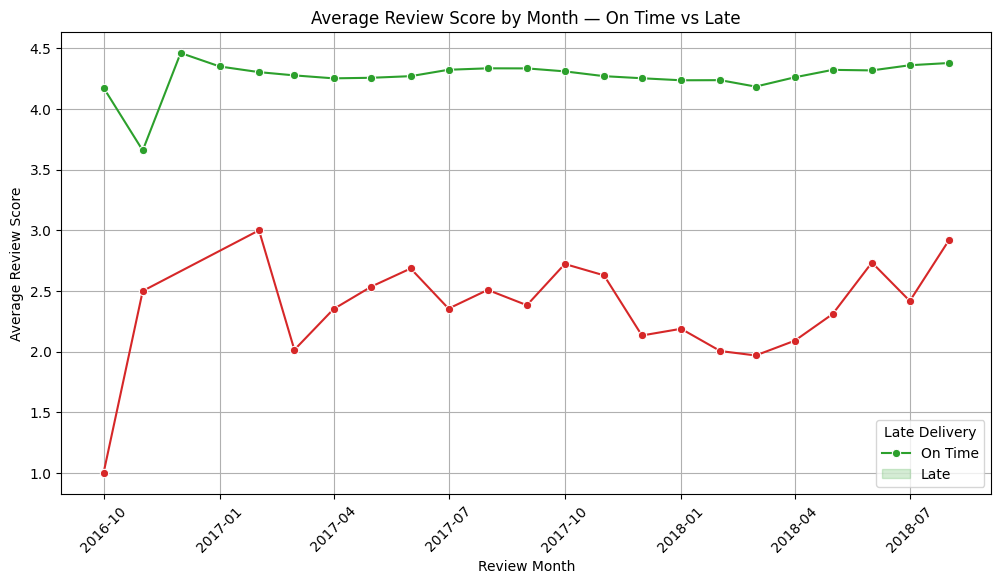

In [72]:
# Plot average review score by review_month and is_late
avg_by_month_lateness = (
    orders_reviews
    .groupby(['review_month', 'is_late'])['review_score']
    .mean()
    .reset_index()
)
avg_by_month_lateness['review_month_dt'] = pd.to_datetime(avg_by_month_lateness['review_month'] + '-01')

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=avg_by_month_lateness,
    x='review_month_dt',
    y='review_score',
    hue='is_late',
    marker='o',
    palette=['tab:green', 'tab:red']
)
plt.title('Average Review Score by Month — On Time vs Late')
plt.xlabel('Review Month')
plt.ylabel('Average Review Score')
plt.xticks(rotation=45)
plt.legend(title='Late Delivery', labels=['On Time', 'Late'])
plt.grid()
plt.show()

We see On Time average review score is above 4 and below 2.5 for Late. The effect is consistent to all Month

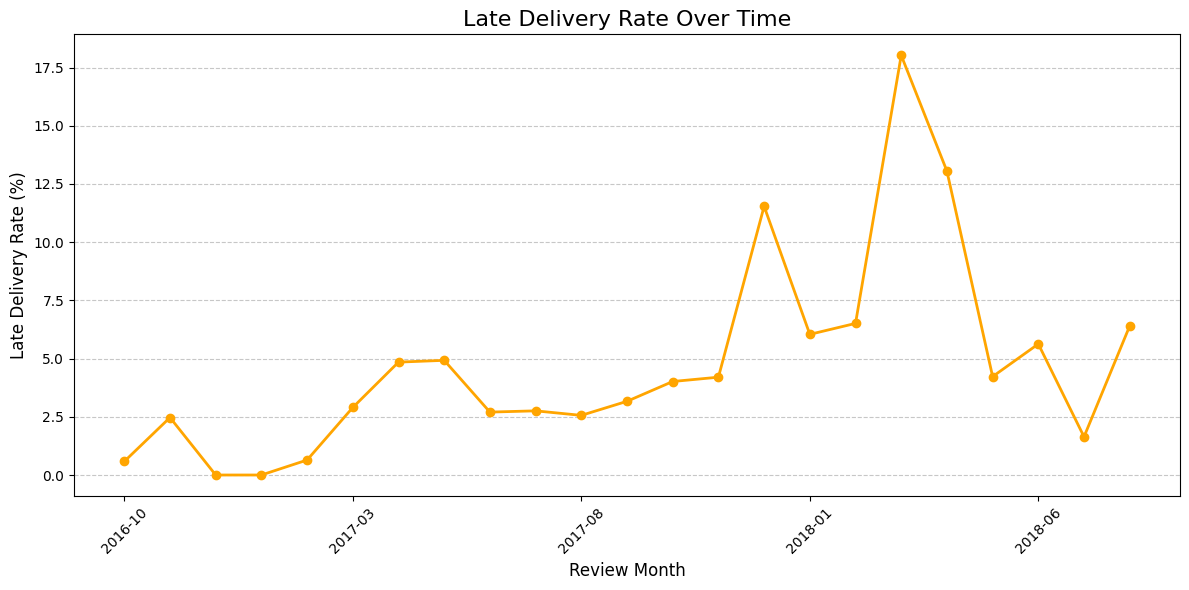

In [74]:
# Plot late delivery rate over time
plt.figure(figsize=(12, 6))
late_delivery.plot(kind='line', marker='o', color='orange', linewidth=2)
plt.title('Late Delivery Rate Over Time', fontsize=16)
plt.xlabel('Review Month', fontsize=12)
plt.ylabel('Late Delivery Rate (%)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Pearson correlation (late_rate vs avg review_score): -0.61


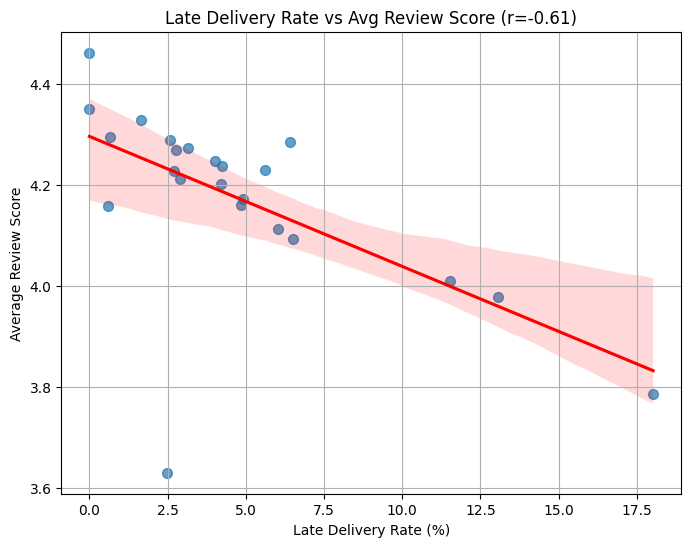

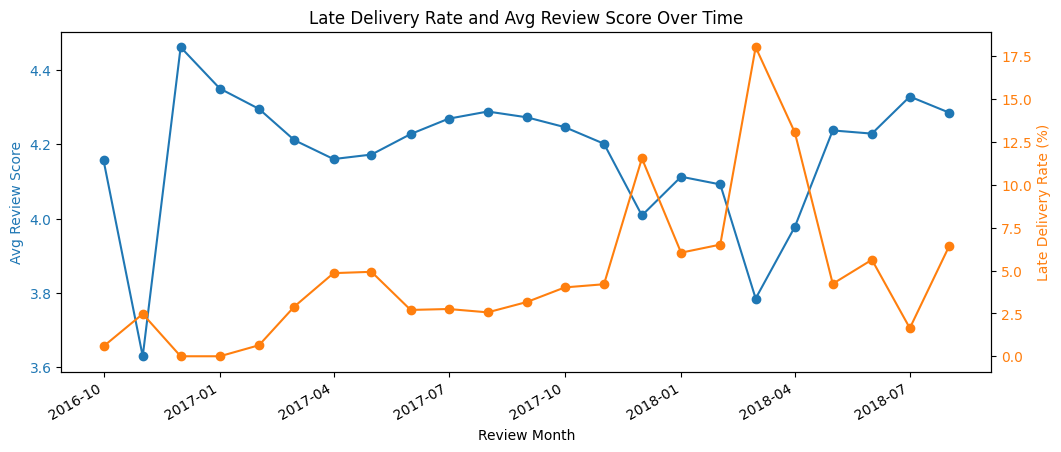

In [75]:
# Compare correlation between late delivery rate and customer satisfaction

# Prepare late delivery dataframe
late_df = late_delivery.reset_index()
late_df.columns = ['review_month', 'late_rate']

# Merge with average review score by month
merged = pd.merge(avg_review_score_by_month, late_df, on='review_month', how='inner')
merged['review_month_dt'] = pd.to_datetime(merged['review_month'] + '-01')
merged = merged.sort_values('review_month_dt')

# Compute Pearson correlation
corr = merged['late_rate'].corr(merged['review_score'])
print(f'Pearson correlation (late_rate vs avg review_score): {corr:.2f}')

# Scatter + regression to show correlation
plt.figure(figsize=(8, 6))
sns.regplot(data=merged, x='late_rate', y='review_score',
            scatter_kws={'s': 50, 'alpha': 0.7}, line_kws={'color': 'red'})
plt.title(f'Late Delivery Rate vs Avg Review Score (r={corr:.2f})')
plt.xlabel('Late Delivery Rate (%)')
plt.ylabel('Average Review Score')
plt.grid(True)
plt.show()

# Time series with dual y-axis for visual comparison over time
fig, ax1 = plt.subplots(figsize=(12, 5))
ax1.plot(merged['review_month_dt'], merged['review_score'], marker='o', color='tab:blue', label='Avg Review Score')
ax1.set_xlabel('Review Month')
ax1.set_ylabel('Avg Review Score', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(merged['review_month_dt'], merged['late_rate'], marker='o', color='tab:orange', label='Late Delivery Rate (%)')
ax2.set_ylabel('Late Delivery Rate (%)', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

fig.autofmt_xdate()
plt.title('Late Delivery Rate and Avg Review Score Over Time')
plt.show()

### Summary of Analysis

From the two plots below, we can observe the following:

1. **Average Review Score by Delivery Lateness**:
    - Orders delivered on time consistently receive higher review scores (above 4.0 on average).
    - Late deliveries, on the other hand, receive significantly lower review scores (around 2.3 on average).
    - This indicates a strong correlation between delivery performance and customer satisfaction.

2. **Late Delivery Rate and Average Review Score Over Time**:
    - There is a noticeable increase in the late delivery rate during Q1 2018, peaking at 18% in March 2018.
    - The average review score shows a corresponding decline during the same period, dropping from 4.1 in January 2018 to 3.8 in March 2018.
    - The Pearson correlation coefficient between late delivery rate and average review score is -0.61, indicating a strong negative relationship.

### Conclusion
The root cause hypothesis that delivery operational performance contributed to the decline in customer satisfaction during Q1 2018 is valid. The data shows a clear and consistent relationship between late deliveries and lower review scores, with the sharp increase in late deliveries during Q1 2018 aligning with the observed drop in customer satisfaction.

## EDA Summary

An exploratory data analysis (EDA) was conducted to understand patterns in customer review scores and identify potential factors contributing to the decline in customer satisfaction observed in Q1 2018.

Key findings from the EDA include:

- Customer review scores show a clear and consistent difference between on-time and late deliveries across all observed months.
- Orders delivered late consistently receive significantly lower review scores compared to on-time deliveries.
- While late deliveries are associated with lower review scores, this pattern is consistent over time and not unique to Q1 2018.
- The proportion of late deliveries increases during Q1 2018, which aligns with the observed decline in average customer review scores during the same period.

These findings suggest that delivery performance is the root cause associated with customer satisfaction decline in Q1 2018.